# Name : Priyanka G
# No : D21027
# Name : Sakshi Bhoir
# No : D21031

In [3]:
#import the library 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix

In [2]:
#FUNCTION DEFINTION 
def Graph(data, columns=None,directory = "current"): 
    
    #import necessary libaries
    import matplotlib.pyplot as plt
    import os
    
    #initialise an empty list to seggregate columns
    col_list = []
    
    #seggregating categorical columns
    categorical = list(data.select_dtypes(include = ['object']))
    
    #seggregating numerical columns
    numerical = list(data.select_dtypes(include = ['number']))    
    
    #condition to check for default or new path
    if directory == "current":
        
        directory = os.getcwd()
   
    #condition to check if none of the columns are specified
    if columns == None:
        
        col_list = list(data[data.columns[0:]])
        
    else:
        
        col_list = columns
        
    #for every column in the column_list    
    for i in col_list:
        
        #check if it is categorical
        if i in categorical:
            
            #storing the length of the data column
            length = len(set(data[i]))
            
            #if length of categories is less than 10,plot a vertical bar plot
            if length <= 10:
                # constrained-layout to fit plots within your figure cleanly.
                fig = plt.figure(facecolor = "#DCDCDC", edgecolor = 'black', constrained_layout = True)
                
                #vertical bar plot
                data[i].value_counts().plot(kind='bar',figsize=(7,7),color="#20B2AA",fontsize=13)
                plt.title("Bar-Graph", fontsize = 18)
                plt.xlabel(i, fontsize = 15)
                plt.ylabel("Frequency", fontsize = 15)
                
                #save the figure 
                plt.savefig(fname = directory + '\\' + '{}.jpg'.format(i),
                           edgecolor = 'black', dpi = 500, bbox_inches = 'tight', pad_inches = 2)
                plt.show()
            
            #else plot a horizontal plot
            else:   
                
                #horizontal barplot
                data[i].value_counts().plot(kind='barh',figsize=(15,length * 0.35),
                                            color="coral",fontsize=13)
                plt.title("Bar-Graph")
                plt.xlabel("Frequency")
                plt.ylabel(i)
                
                #save the figure 
                plt.savefig(fname = directory + '\\' + '{}.jpg'.format(i),
                            edgecolor = 'black', dpi = 500, bbox_inches = 'tight', pad_inches = 2) 
                plt.show()
                
           
                  
        #check if numerical
        elif i in numerical: 
            
            #the customisation for the figure holding both the plots
            fig  = plt.figure(figsize=(10,15), facecolor = '#FFF0F5' , edgecolor = "black", 
                           constrained_layout = True, dpi = 500)
            
            #subplot  for  boxplot and histogram 2-rows,1-column,1-plot number
            plt.subplot(2,1,1)
            
            #plot the boxplot 
            data.boxplot(i, vert = False, grid = False, patch_artist = True ,showmeans = True                        
                         ,medianprops = dict(color='black')
                         ,boxprops=dict(facecolor='#DAF7A6', color='black')
                         ,whiskerprops = dict(color = 'black')
                         ,capprops = dict(color = 'black')
                         ,flierprops = dict(color ='#C70039'))
            
            plt.xlabel(i,fontsize=15)     
            plt.title("Boxplot of " + i ,fontsize=18)
            
            #subplot  for  histogram 2-rows,1-column,2-plot number
            #plt.subplot(2,1,2)
            
            #plot the histogram
            #plt.hist(data[[i]],color="#191970",edgecolor="white")
            #plt.xlabel(i,fontsize=15)     
            #plt.title("Histogram of " + i ,fontsize=18)
            
            #data.plot.scatter(x=data[[i]],y=data[2])
            
            
            #save the figure
            plt.savefig(fname = directory + '\\' + '{}.jpg'.format(i),
                         edgecolor = 'black', dpi = 500, bbox_inches = 'tight', pad_inches = 2)
            plt.show()
            
            
        #loop again if it doesnt match any of the condition
        else:
            continue
            
            


In [4]:
#reading the data fromthe file
#path = os.chdir(r'C:/Users/Priyanka G/Downloads/')
houses = pd.read_csv("kc_house_train_data.csv")
houses.sample(10)


id             date     price  bedrooms  bathrooms  sqft_living  \
397   1865820370  20141113T000000  166600.0         3       1.75         1150   
895   3905010140  20140529T000000  690000.0         4       2.50         2920   
7315  4017050020  20140814T000000  450000.0         3       2.50         2450   
7751  6404600006  20140820T000000  173250.0         3       2.00         1210   
3872   705700580  20150501T000000  366000.0         4       2.75         2170   
5419  5151800045  20140822T000000  810000.0         5       2.75         3847   
1697  7334401450  20140729T000000  308550.0         3       2.00         1600   
8250  3959400645  20150107T000000  605000.0         5       3.00         3670   
858   6117501176  20150102T000000  500000.0         4       2.50         2230   
5620  6131600240  20141119T000000  190000.0         3       1.00         1200   

      sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
397       8690     1.0           0     0  ...      7        1150   
895       9904     2.0           0     0  ...      9        2920   
7315     19744     2.0           0     0  ...     10        2450   
7751      9097     1.0           0     0  ...      7        1210   
3872      9743     2.0           0     0  ...      7        2170   
5419     17654     1.0           0     2  ...      9        2299   
1697     13200     1.0           0     0  ...      7        1600   
8250      9600     1.0           0     1  ...      8        1980   
858      26989     1.0           0     1  ...      8        1400   
5620      8316     1.0           0     0  ...      6        1200   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
397               0      1977             0    98042  47.3729 -122.115   
895               0      1990             0    98029  47.5759 -121.995   
7315              0      1990             0    98038  47.3746 -122.026   
7751              0      1954             0    98168  47.4849 -122.303   
3872              0      1995             0    98038  47.3814 -122.024   
5419           1548      1975             0    98003  47.3379 -122.322   
1697              0      1990             0    98045  47.4656 -121.756   
8250           1690      1955             0    98108  47.5648 -122.316   
858             830      1962             0    98166  47.4285 -122.345   
5620              0      1953             0    98002  47.3231 -122.215   

      sqft_living15  sqft_lot15  
397            1330        7040  
895            1810        5617  
7315           2650       19597  
7751           1360       10125  
3872           1670        7734  
5419           2690       15344  
1697           1360       11520  
8250           1730        4933  
858            2570       17702  
5620           1250        8316  

[10 rows x 21 columns]

In [4]:
houses.describe()       #to get summary of the various numerical counts

id         price     bedrooms    bathrooms   sqft_living  \
count  9.761000e+03  9.761000e+03  9761.000000  9761.000000   9761.000000   
mean   4.605288e+09  5.427350e+05     3.375884     2.117175   2086.734146   
std    2.876044e+09  3.795276e+05     0.960697     0.773971    927.194303   
min    1.200019e+06  8.000000e+04     0.000000     0.000000    290.000000   
25%    2.126049e+09  3.200000e+05     3.000000     1.750000   1420.000000   
50%    3.905041e+09  4.500000e+05     3.000000     2.250000   1910.000000   
75%    7.338403e+09  6.490000e+05     4.000000     2.500000   2570.000000   
max    9.900000e+09  7.700000e+06    33.000000     8.000000  12050.000000   

           sqft_lot       floors   waterfront         view    condition  \
count  9.761000e+03  9761.000000  9761.000000  9761.000000  9761.000000   
mean   1.521526e+04     1.486067     0.008401     0.248028     3.415531   
std    4.126673e+04     0.532317     0.091275     0.787877     0.650552   
min    5.200000e+02     1.000000     0.000000     0.000000     1.000000   
25%    5.100000e+03     1.000000     0.000000     0.000000     3.000000   
50%    7.642000e+03     1.500000     0.000000     0.000000     3.000000   
75%    1.066000e+04     2.000000     0.000000     0.000000     4.000000   
max    1.651359e+06     3.500000     1.000000     4.000000     5.000000   

            grade   sqft_above  sqft_basement     yr_built  yr_renovated  \
count  9761.00000  9761.000000    9761.000000  9761.000000   9761.000000   
mean      7.66151  1793.291159     293.442987  1970.799508     86.066592   
std       1.18268   835.763817     442.612722    29.240009    405.417369   
min       1.00000   290.000000       0.000000  1900.000000      0.000000   
25%       7.00000  1190.000000       0.000000  1951.000000      0.000000   
50%       7.00000  1570.000000       0.000000  1975.000000      0.000000   
75%       8.00000  2230.000000     570.000000  1996.000000      0.000000   
max      13.00000  8860.000000    3480.000000  2015.000000   2015.000000   

            zipcode          lat         long  sqft_living15     sqft_lot15  
count   9761.000000  9761.000000  9761.000000    9761.000000    9761.000000  
mean   98077.790185    47.560052  -122.214322    1992.359697   12824.785165  
std       53.203594     0.140236     0.139895     687.322247   26518.337402  
min    98001.000000    47.155900  -122.514000     620.000000     660.000000  
25%    98033.000000    47.467800  -122.327000    1490.000000    5160.000000  
50%    98065.000000    47.572200  -122.229000    1840.000000    7660.000000  
75%    98117.000000    47.680400  -122.126000    2370.000000   10113.000000  
max    98199.000000    47.777600  -121.319000    5790.000000  560617.000000

In [5]:
houses.info()        #gives the info regardding datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9761 non-null   int64  
 1   date           9761 non-null   object 
 2   price          9761 non-null   float64
 3   bedrooms       9761 non-null   int64  
 4   bathrooms      9761 non-null   float64
 5   sqft_living    9761 non-null   int64  
 6   sqft_lot       9761 non-null   int64  
 7   floors         9761 non-null   float64
 8   waterfront     9761 non-null   int64  
 9   view           9761 non-null   int64  
 10  condition      9761 non-null   int64  
 11  grade          9761 non-null   int64  
 12  sqft_above     9761 non-null   int64  
 13  sqft_basement  9761 non-null   int64  
 14  yr_built       9761 non-null   int64  
 15  yr_renovated   9761 non-null   int64  
 16  zipcode        9761 non-null   int64  
 17  lat            9761 non-null   float64
 18  long    

### Observations

It has 9761 rows/data points with 21columns/features


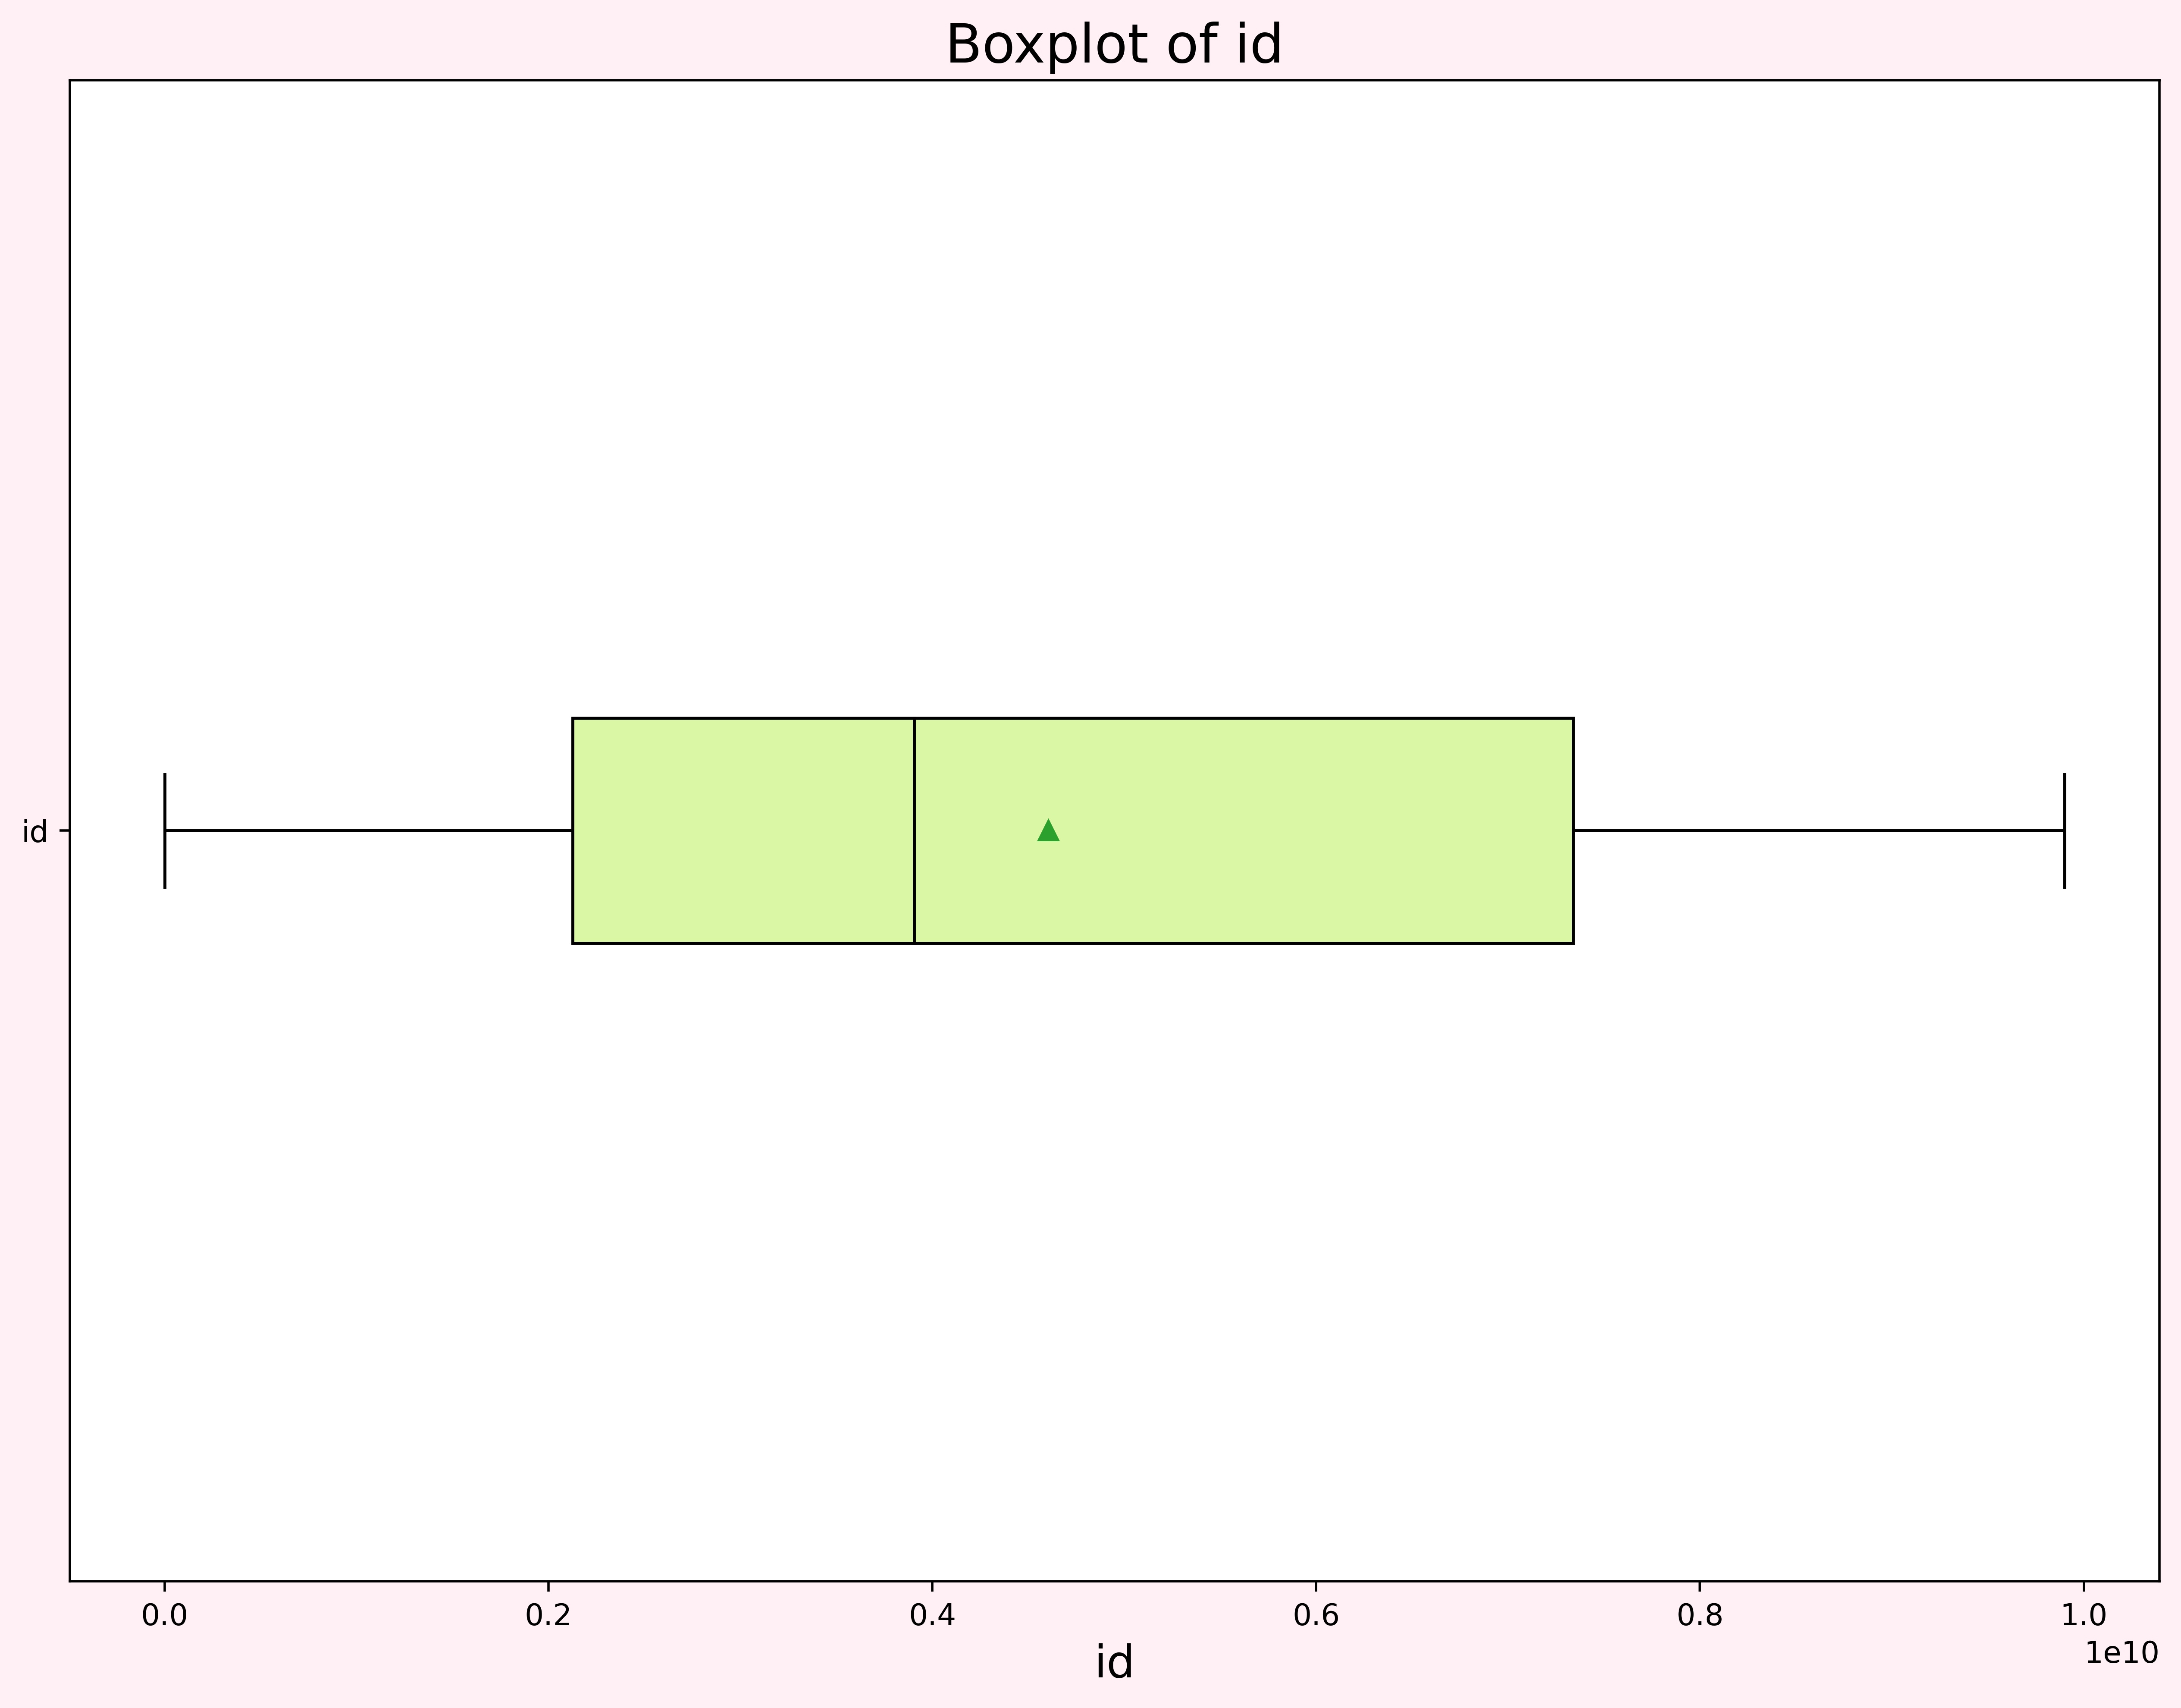

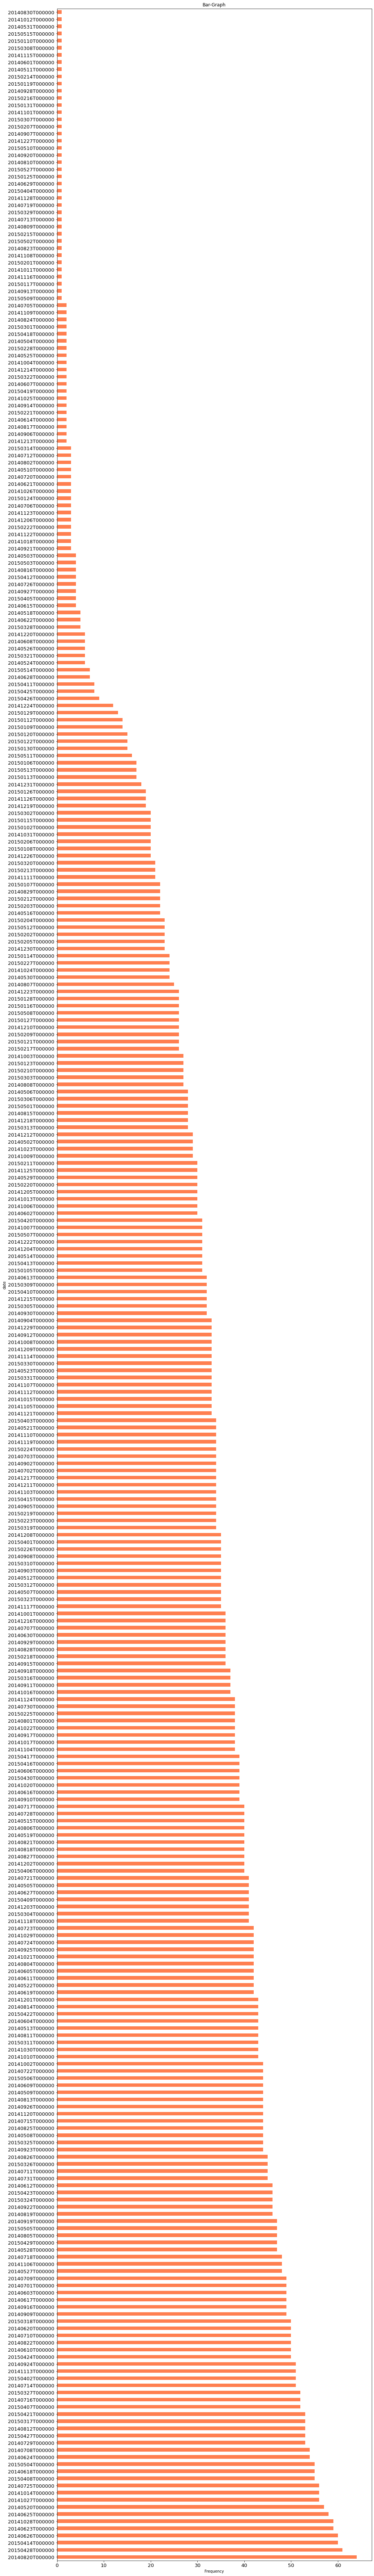

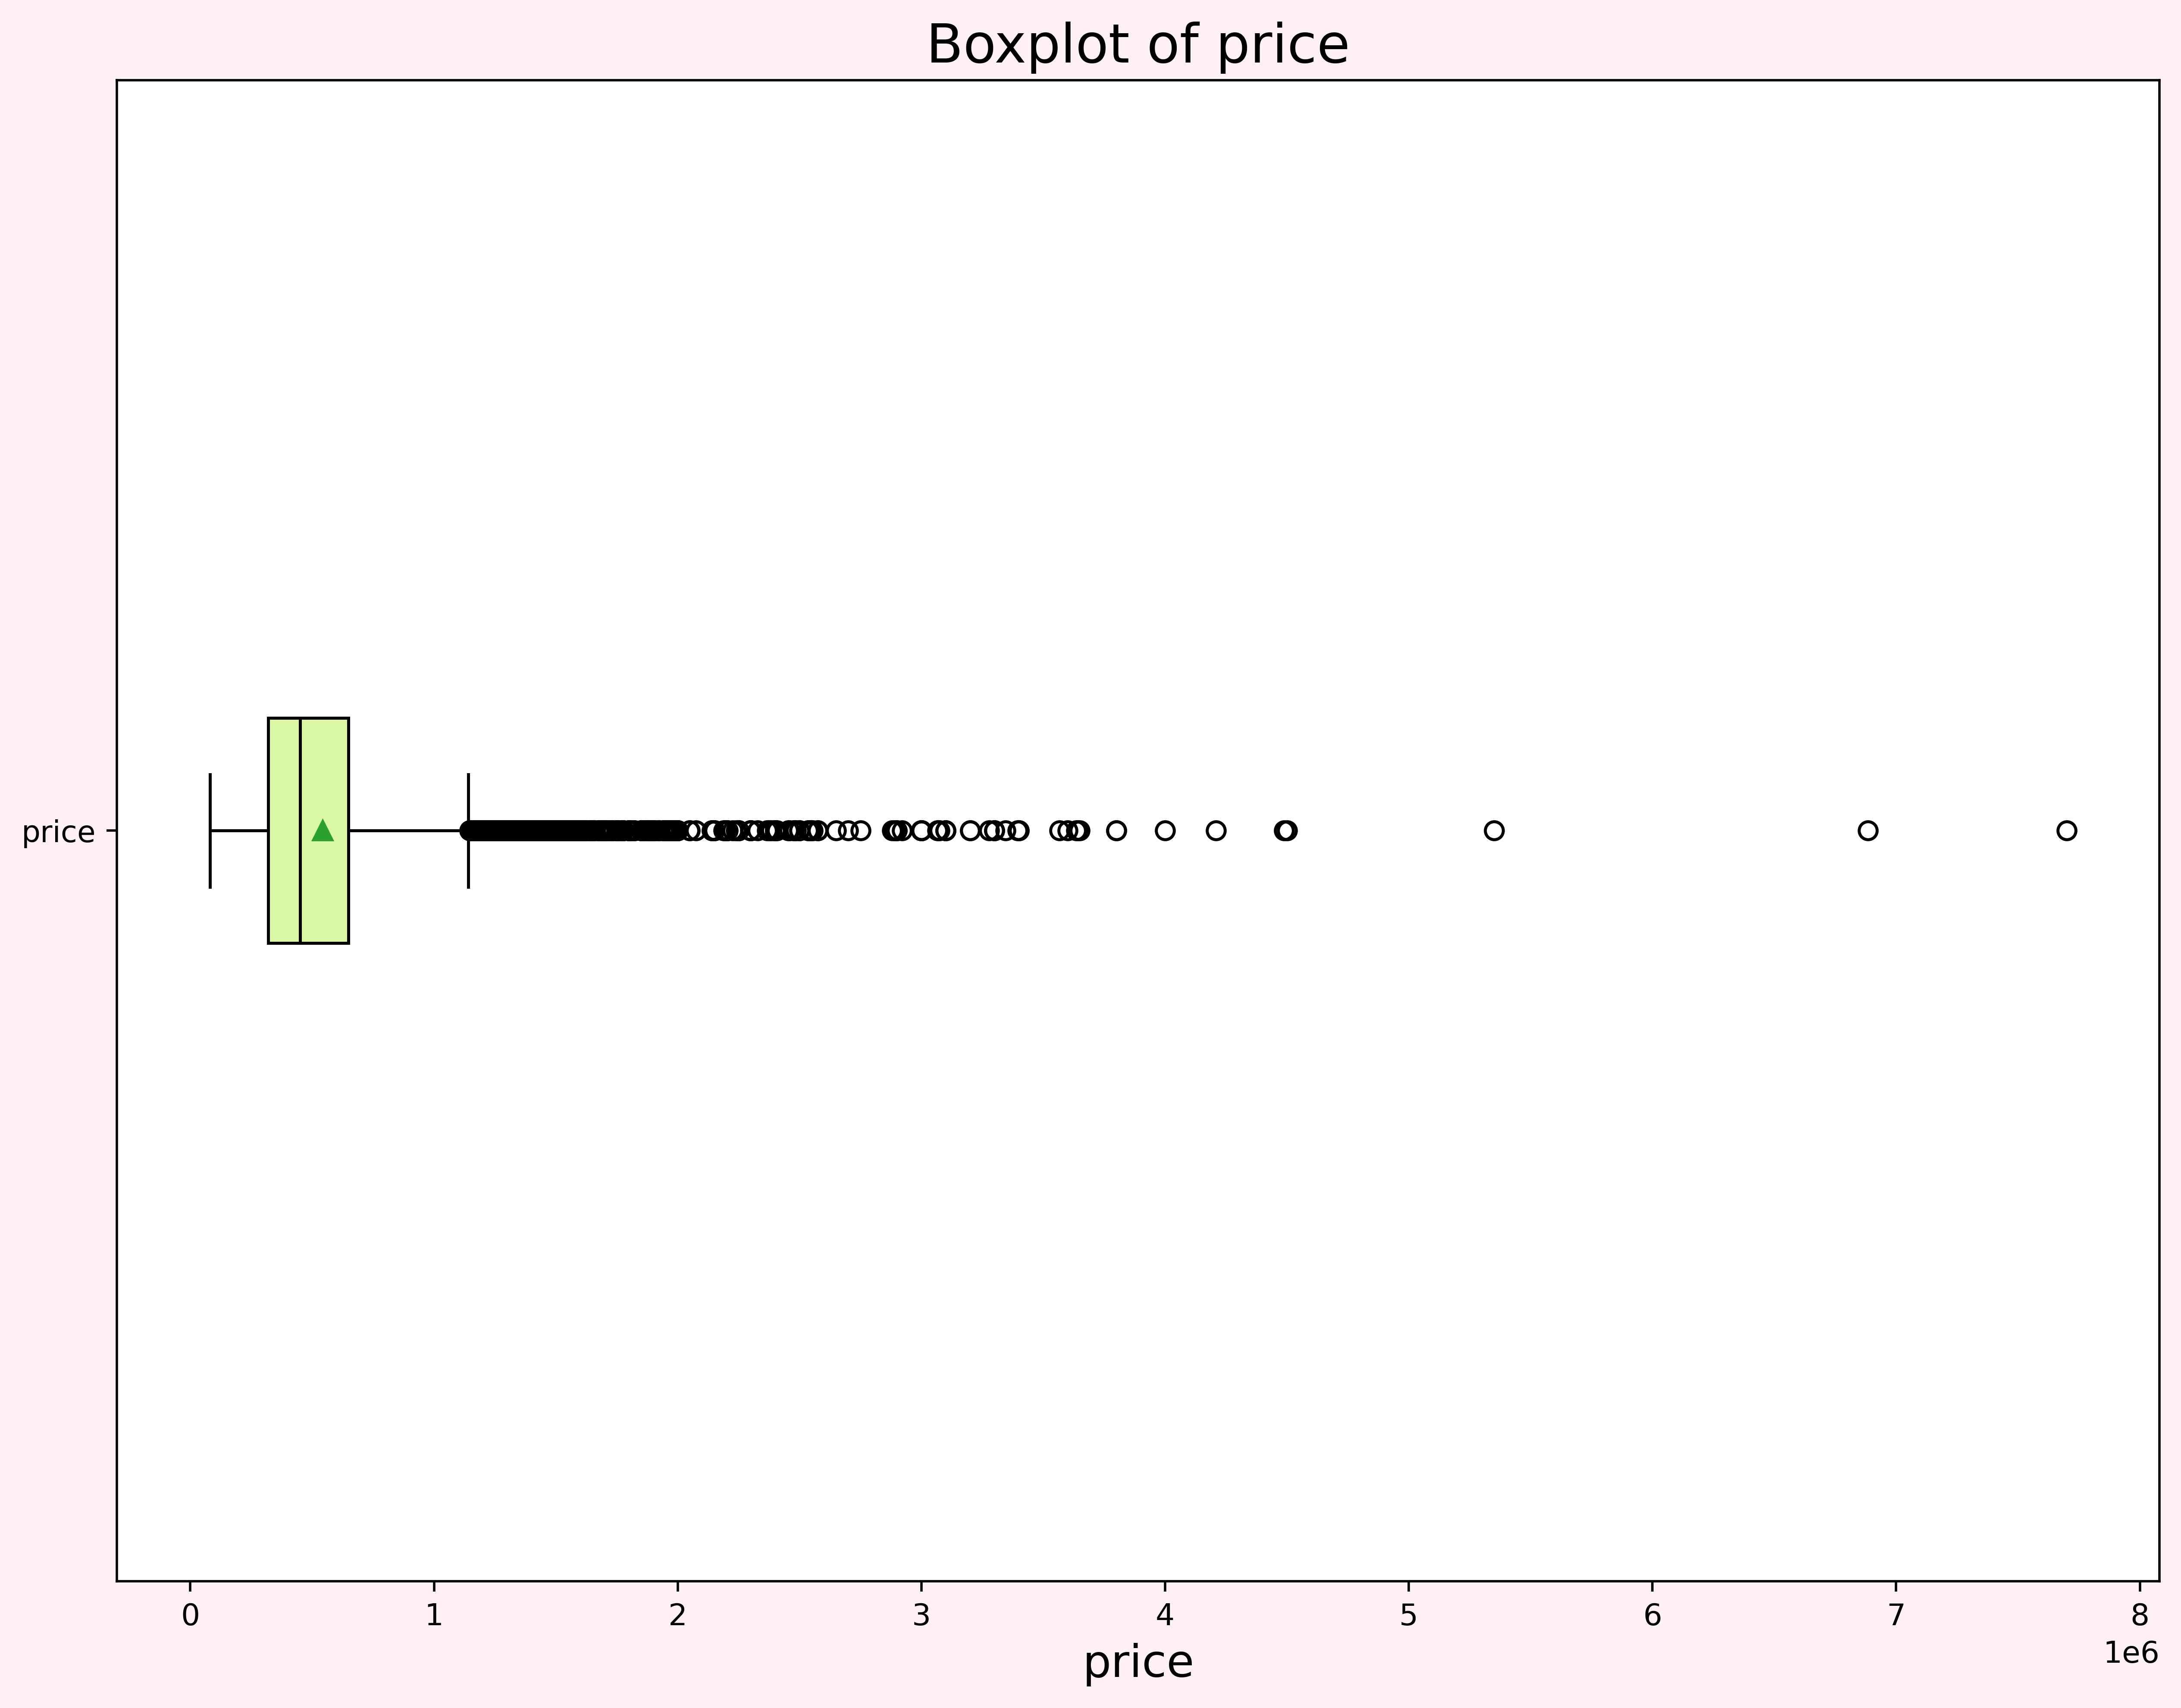

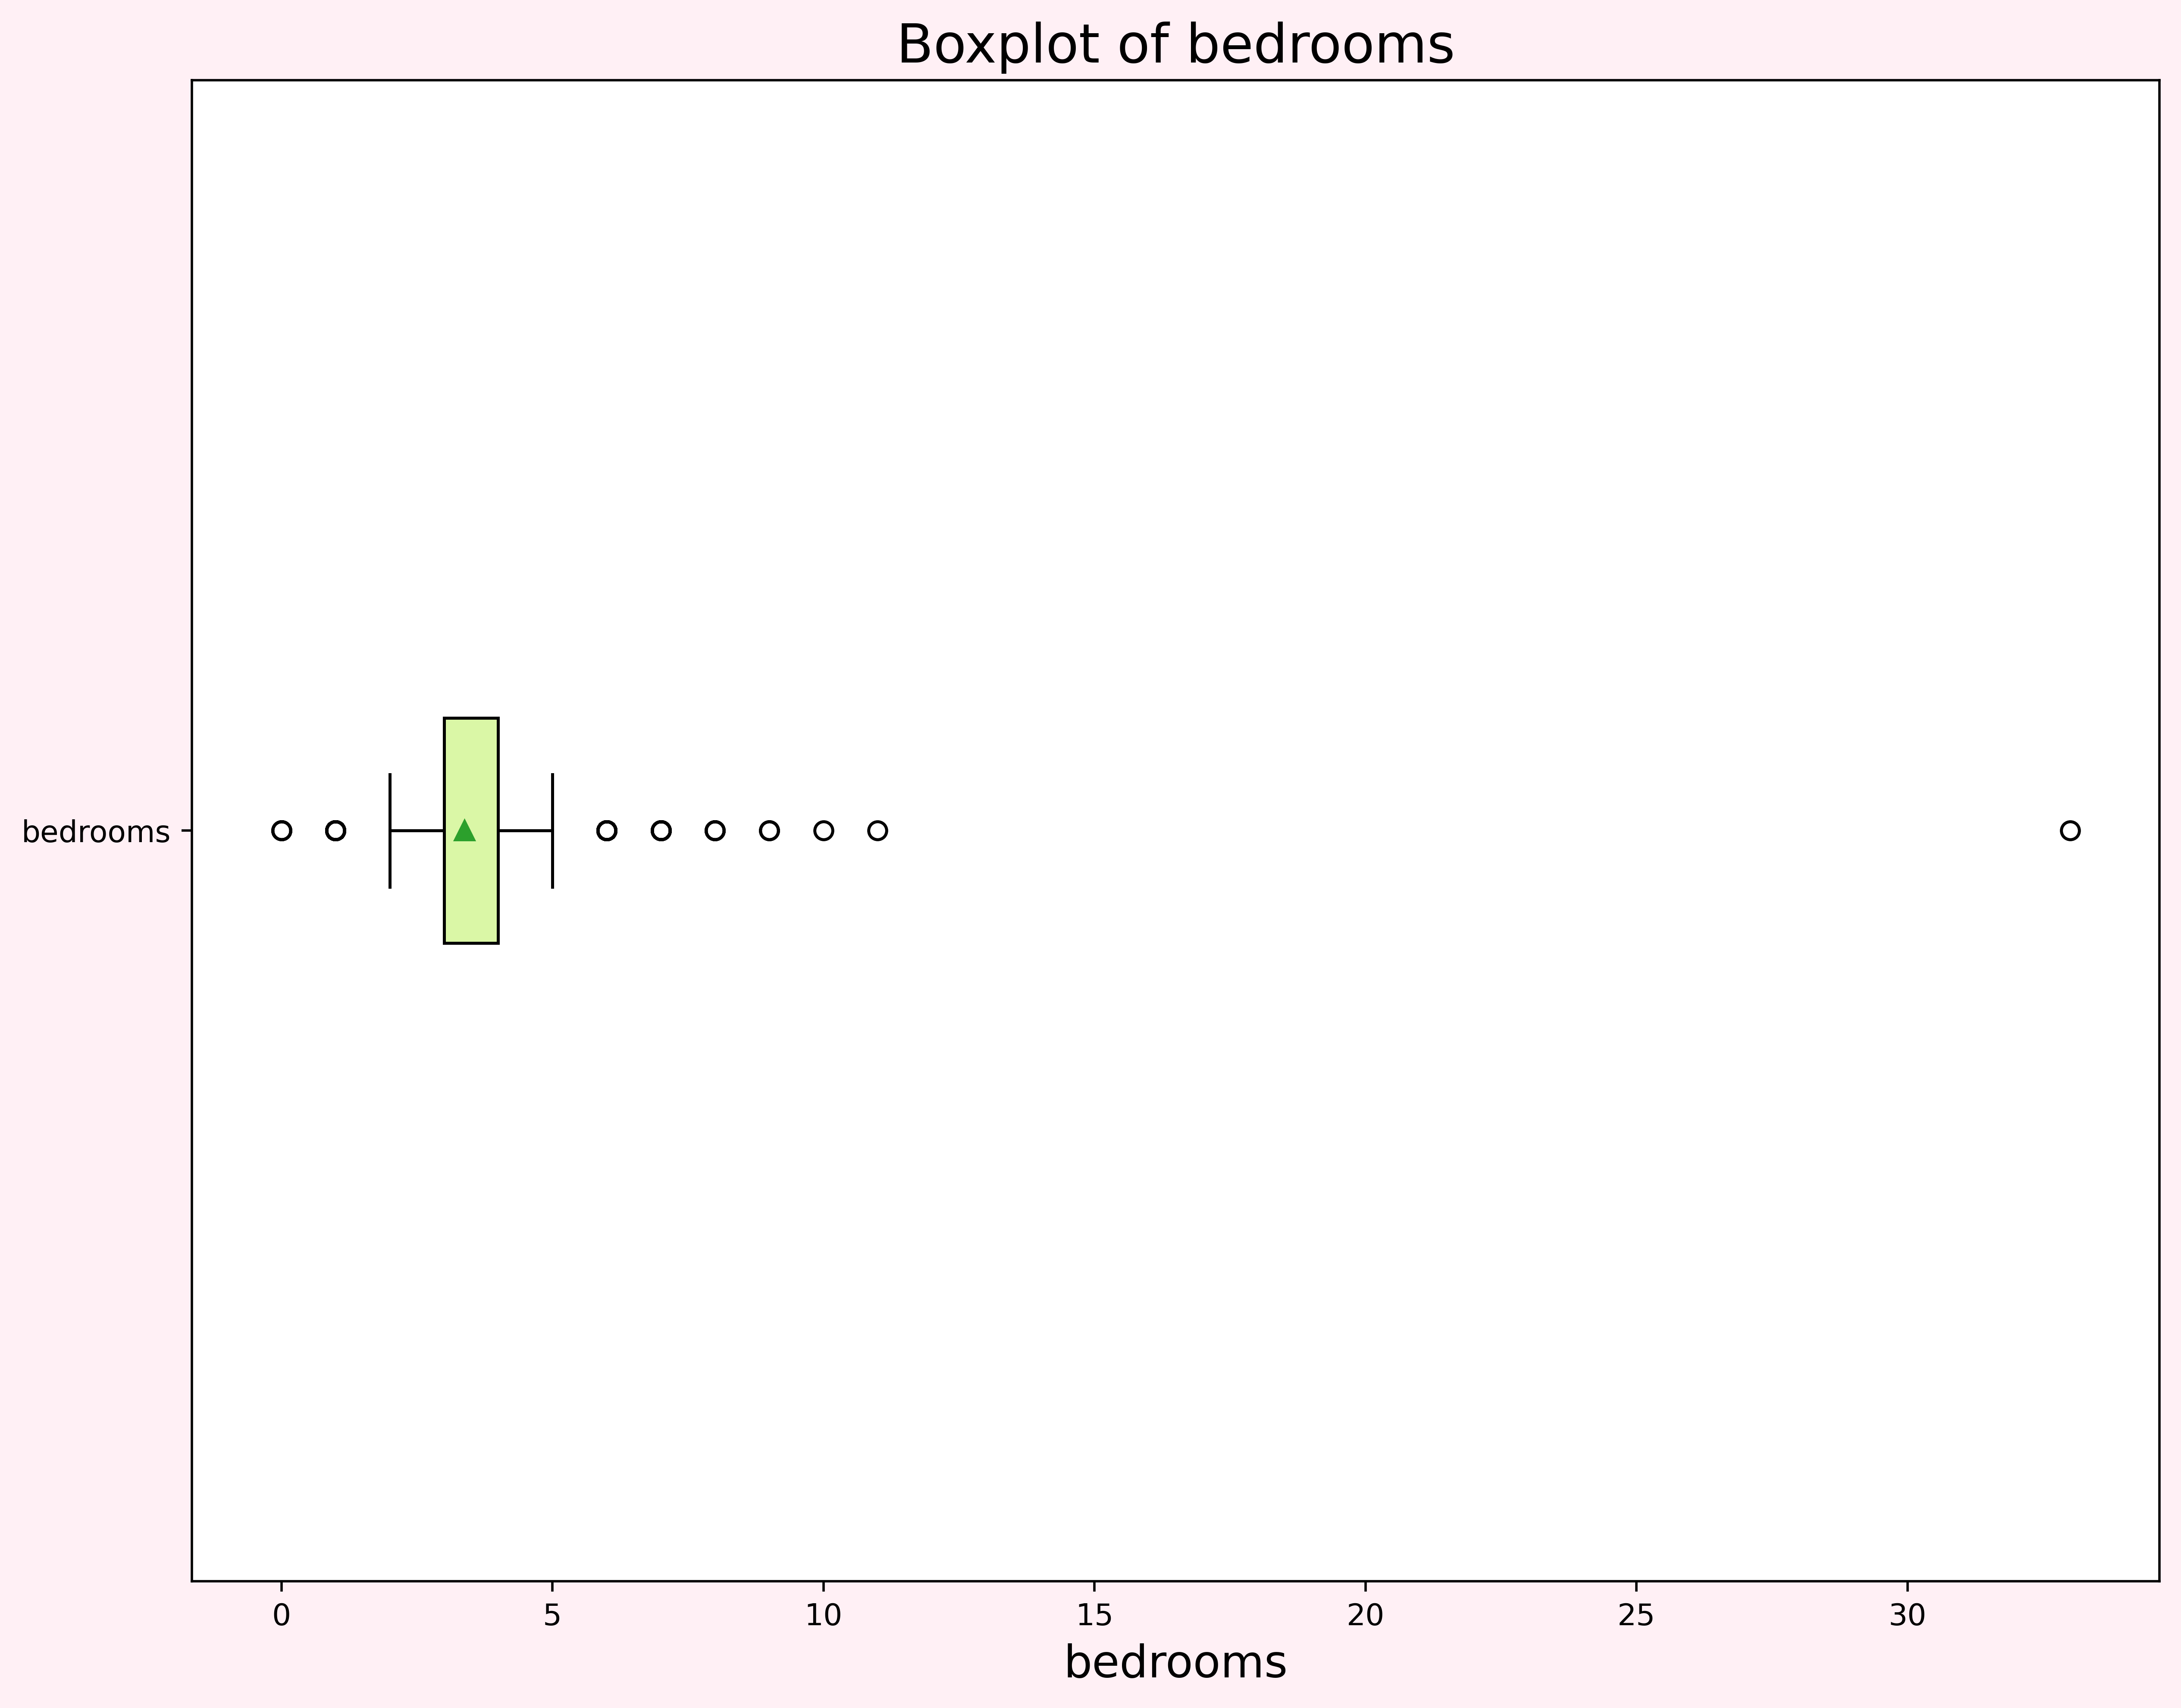

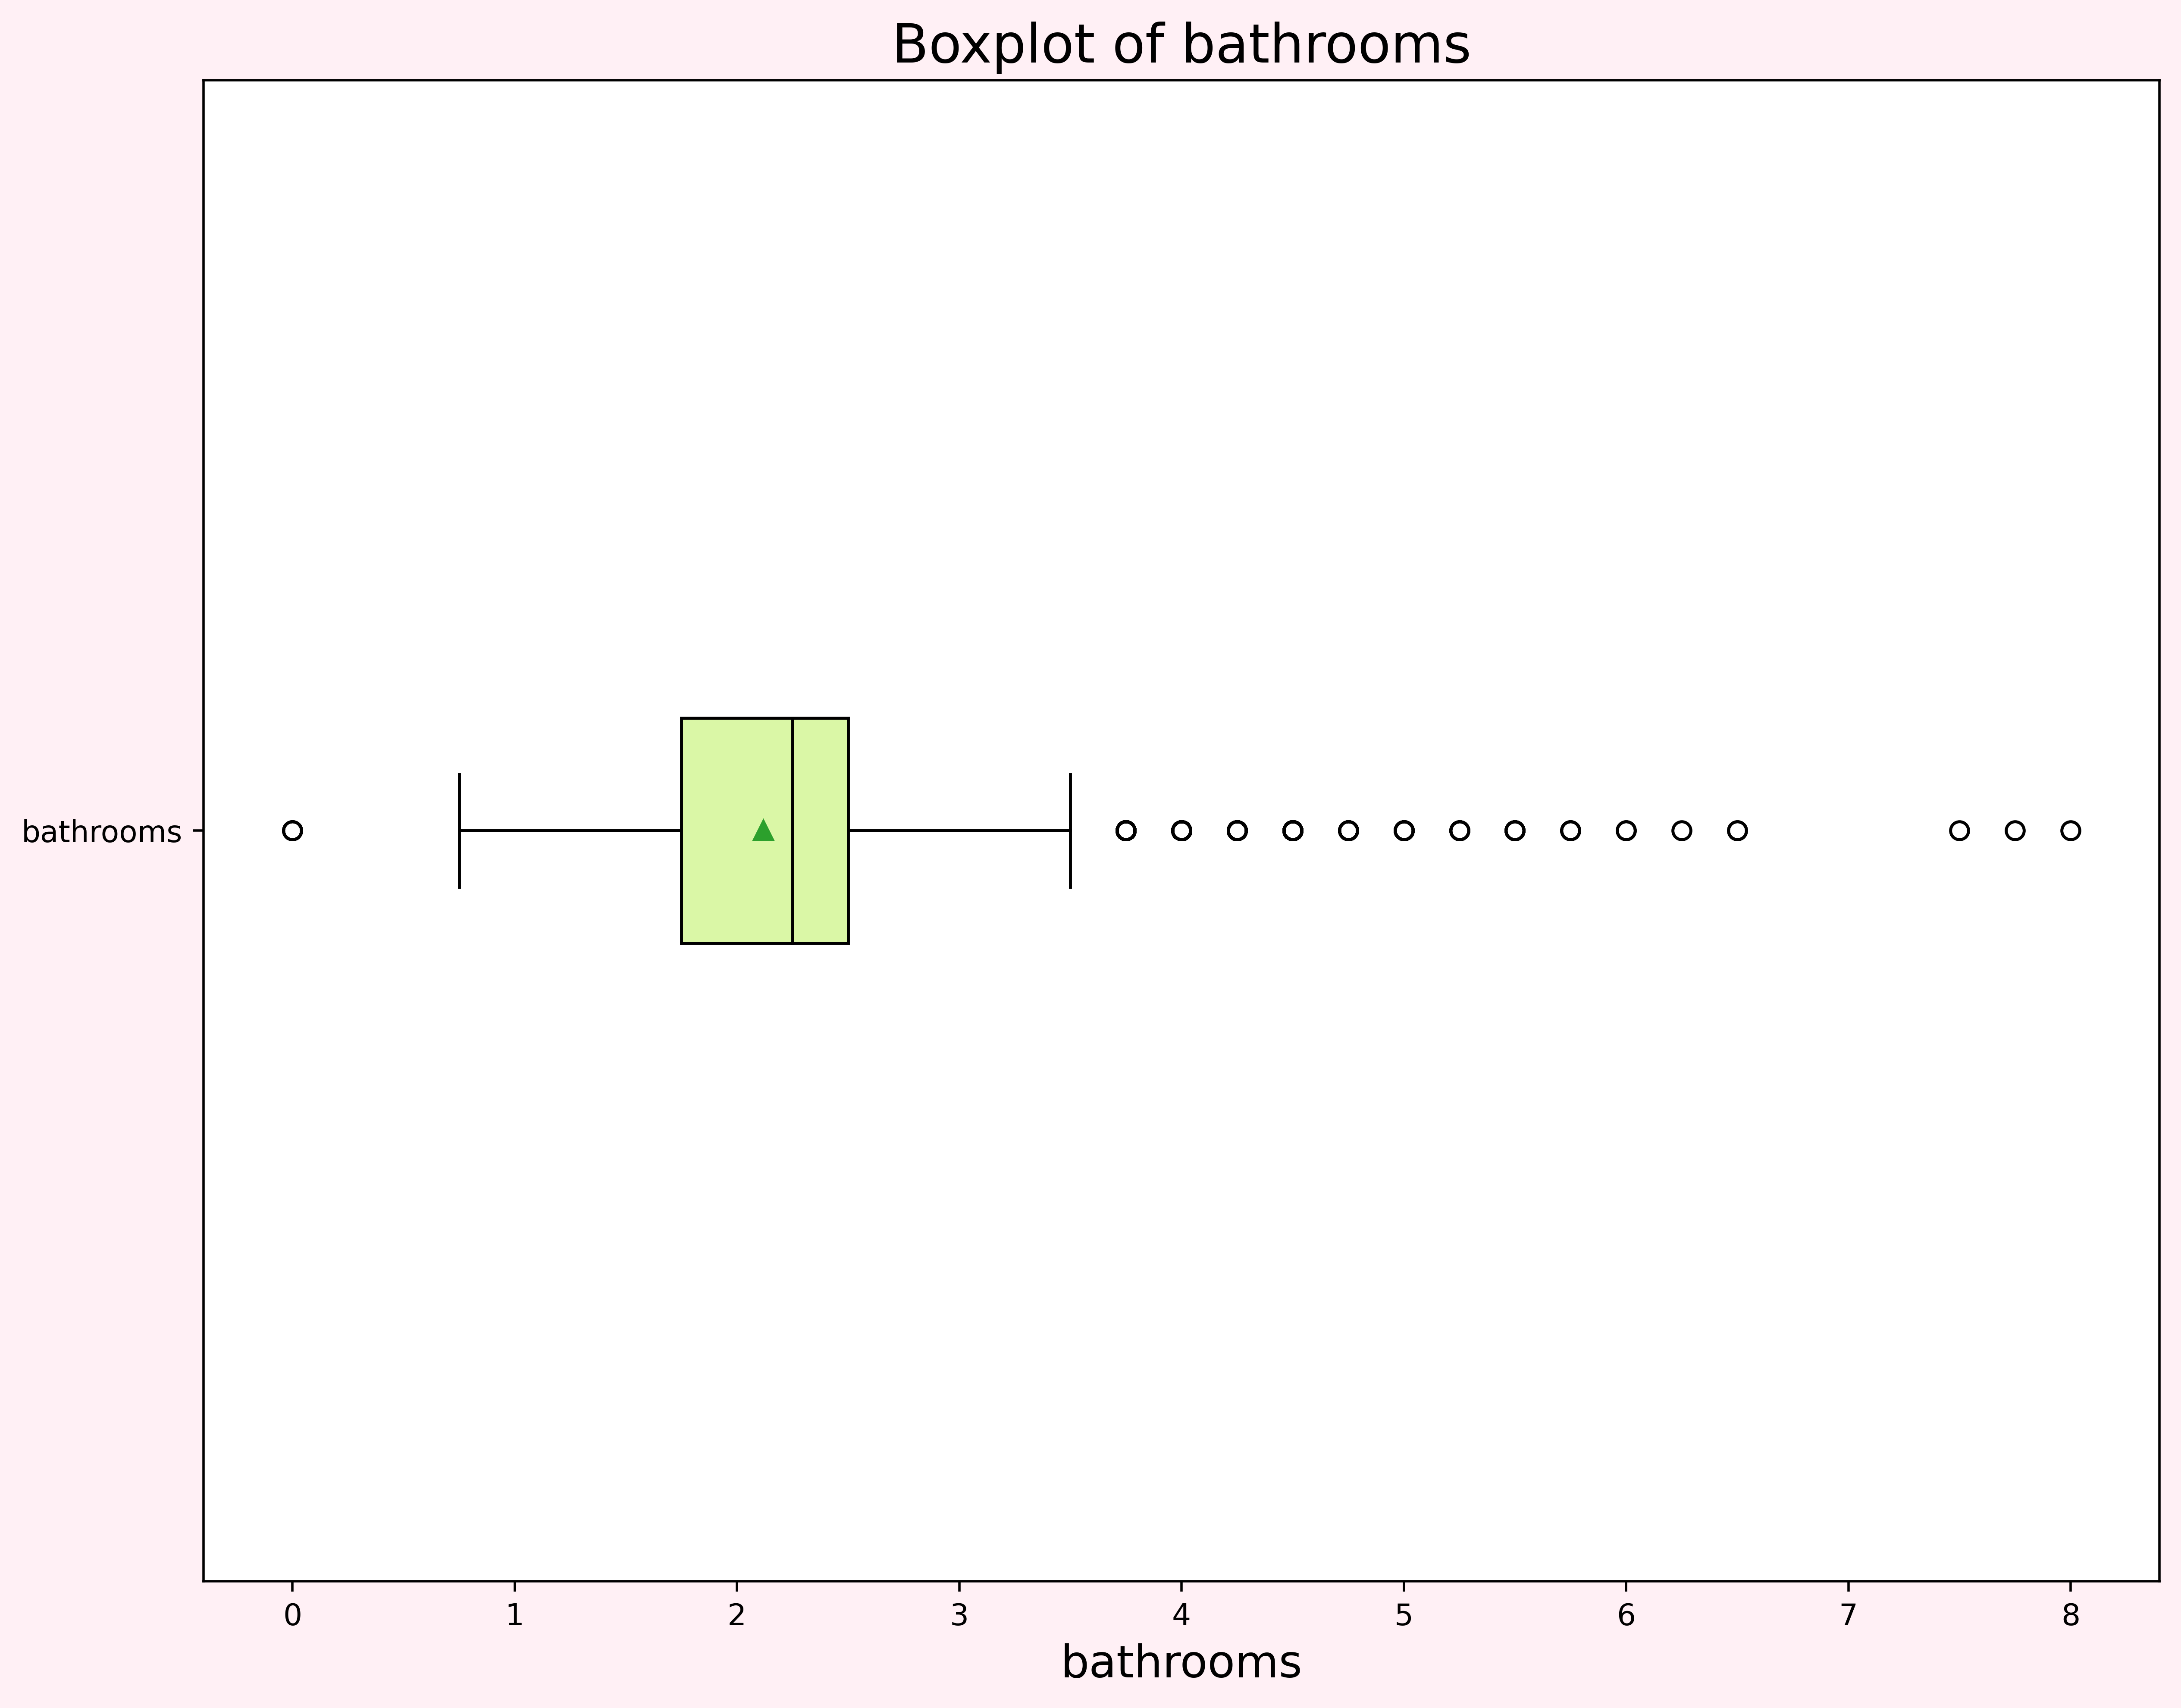

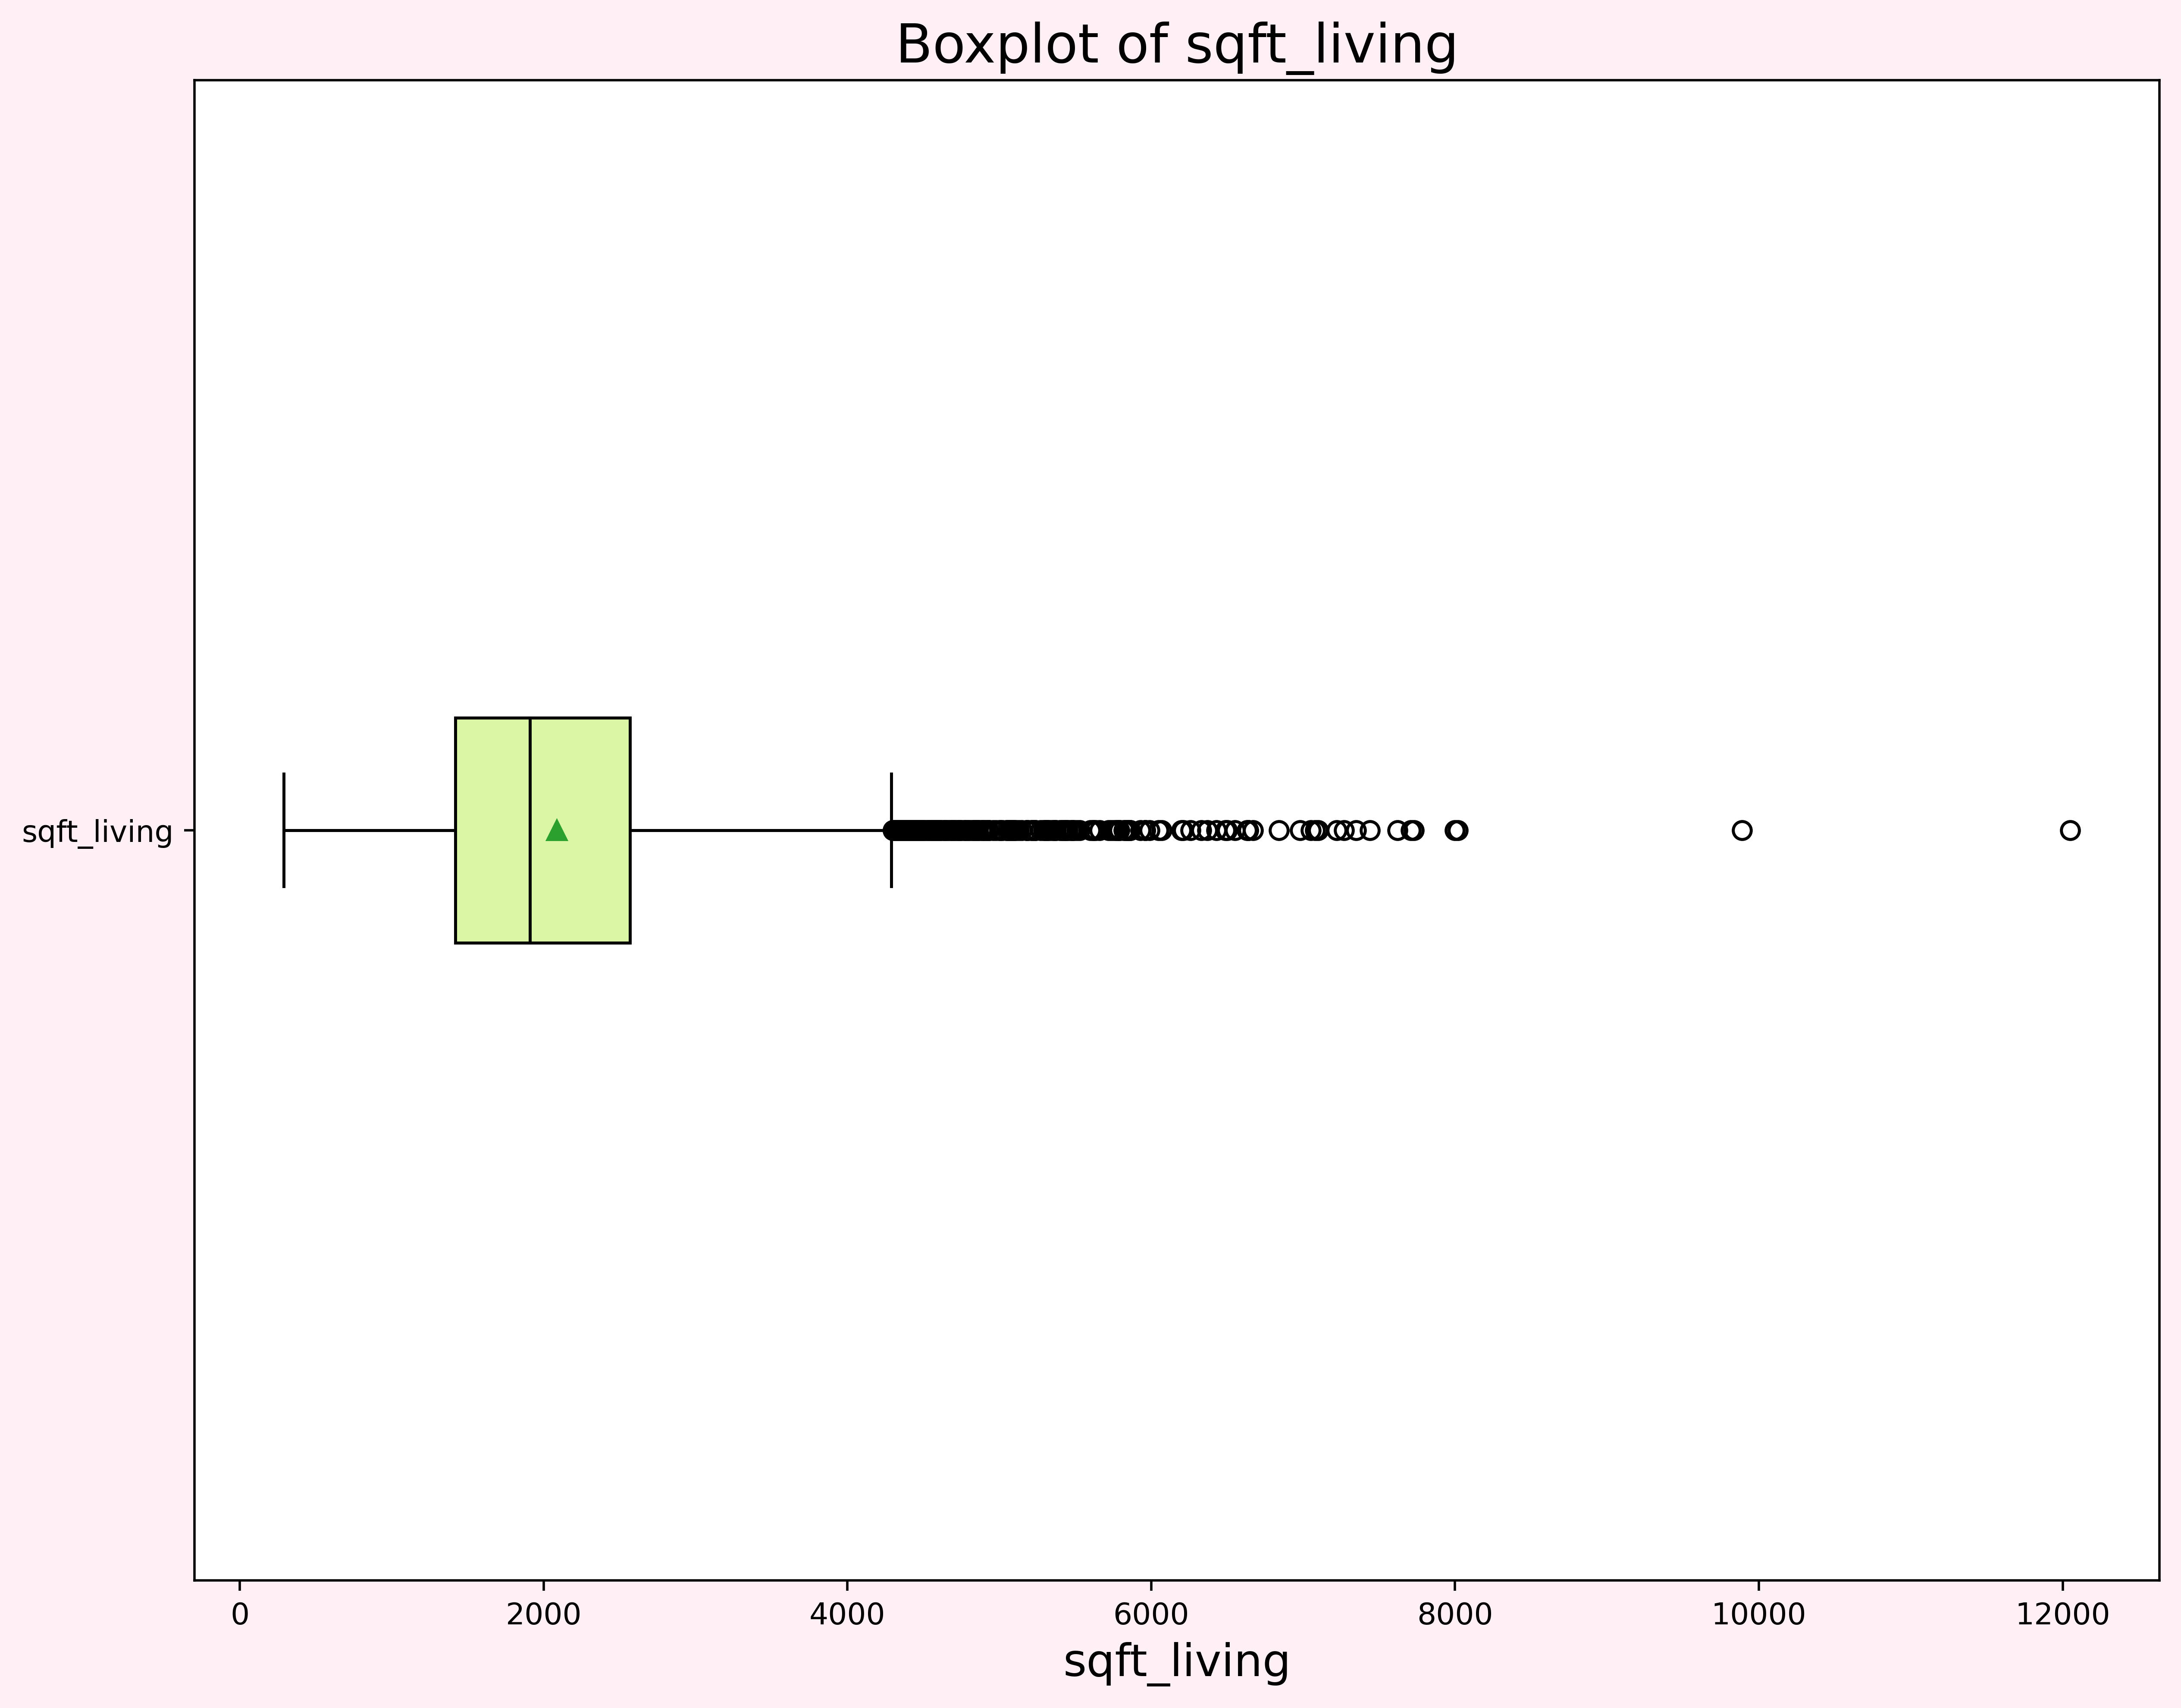

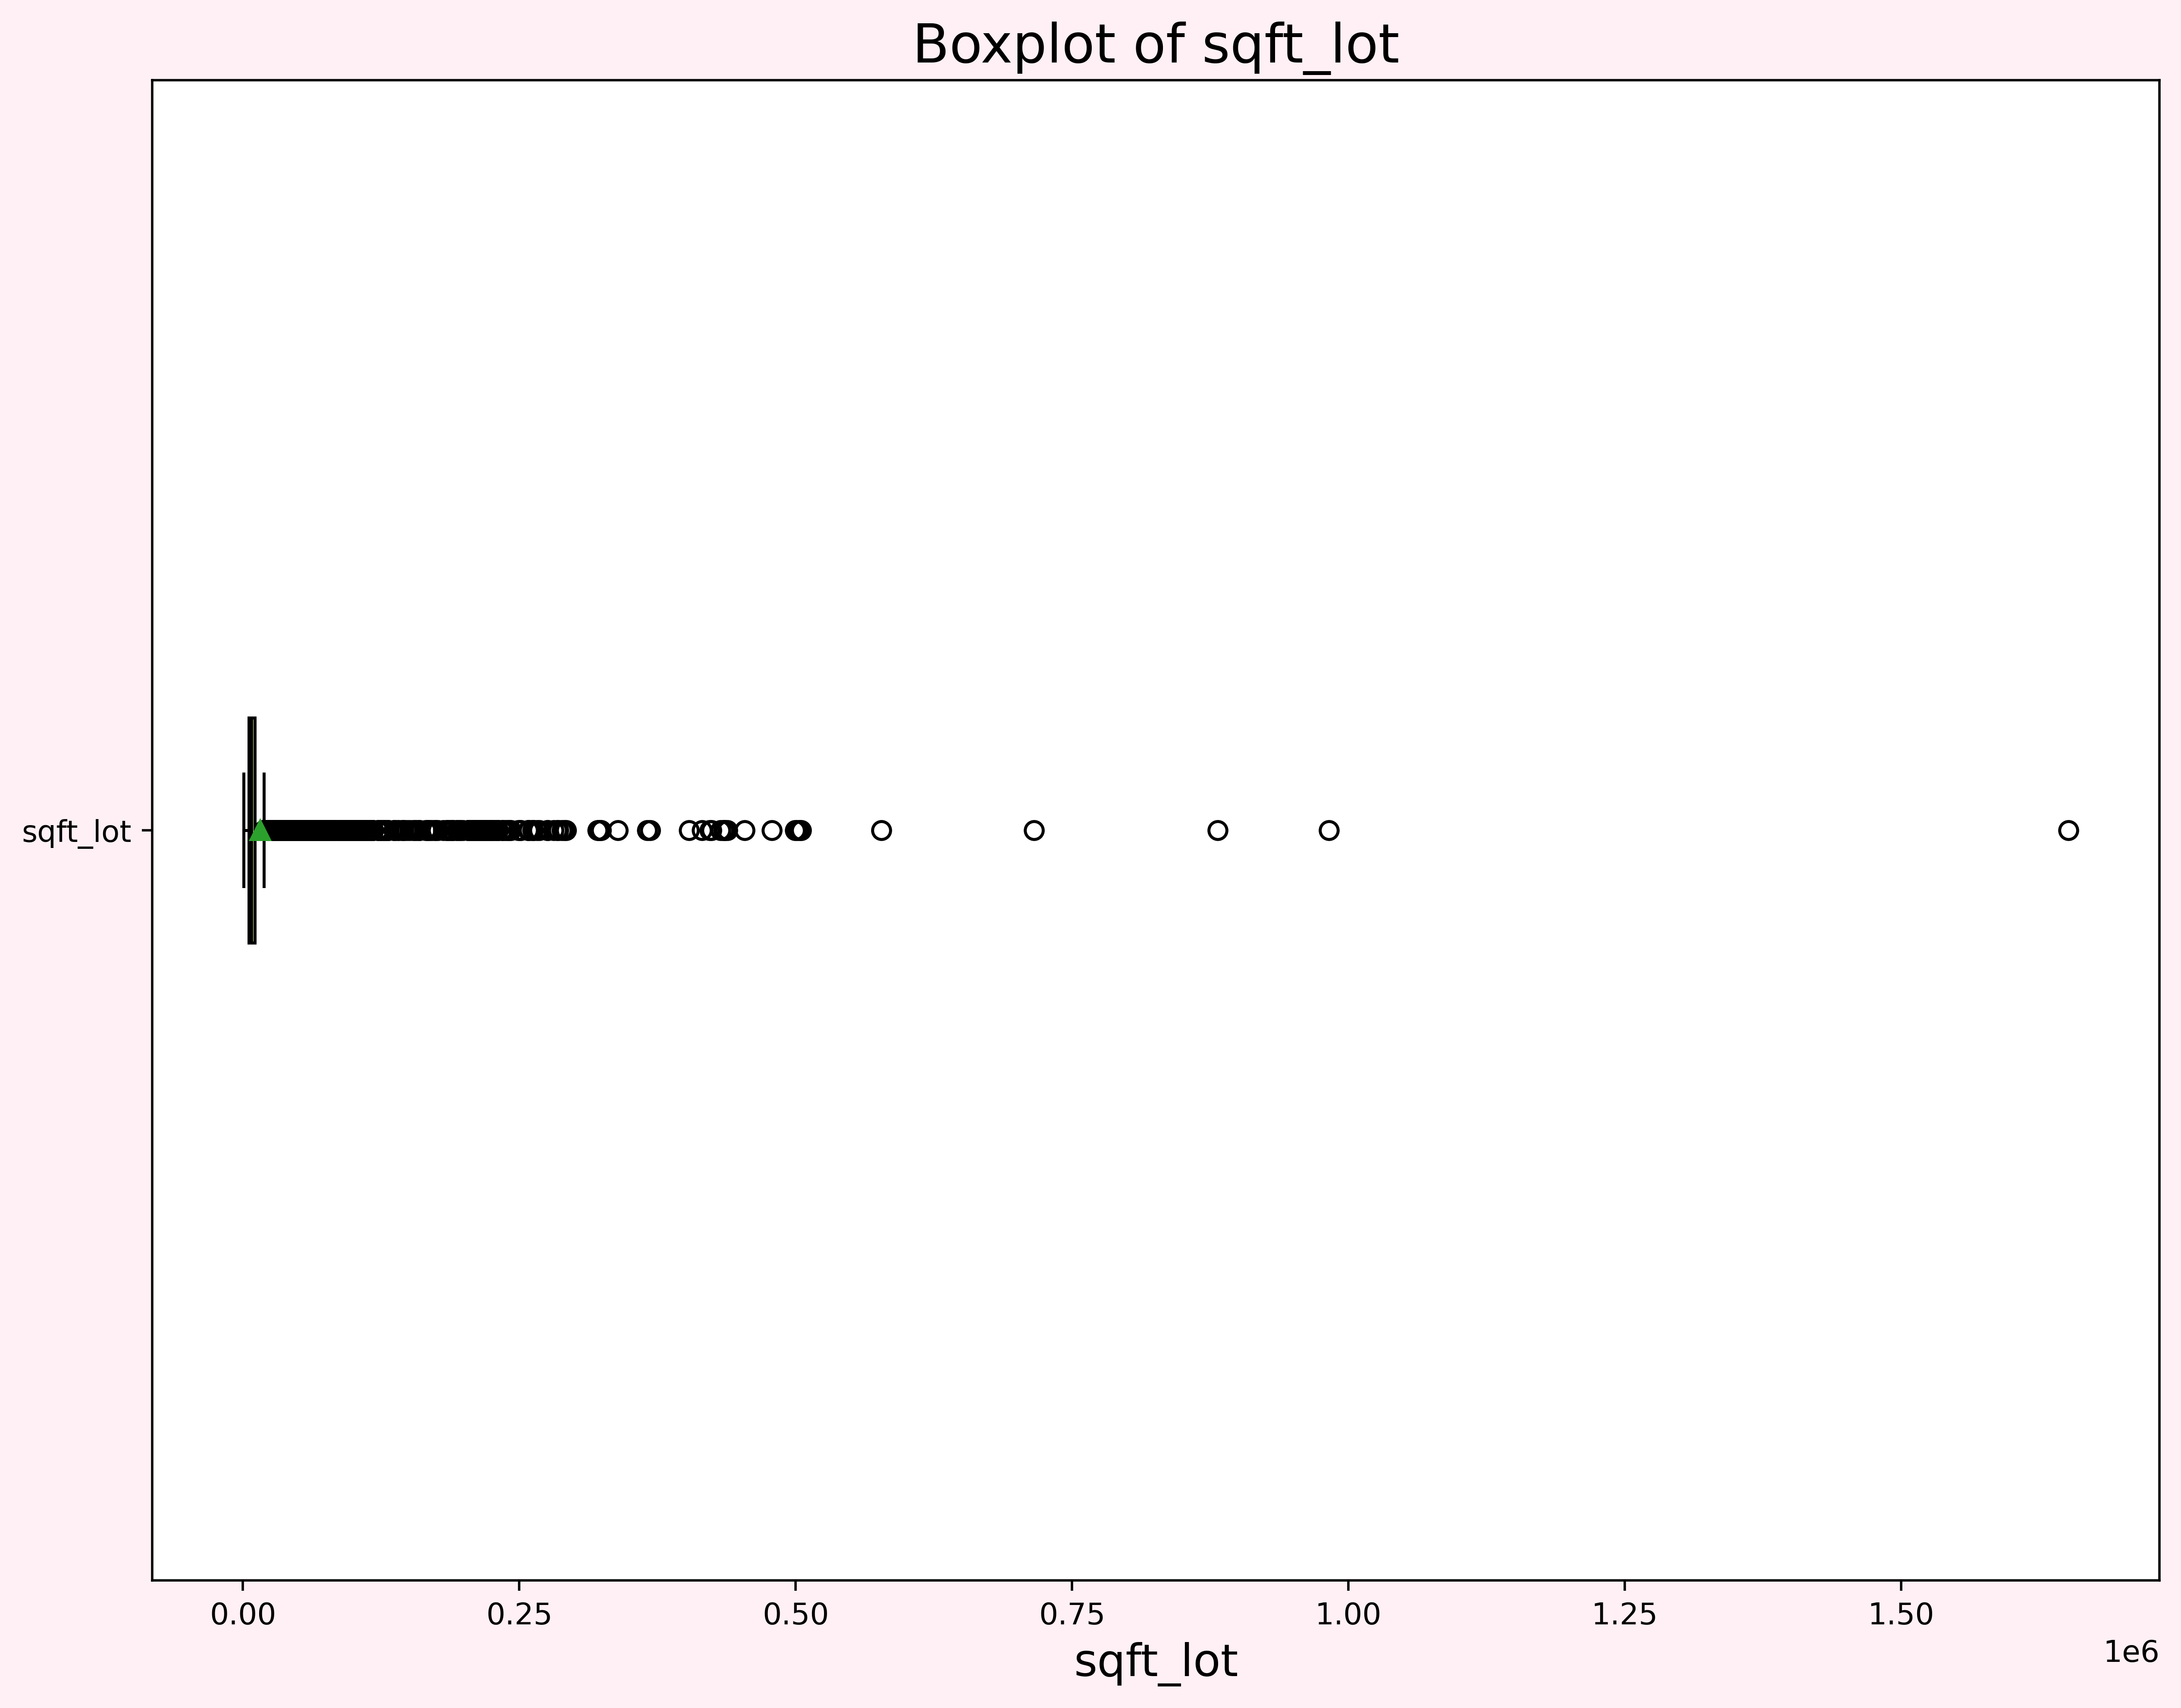

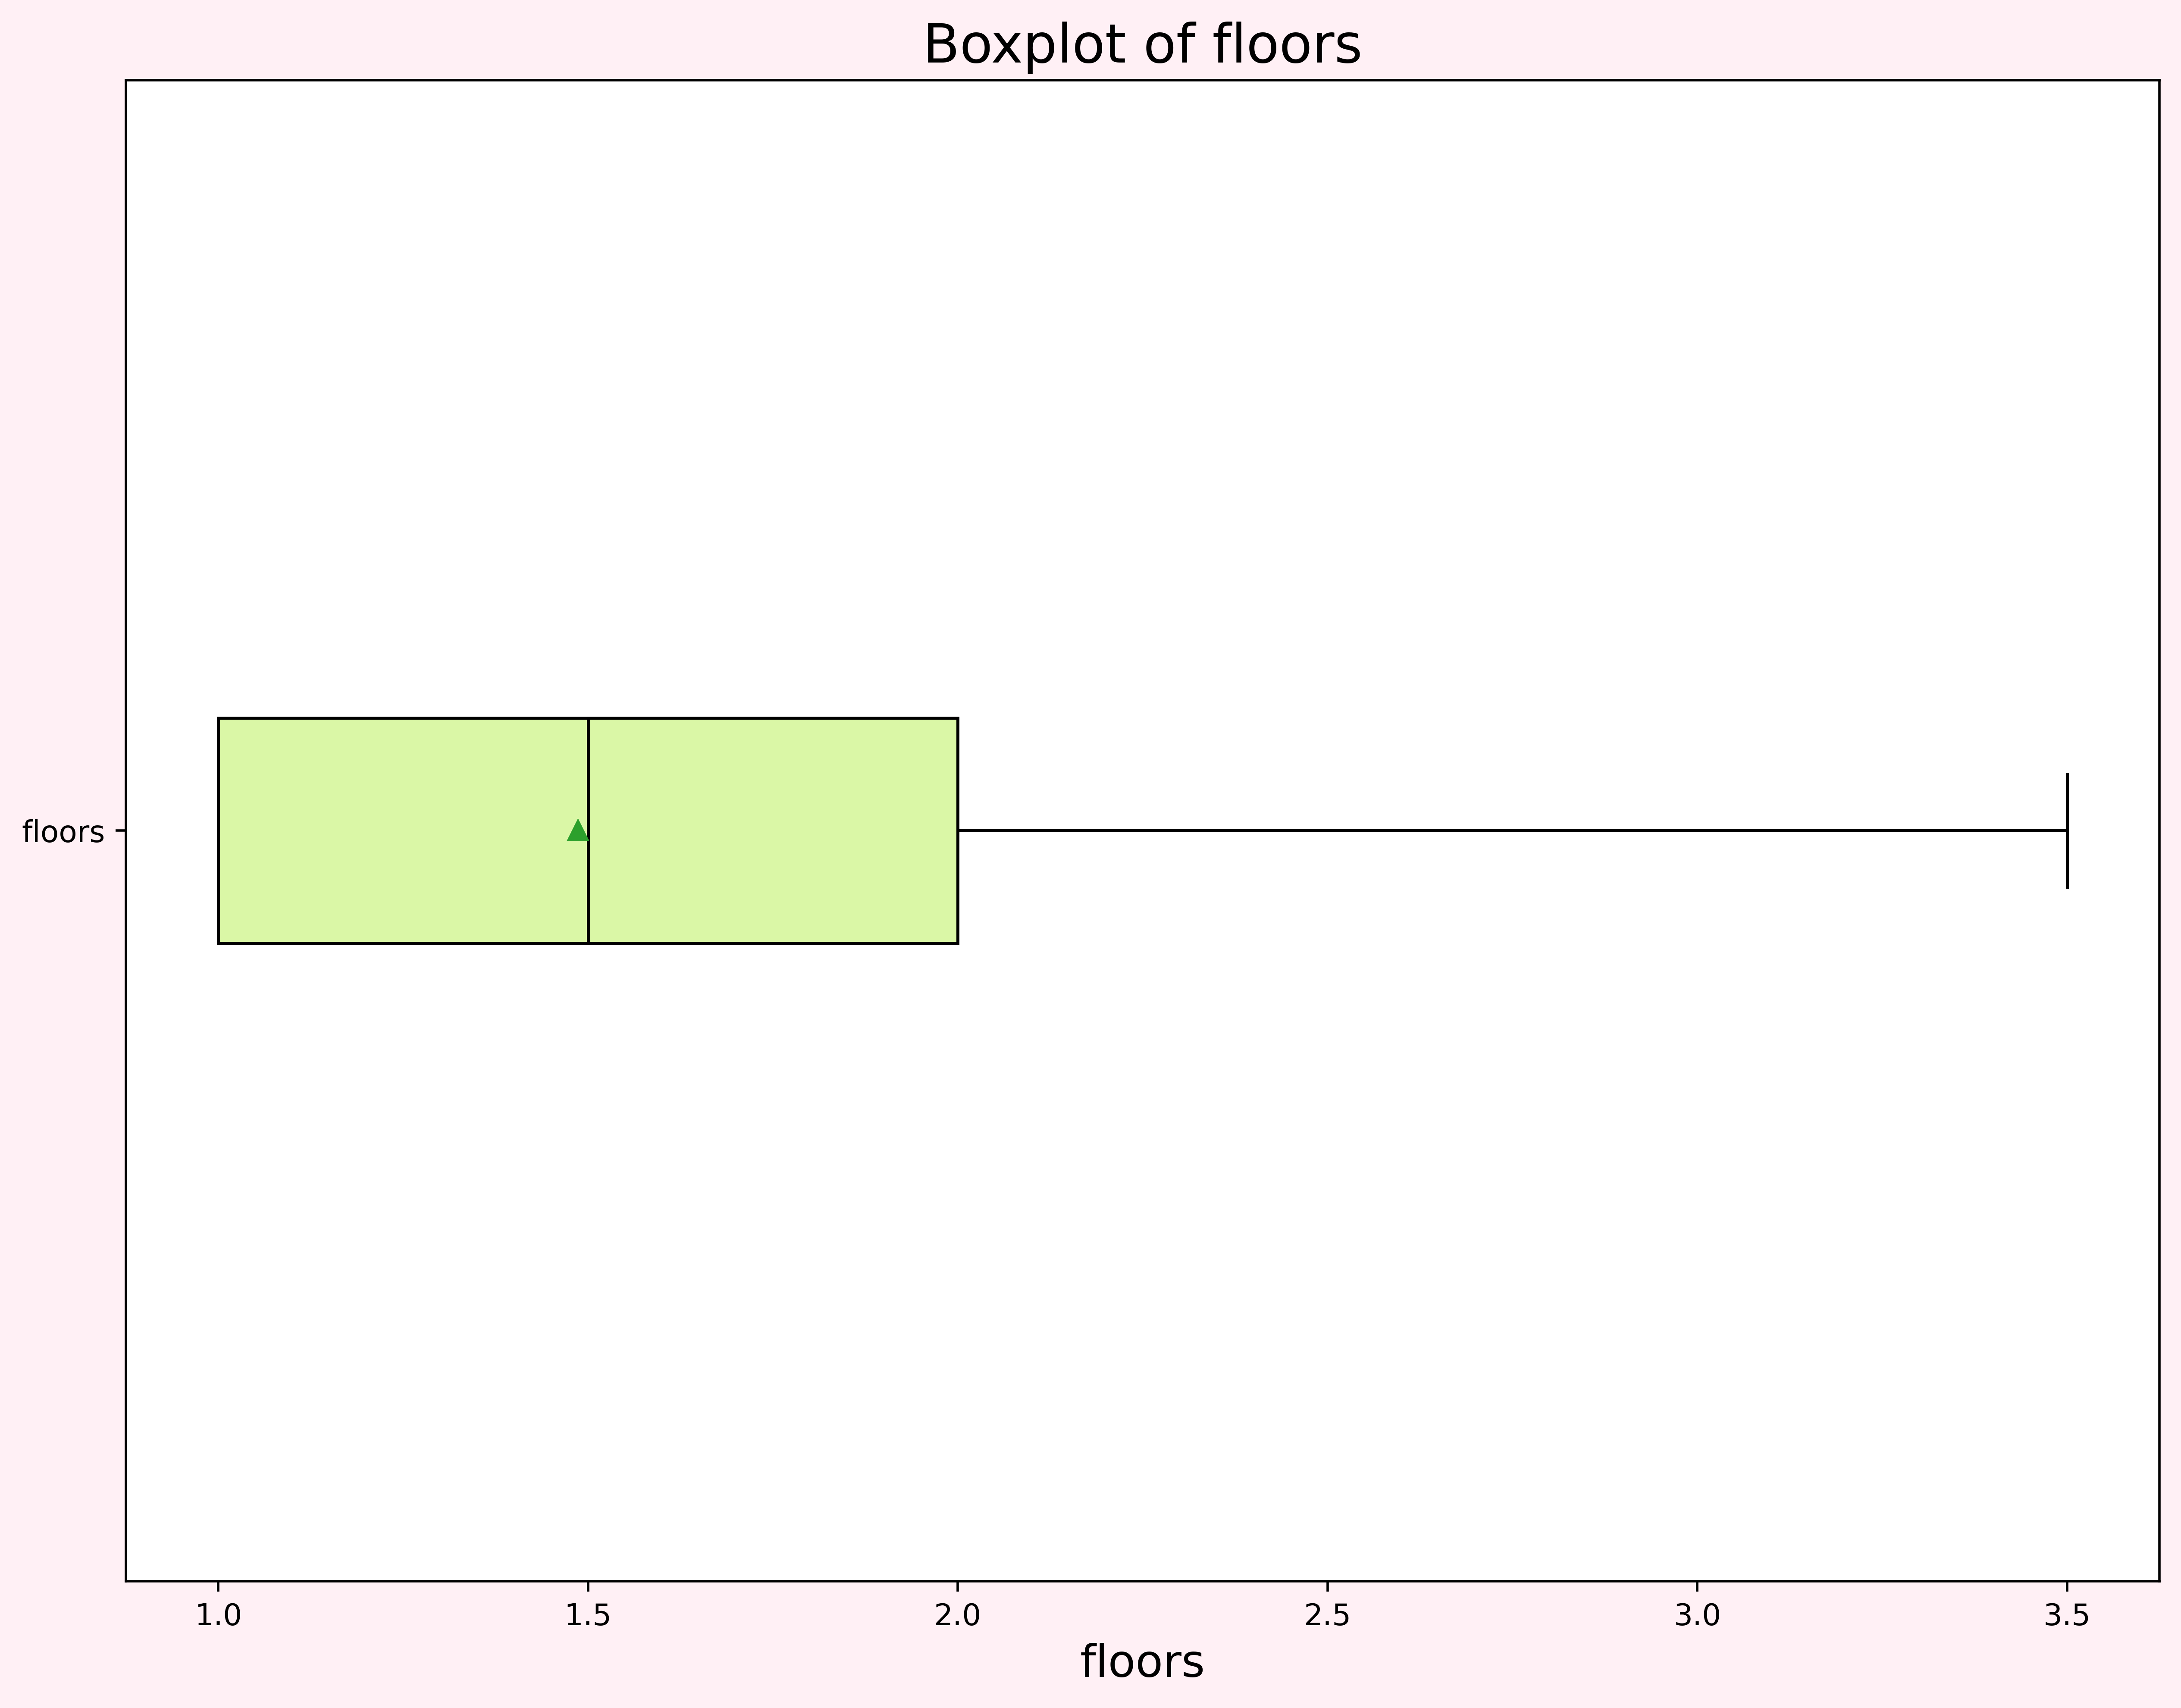

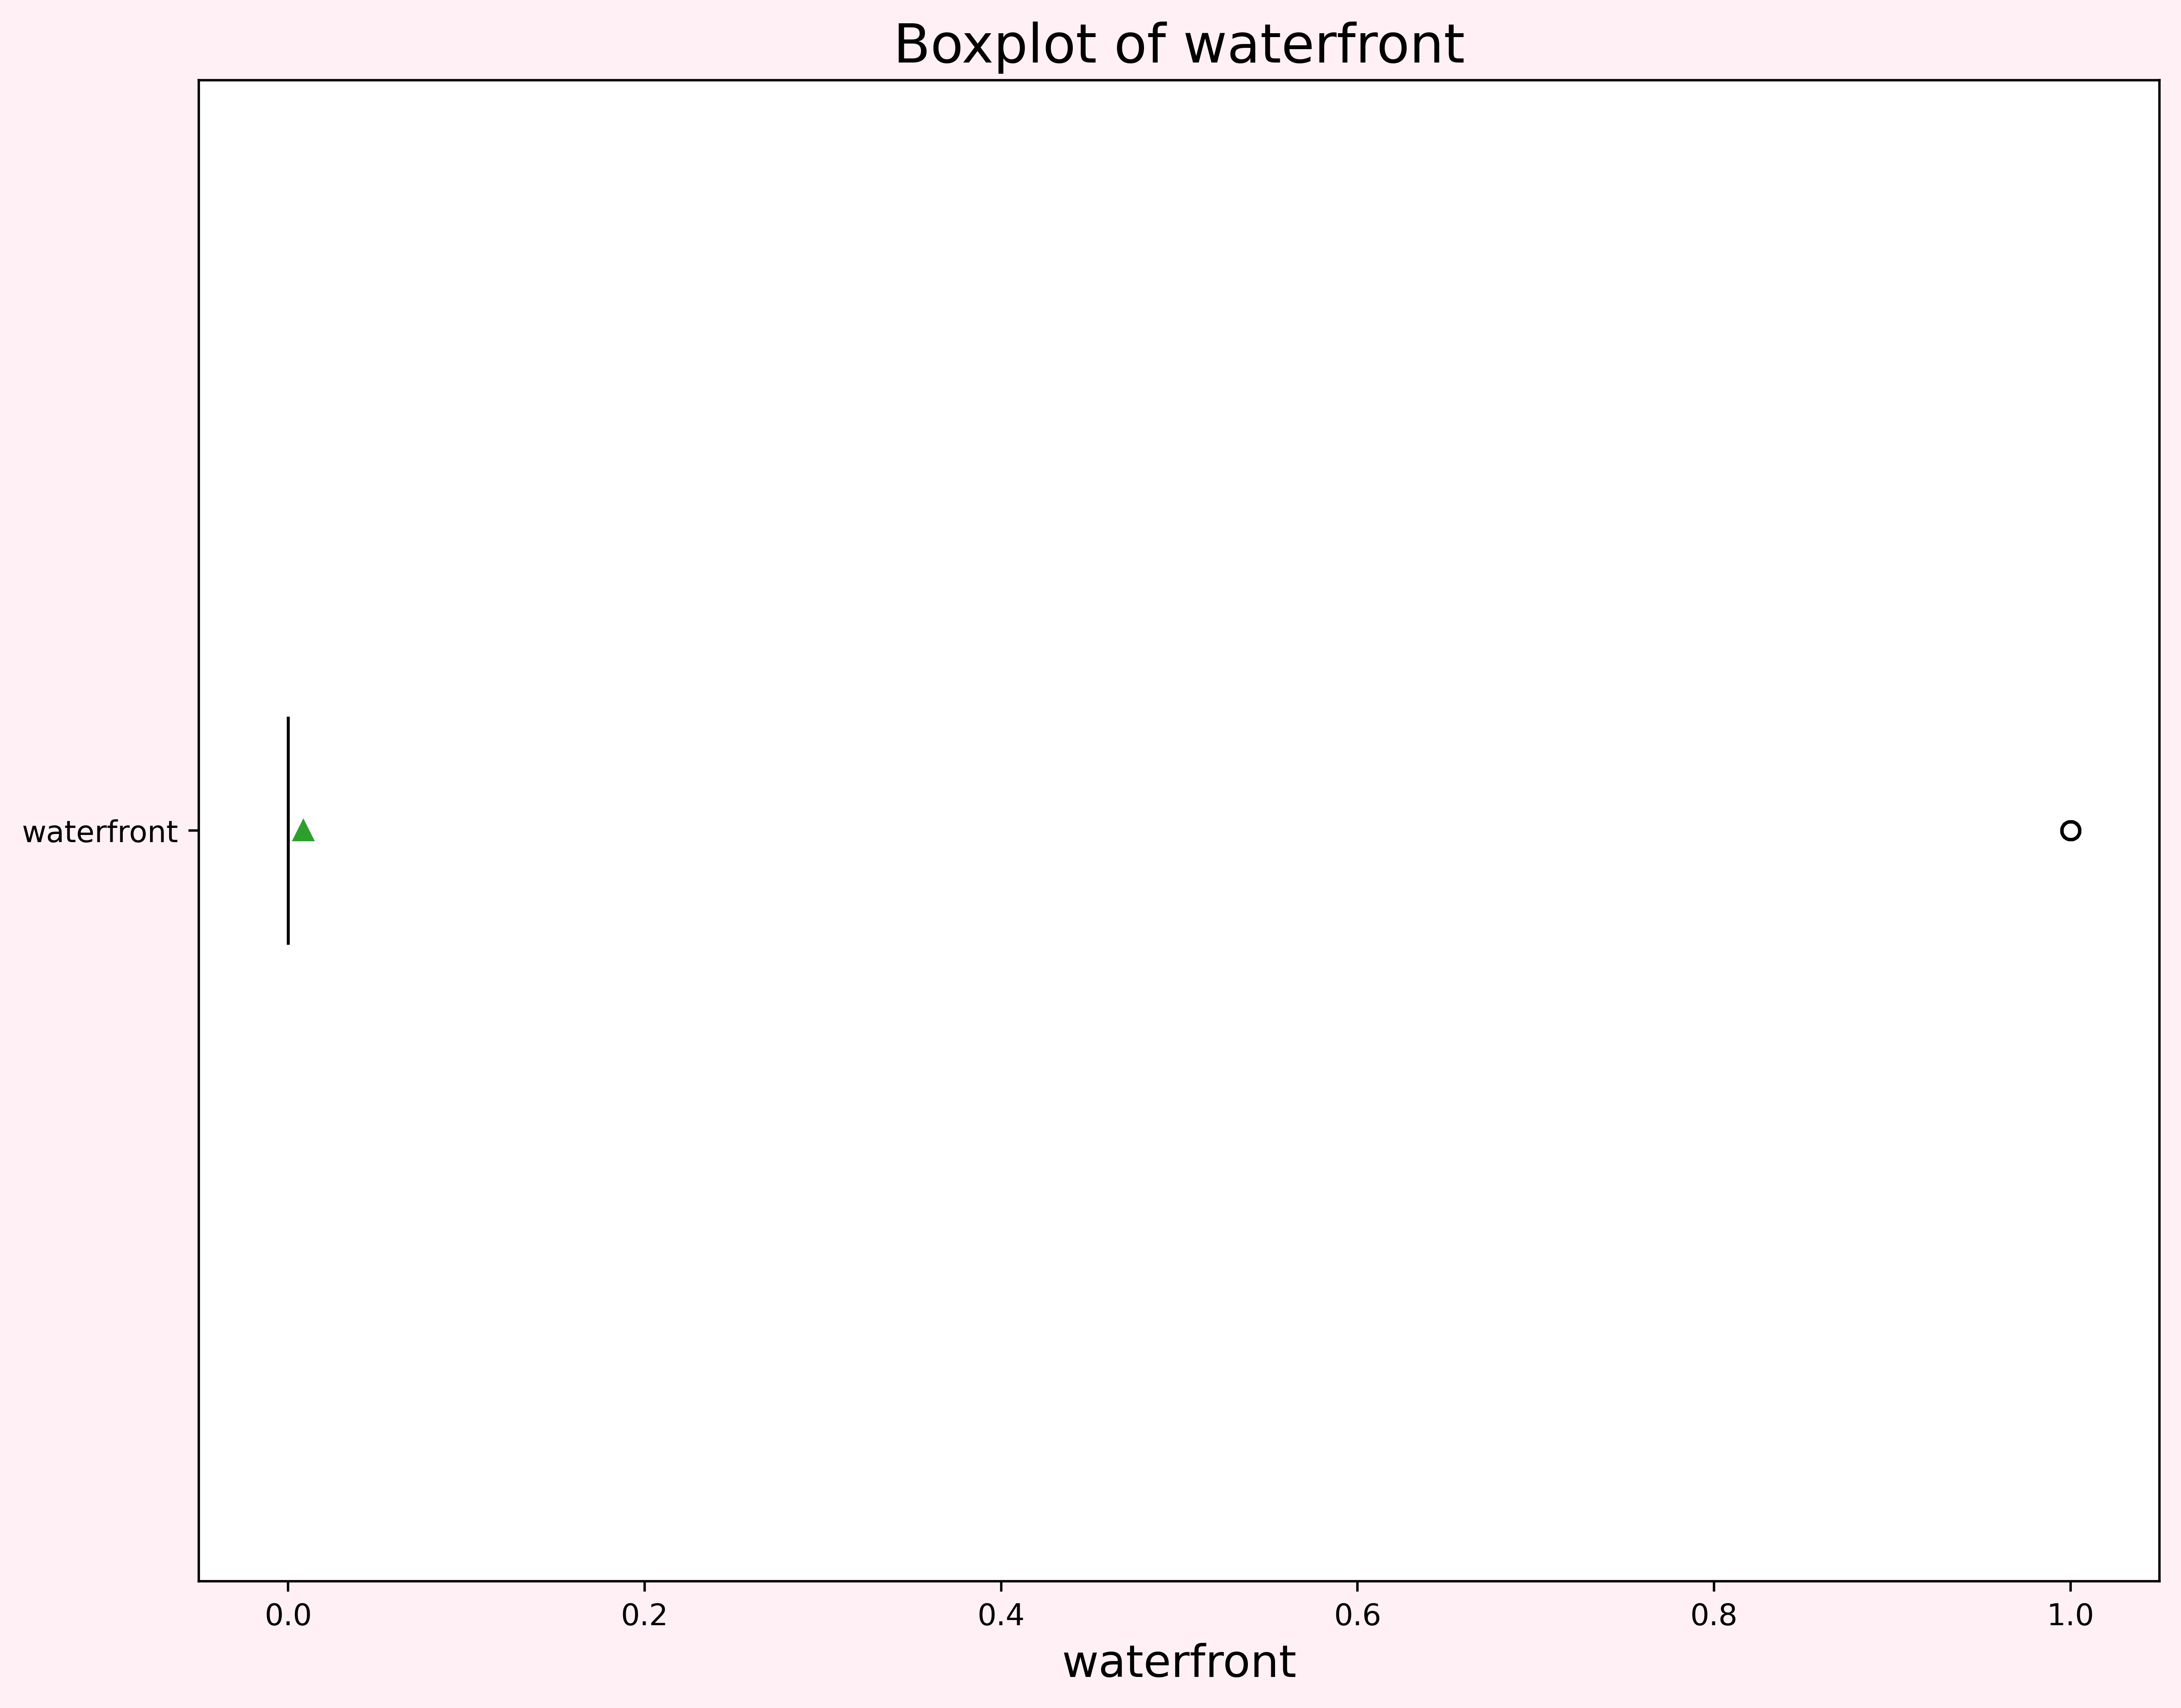

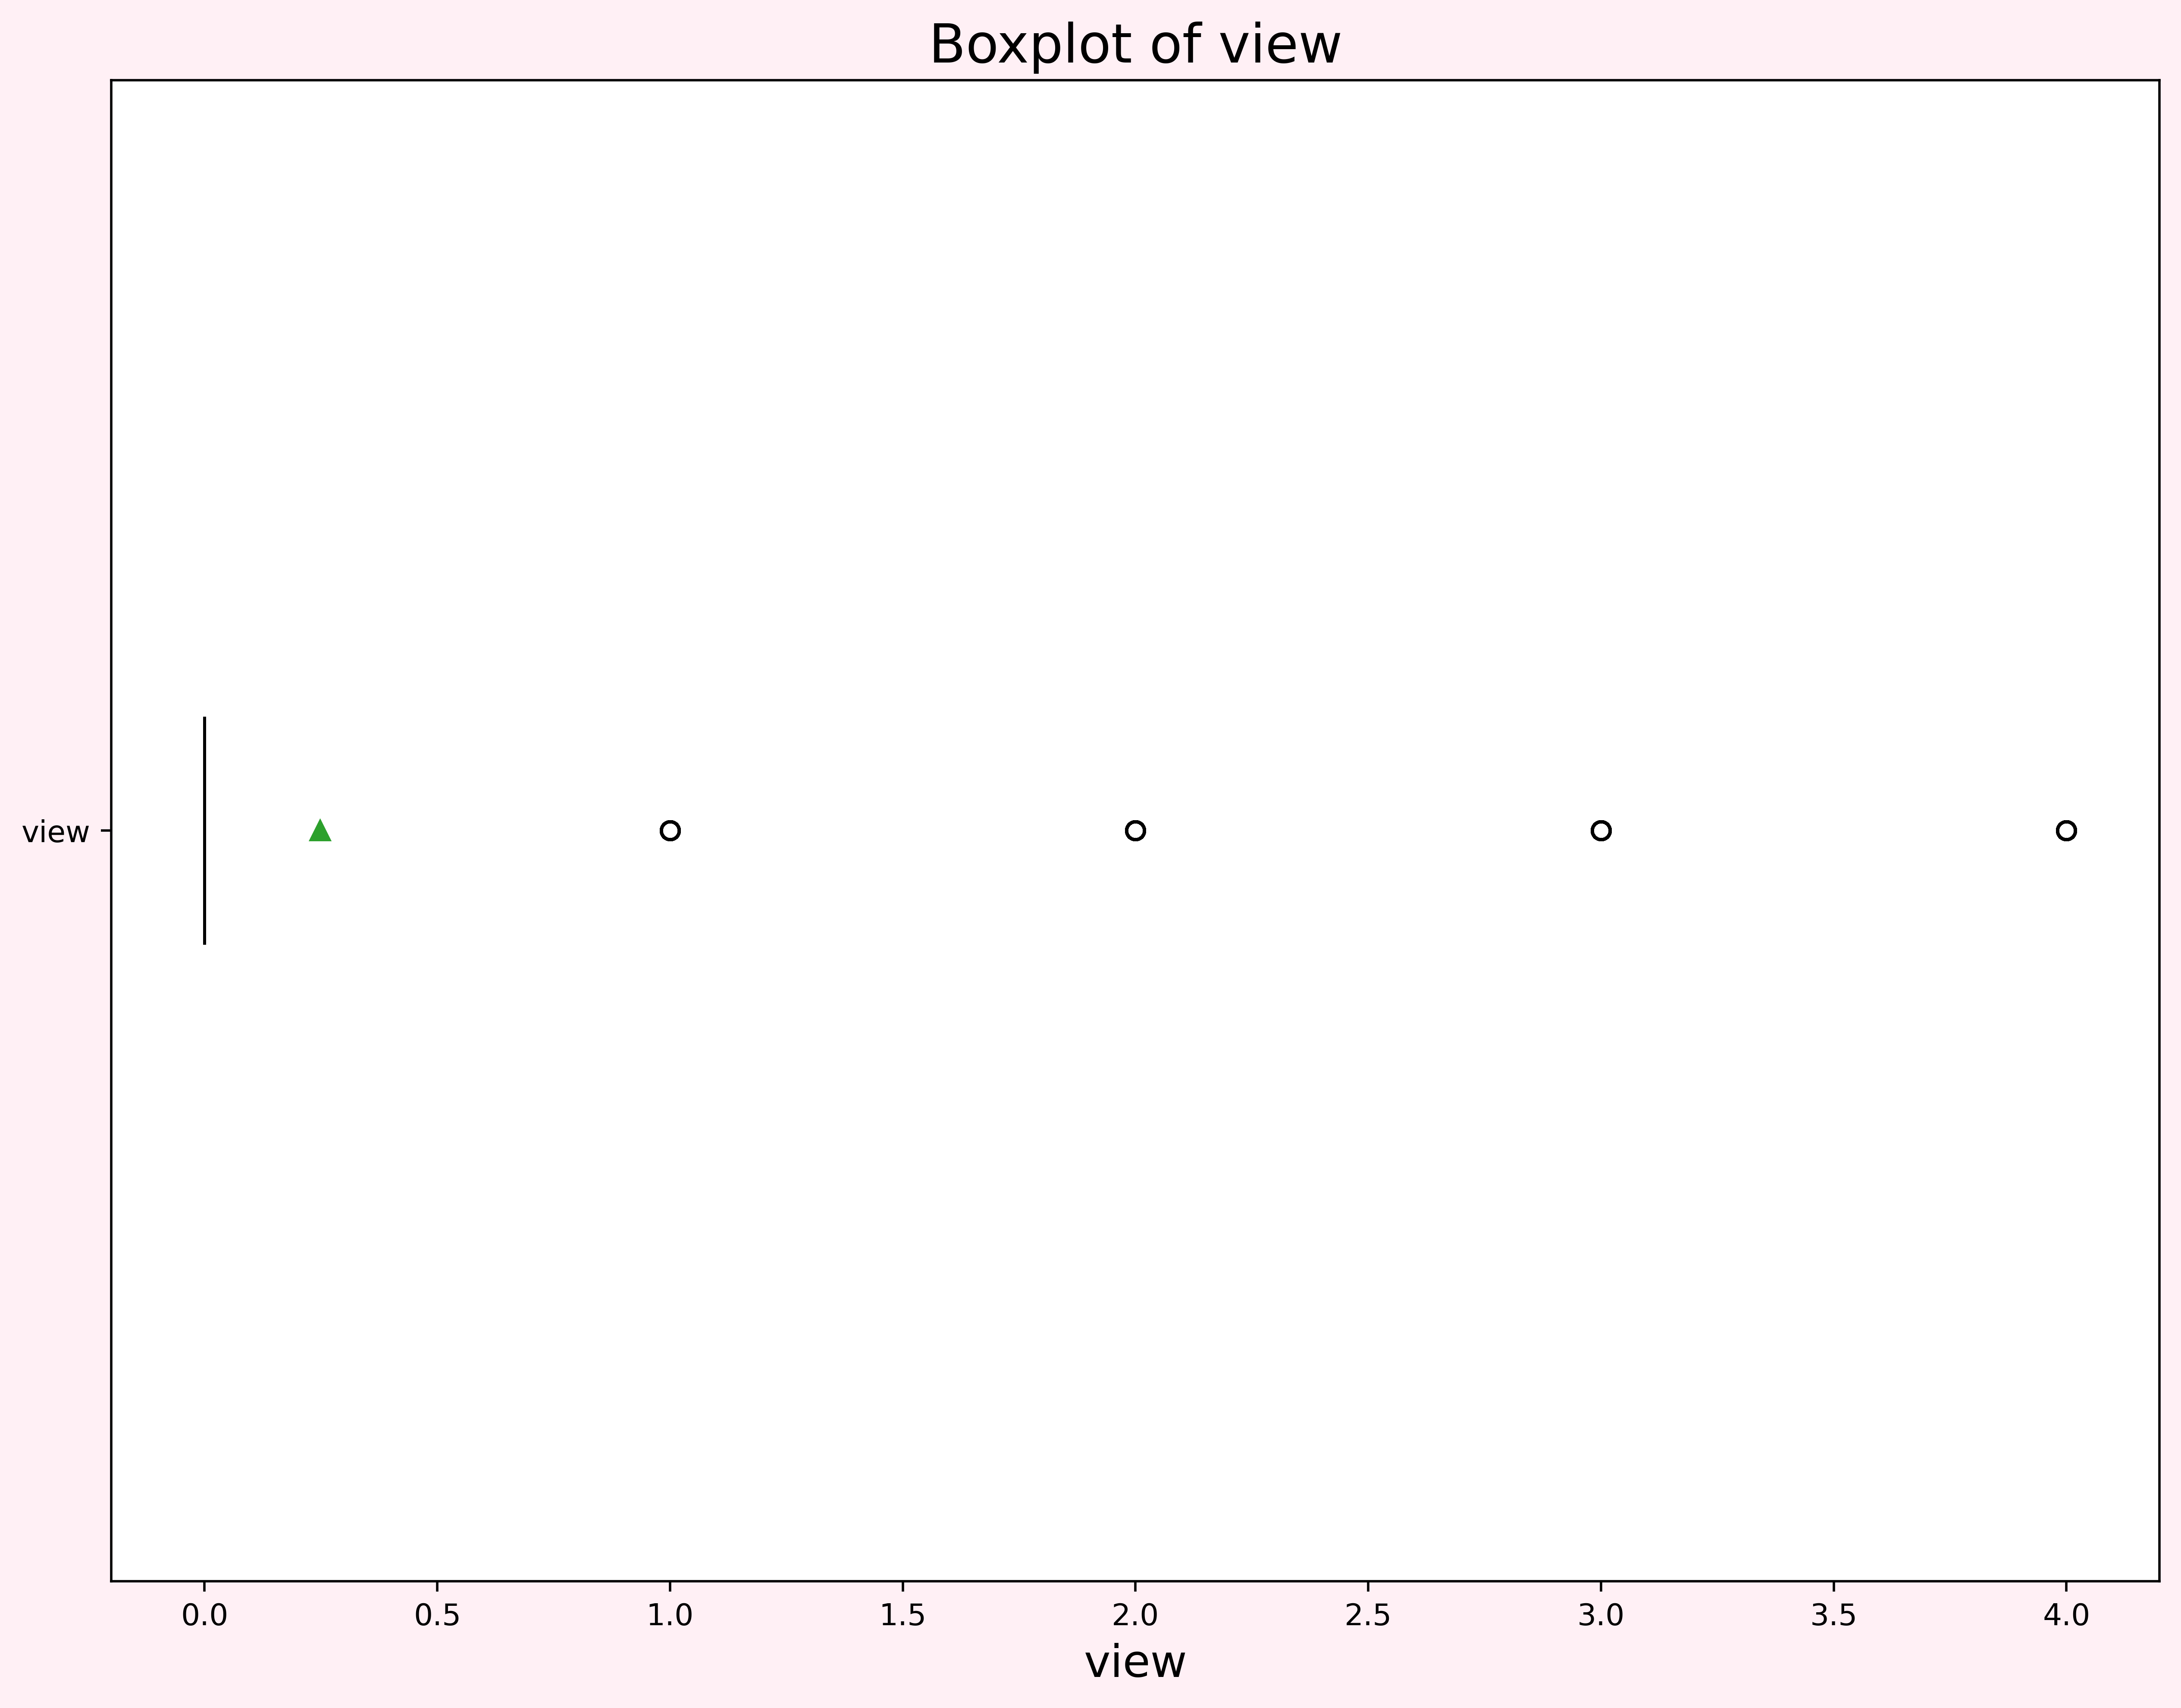

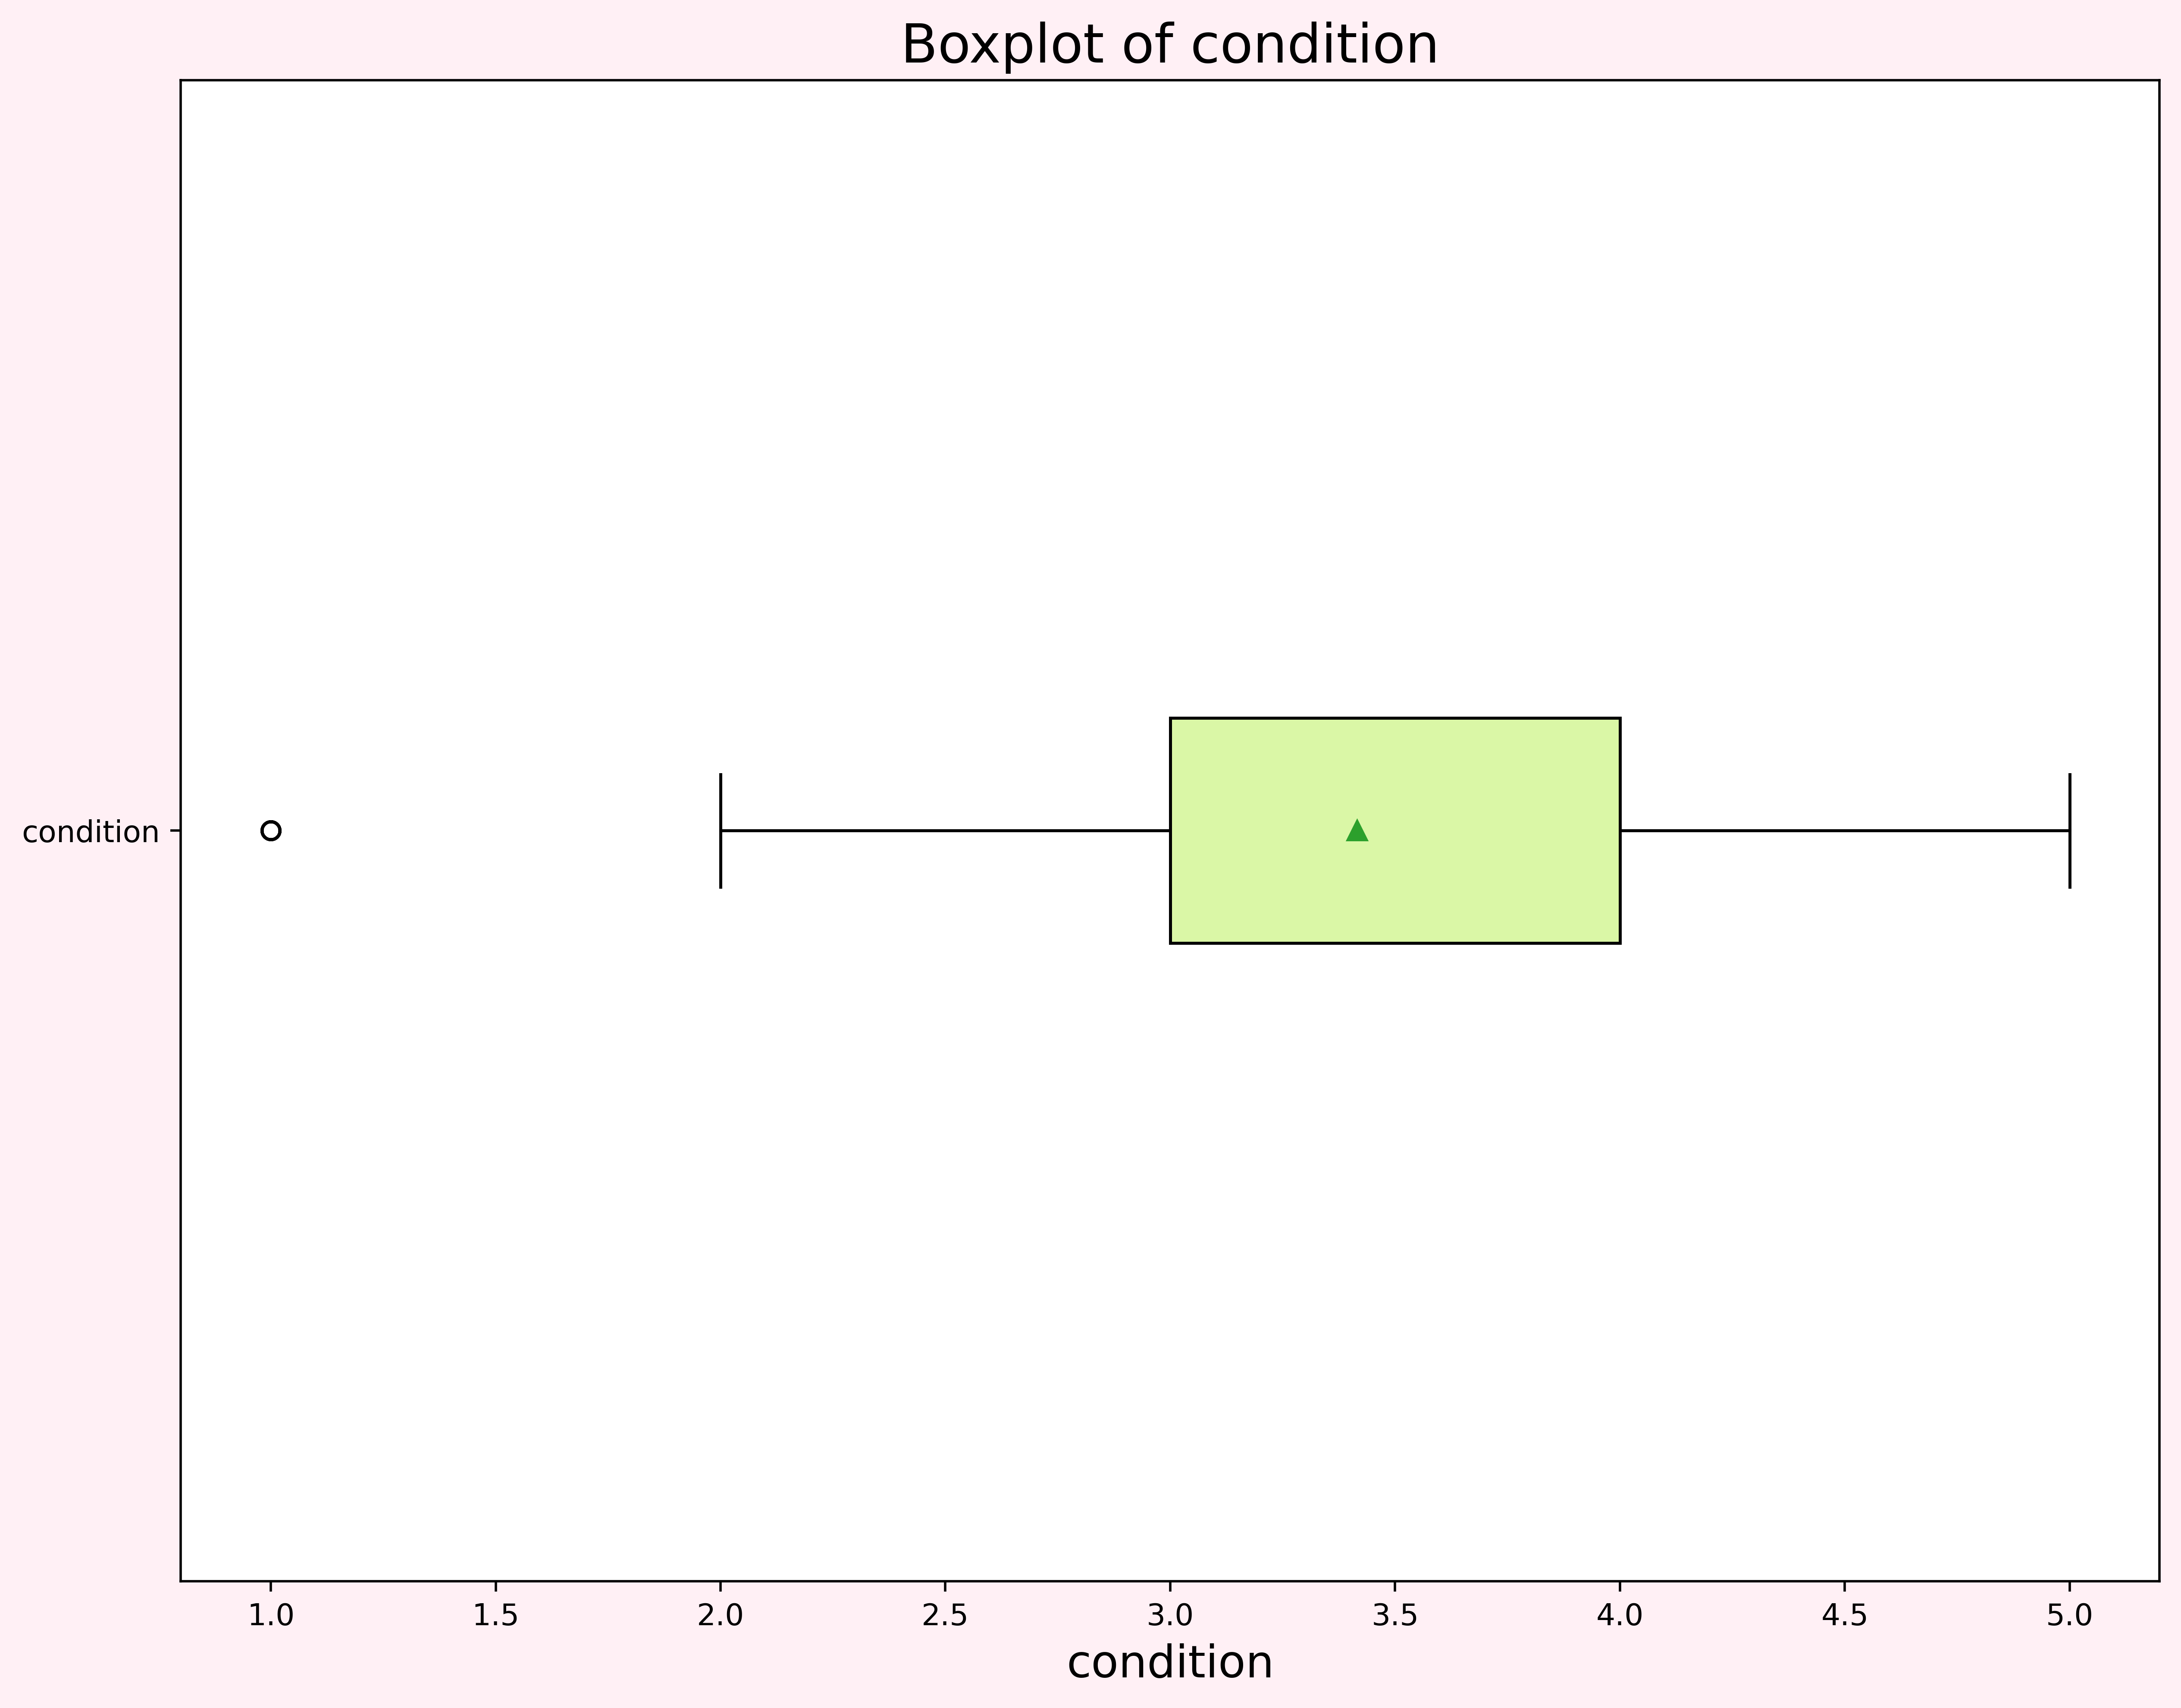

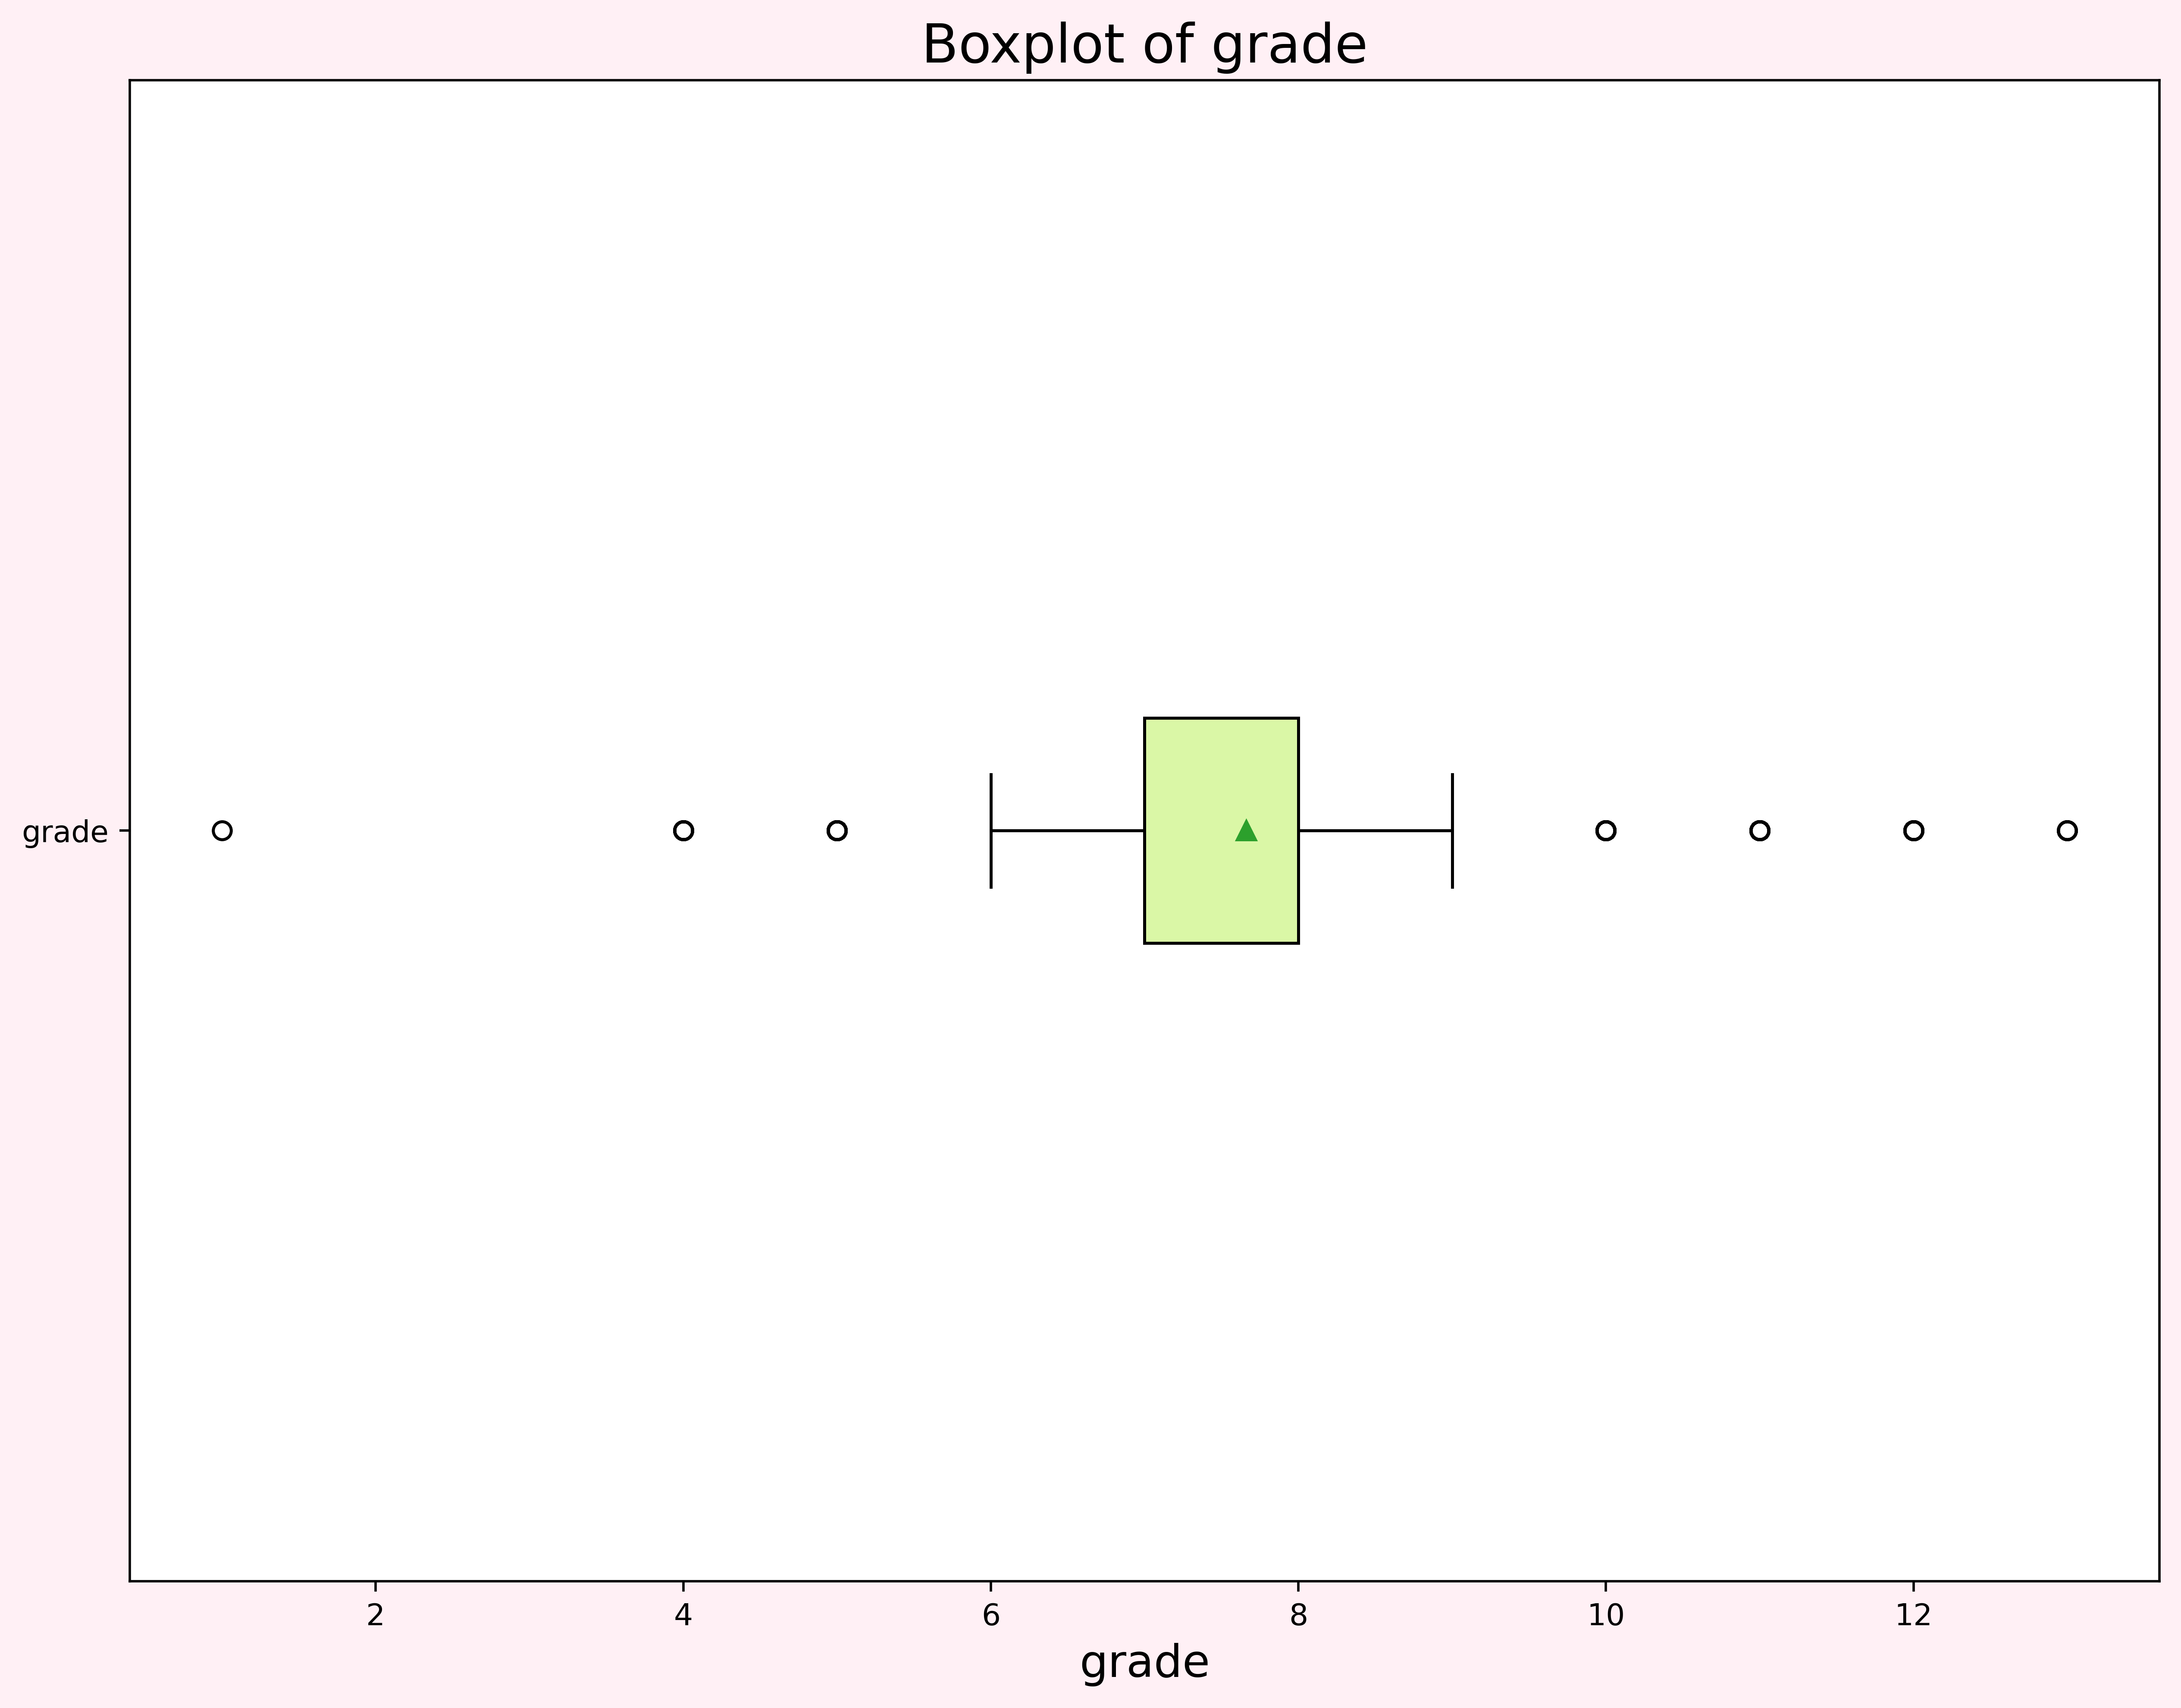

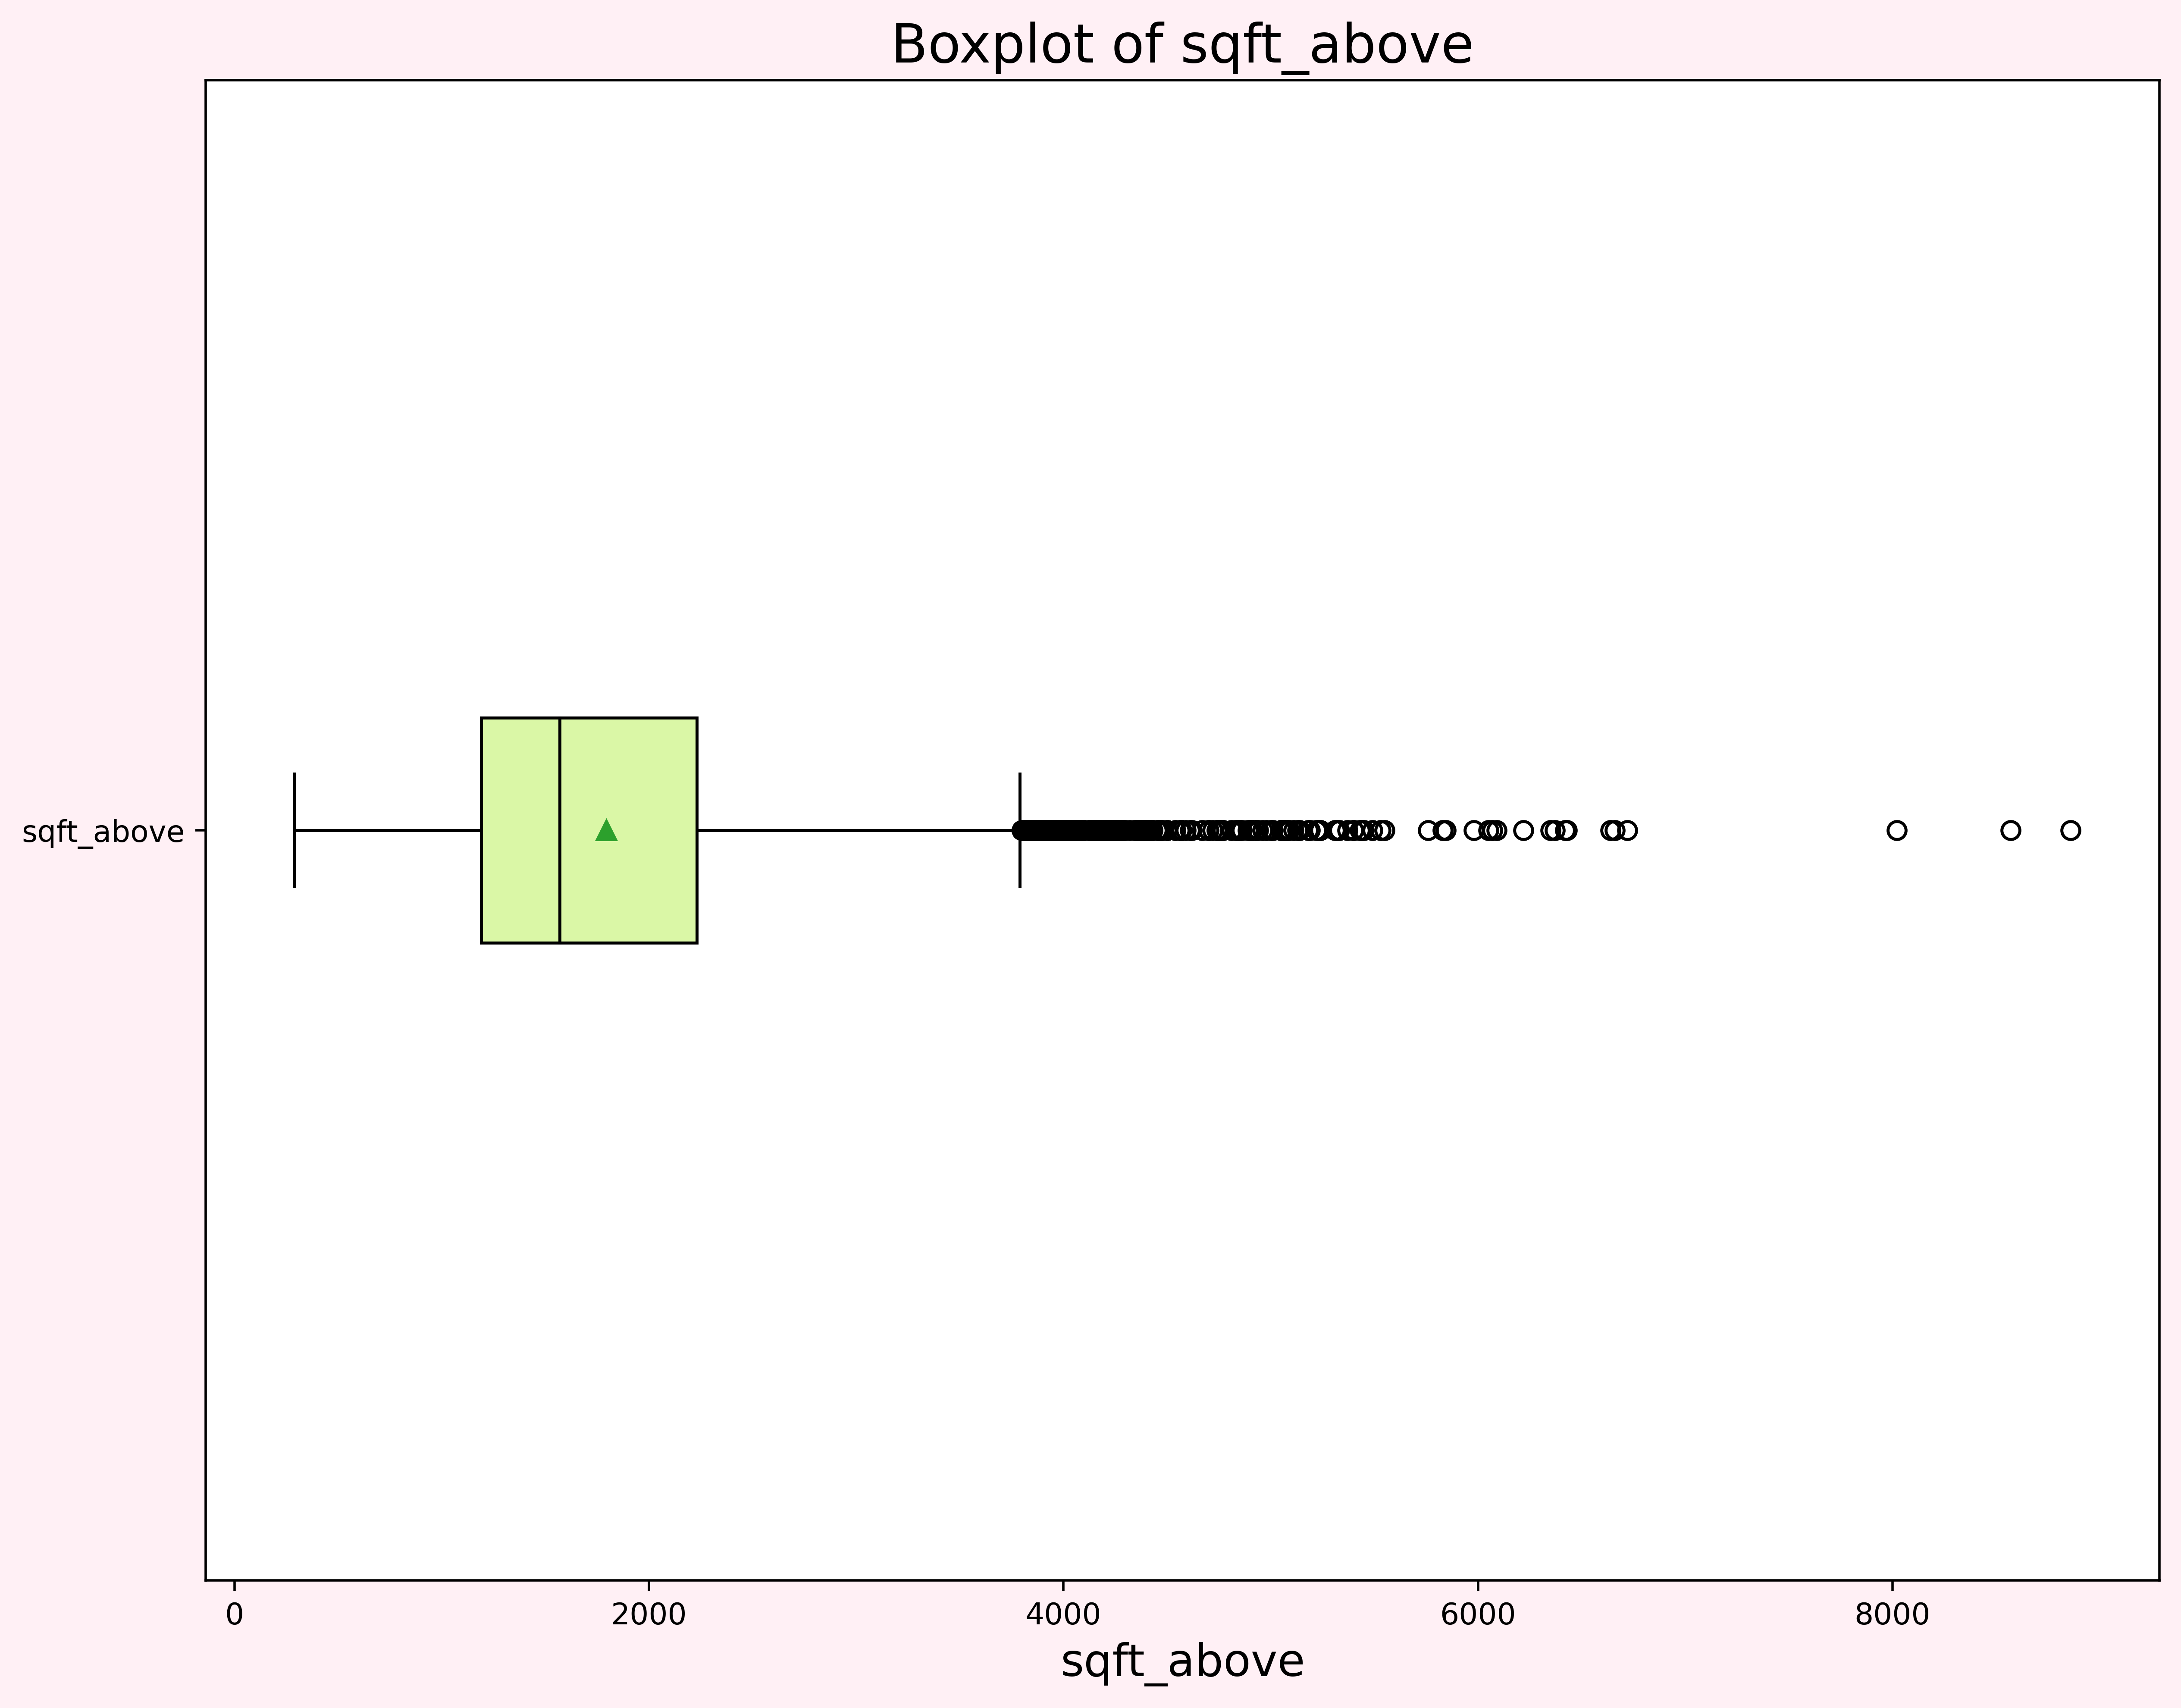

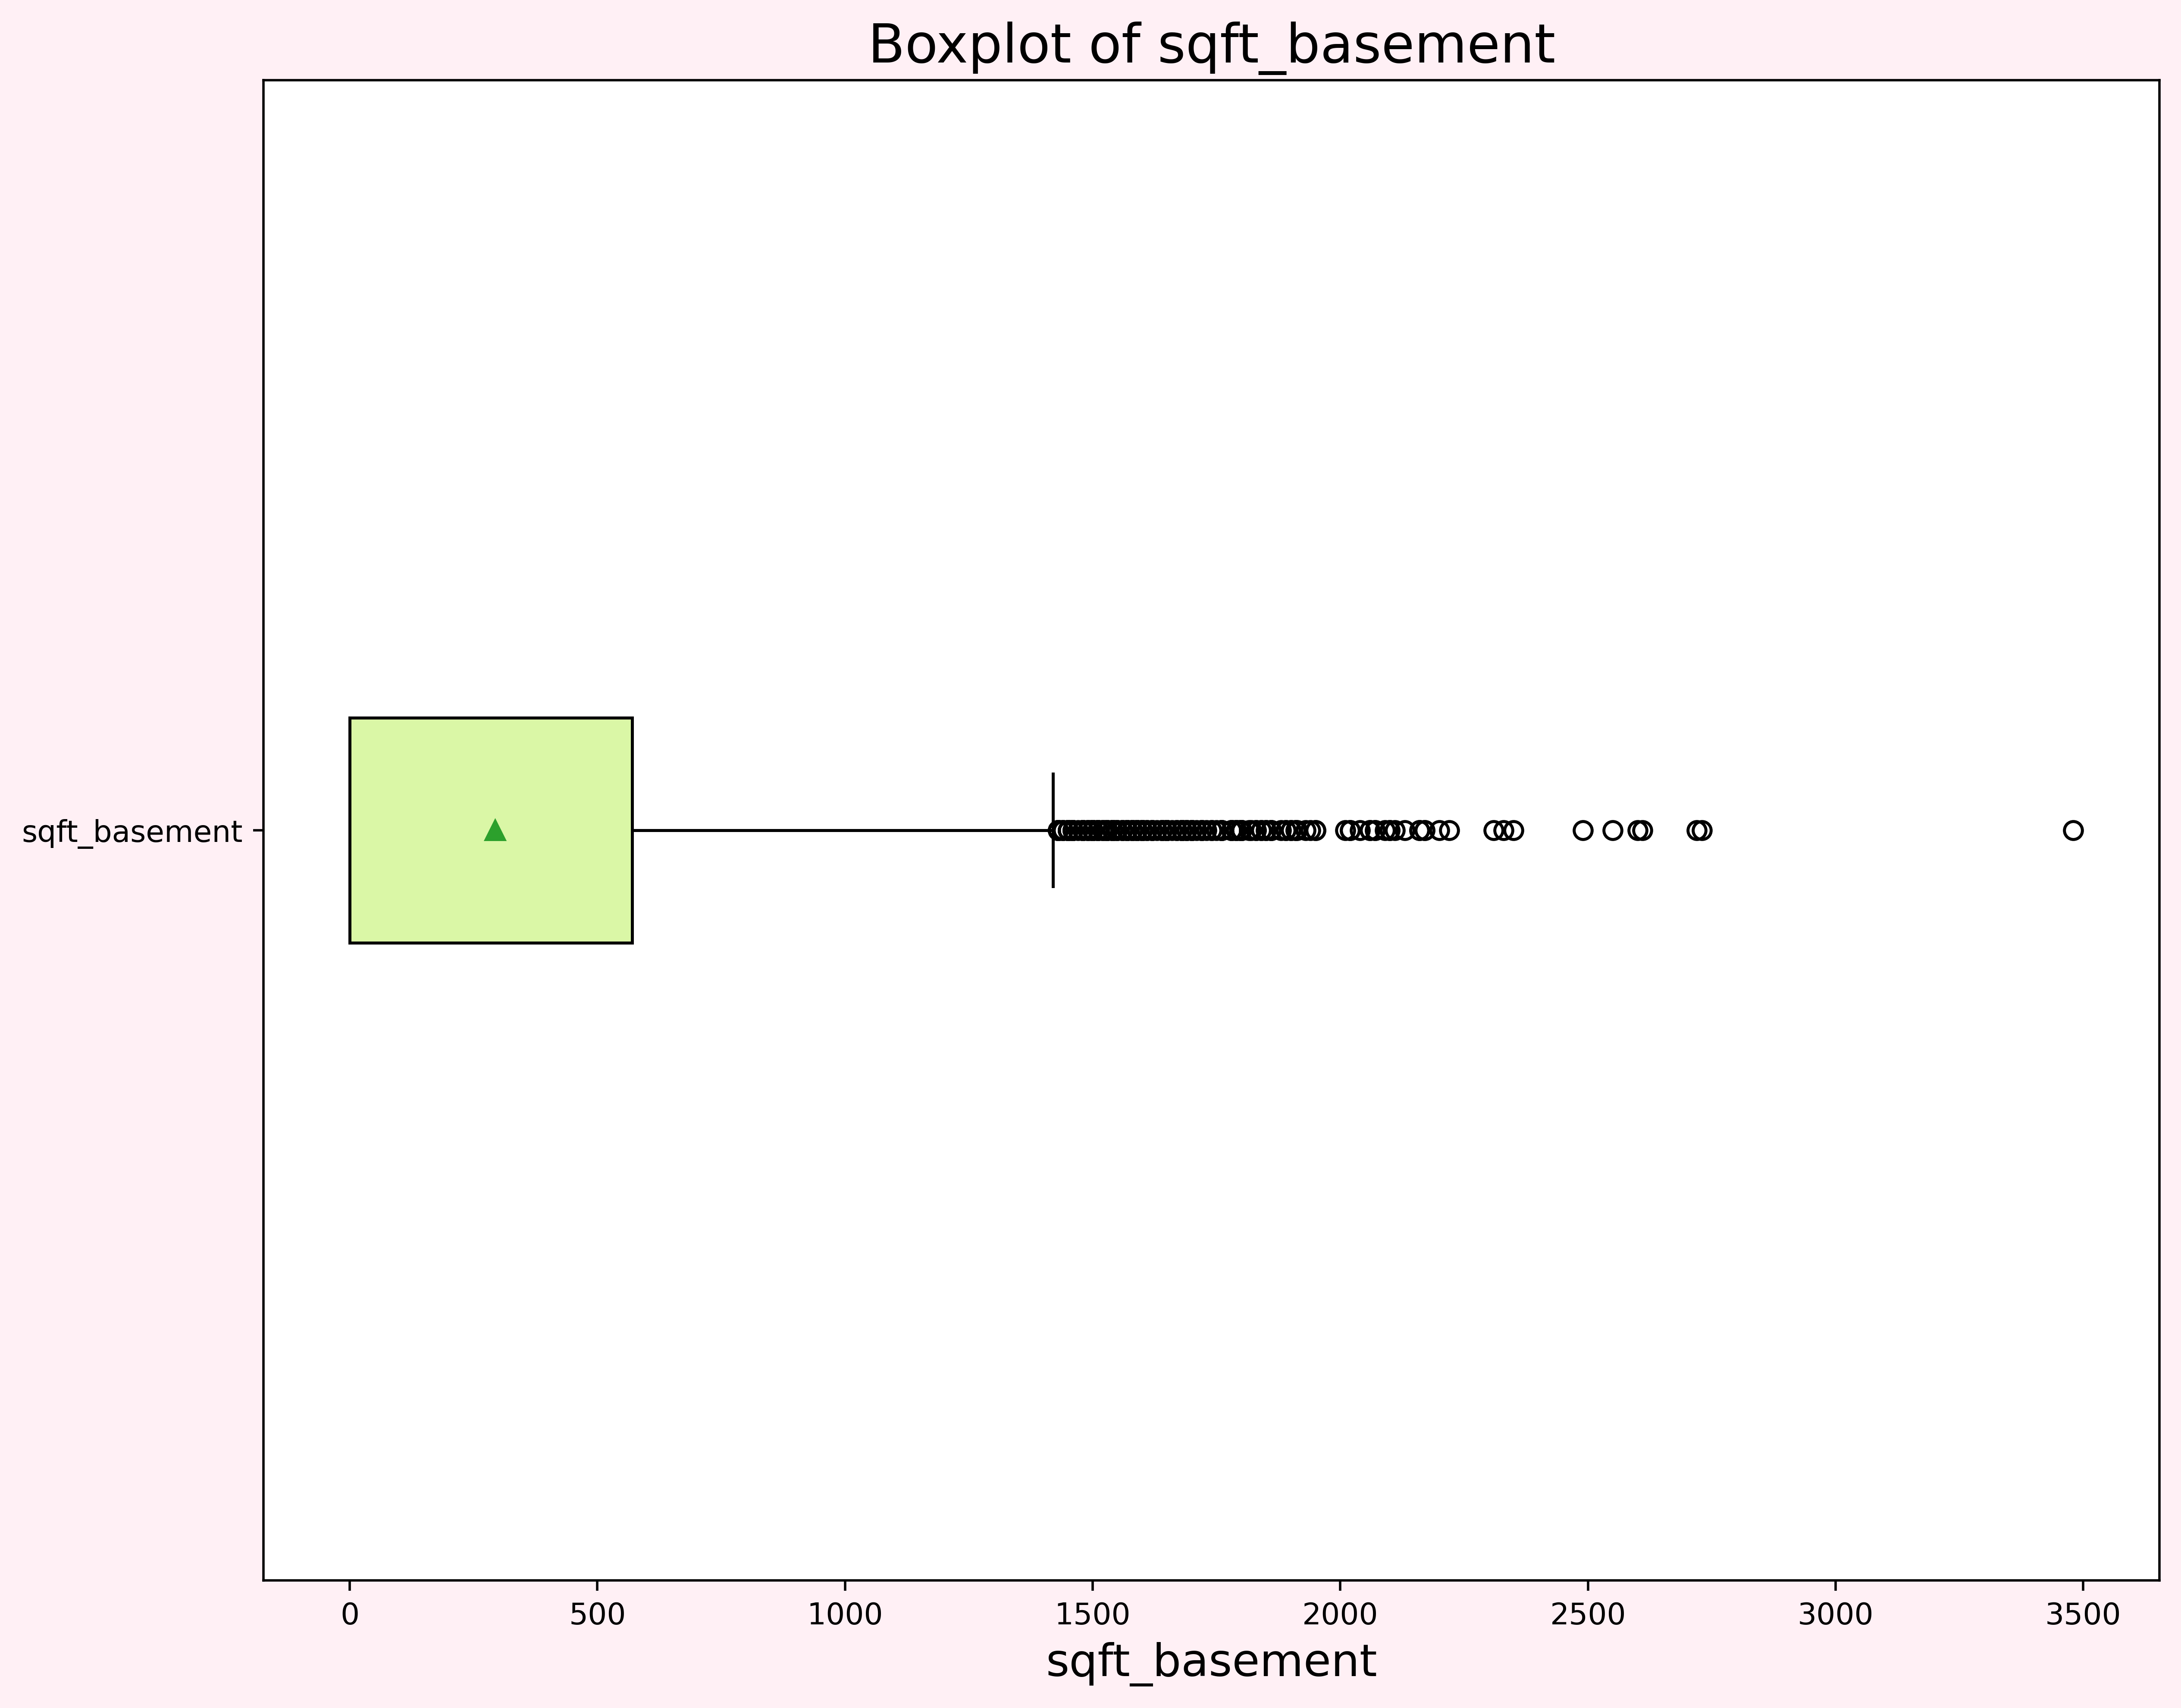

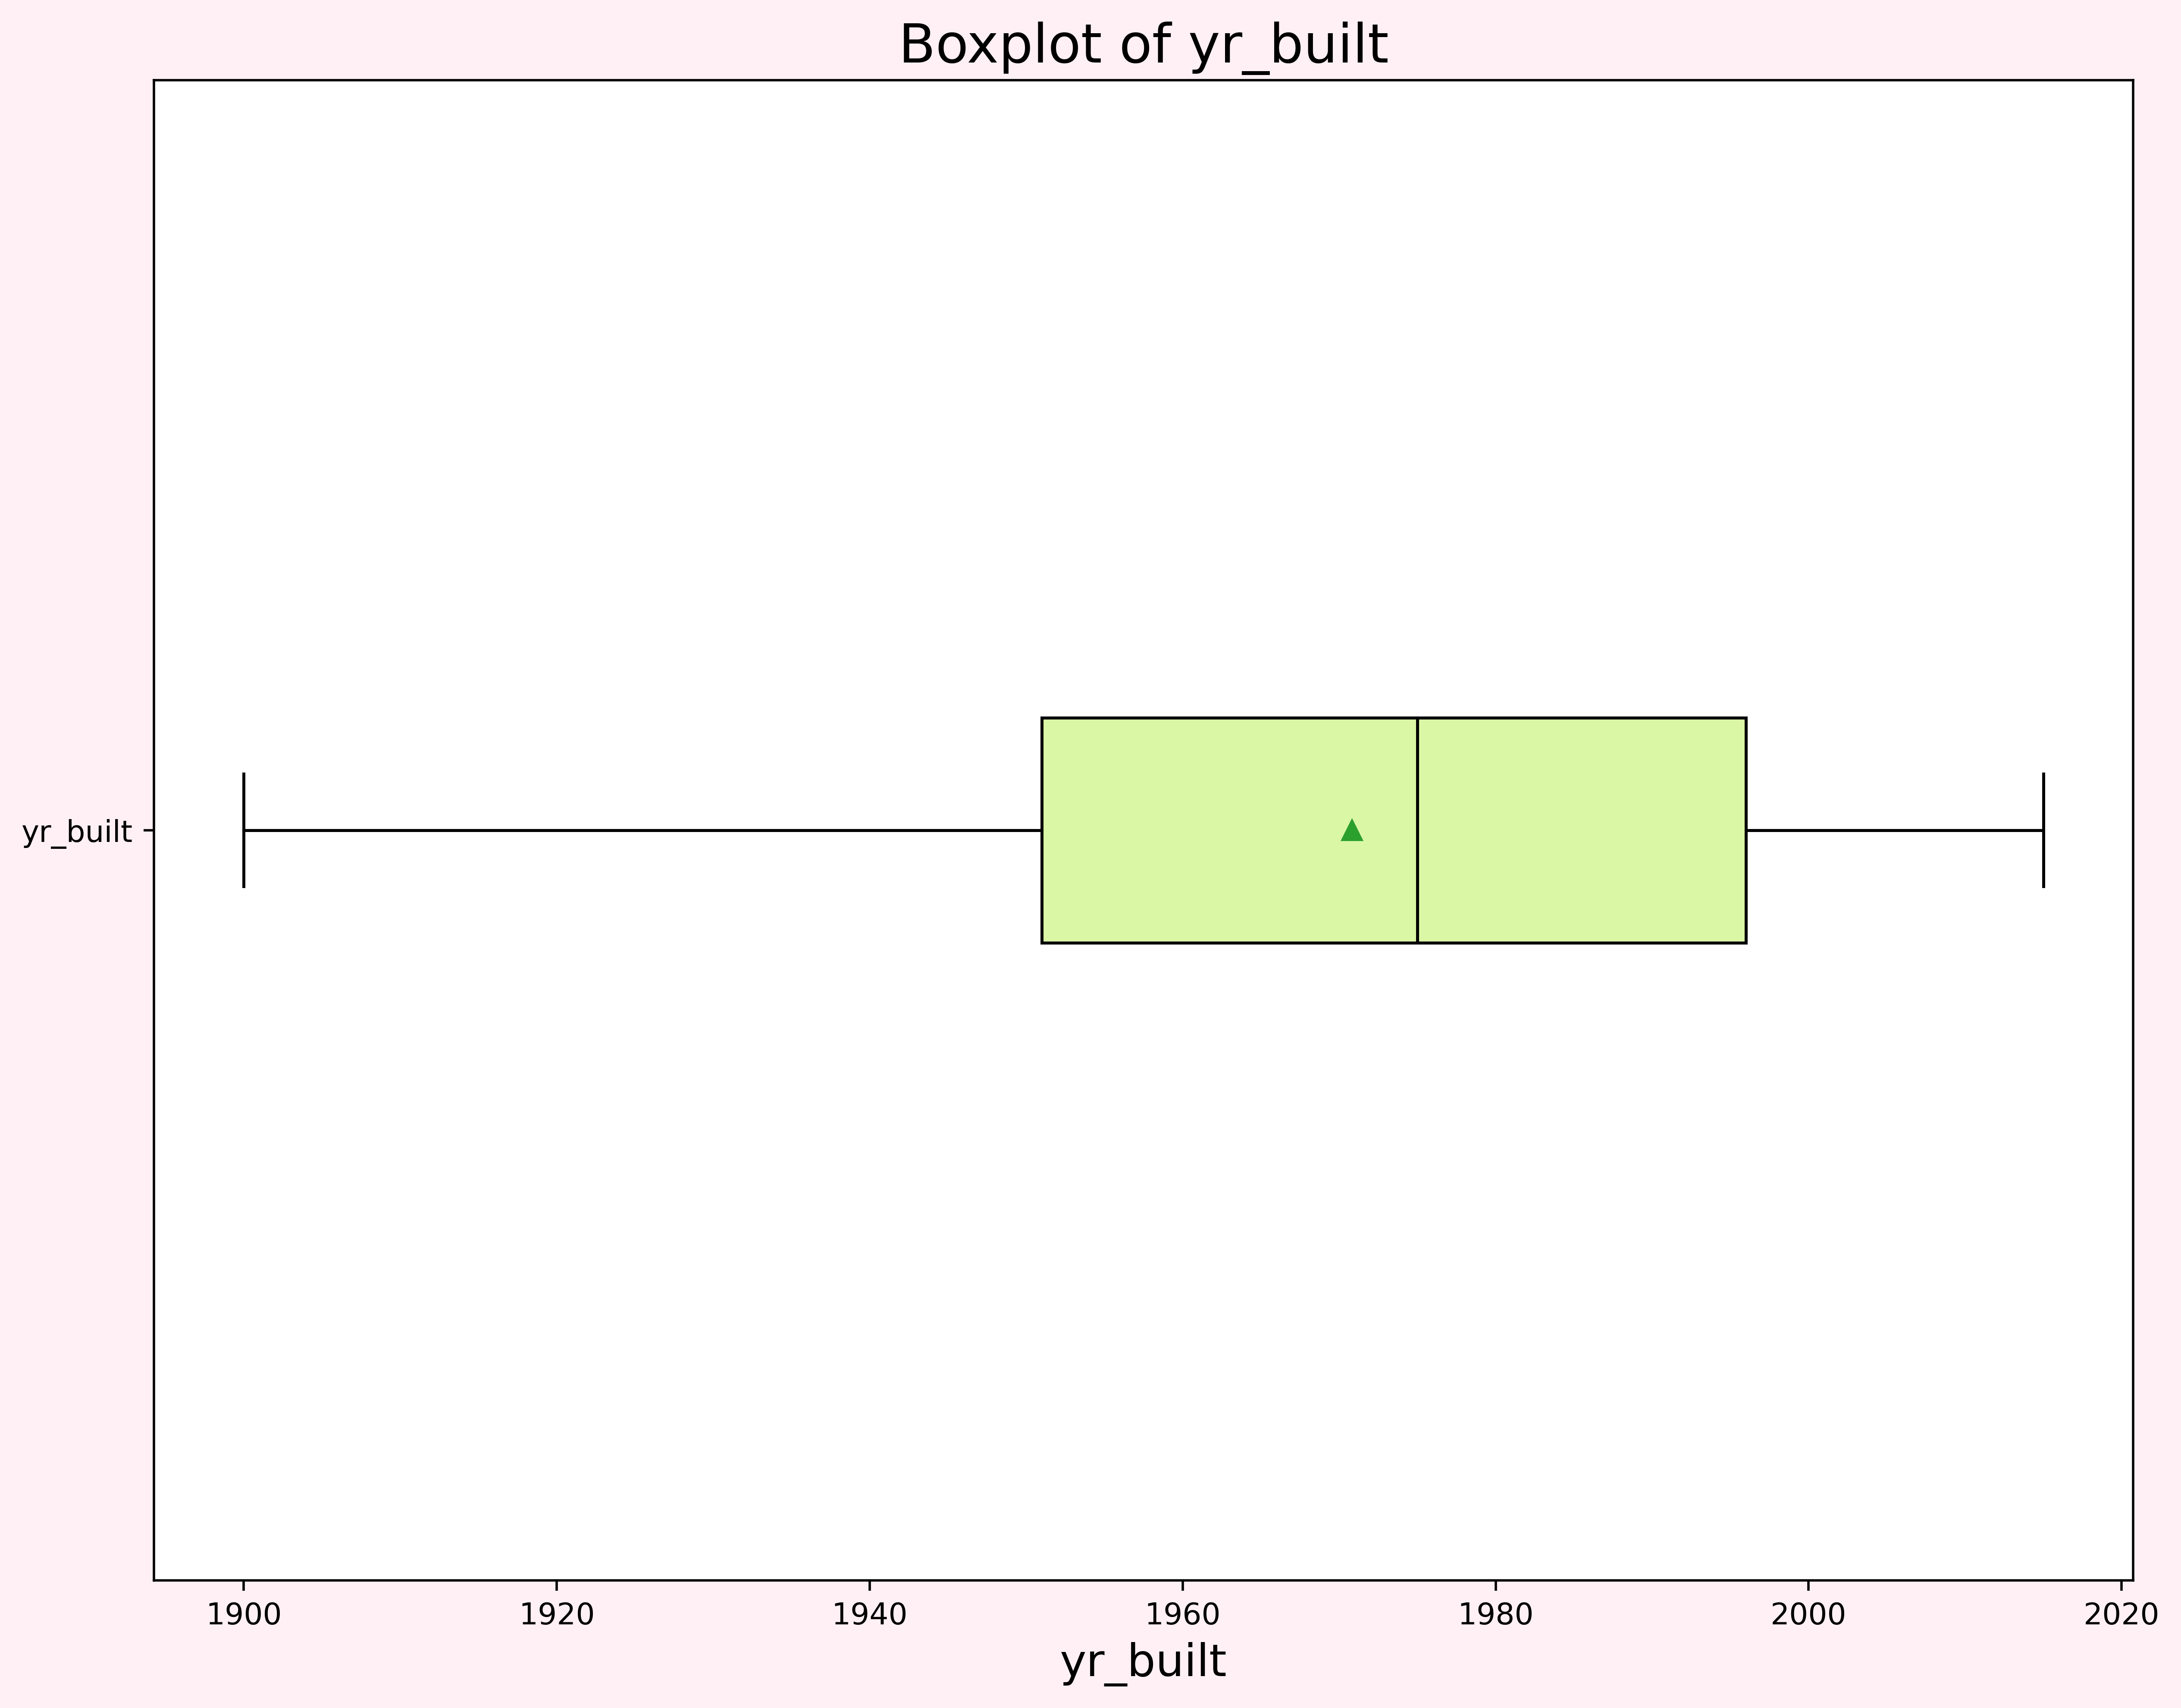

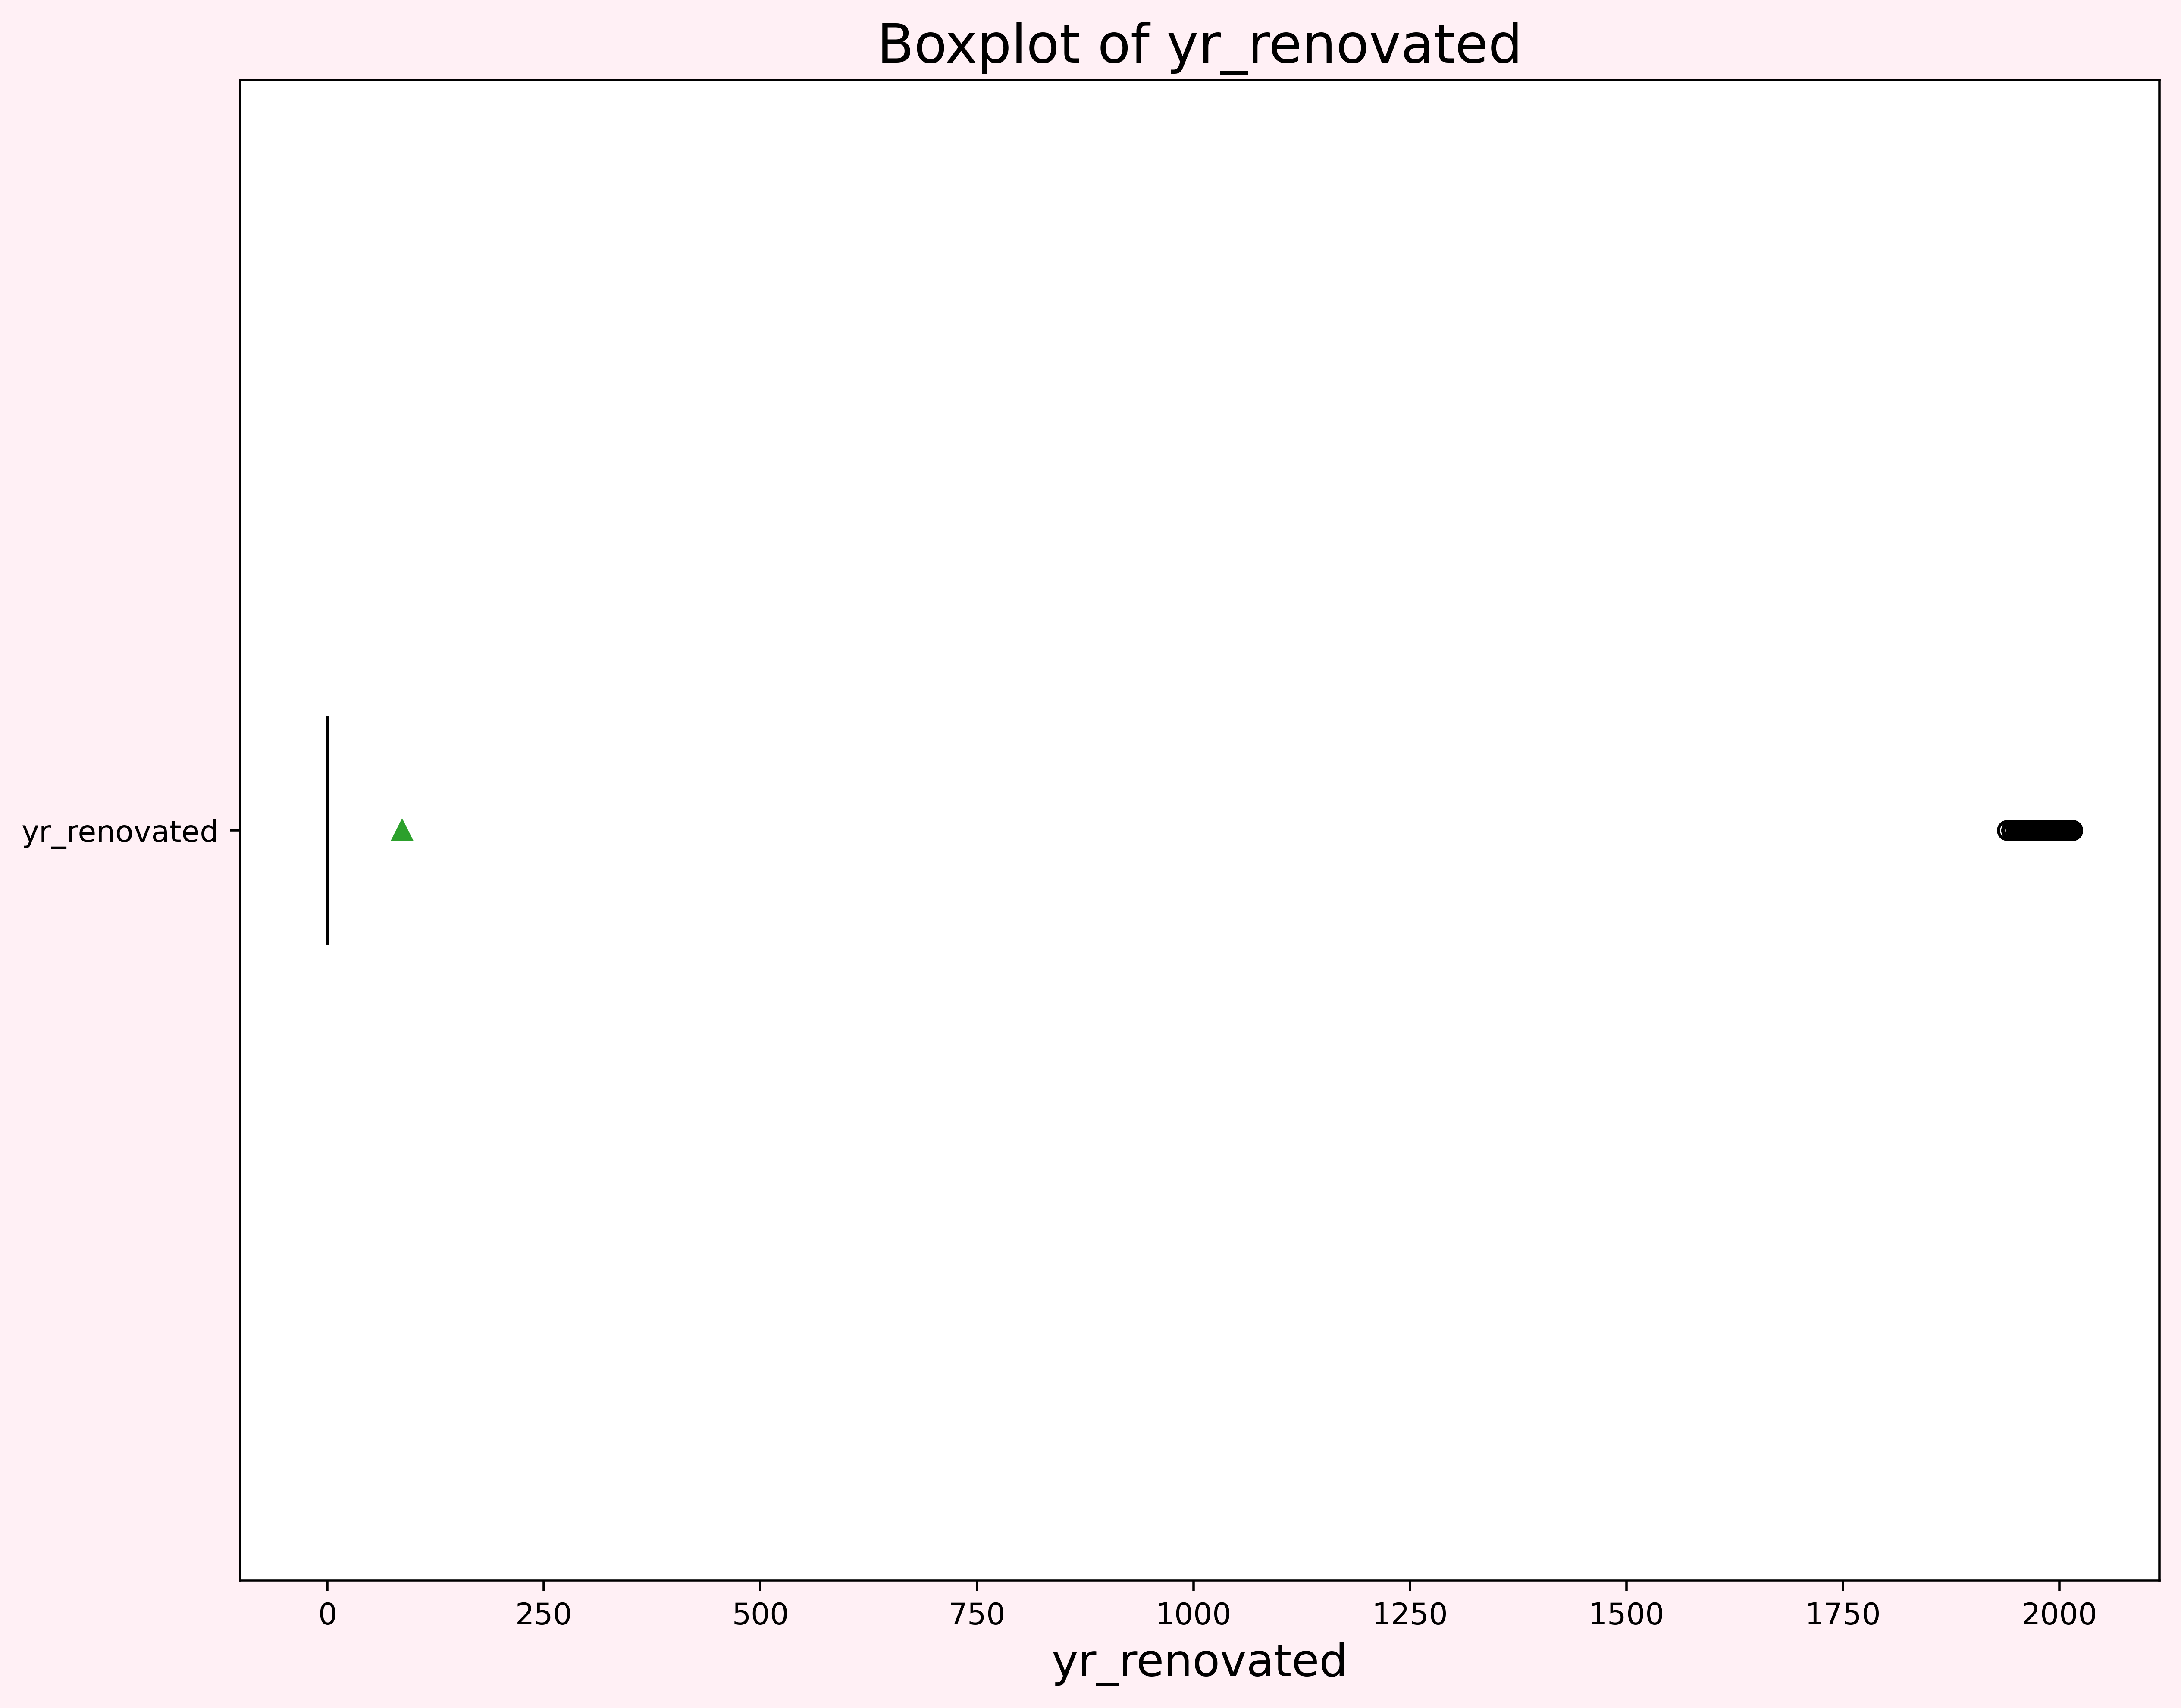

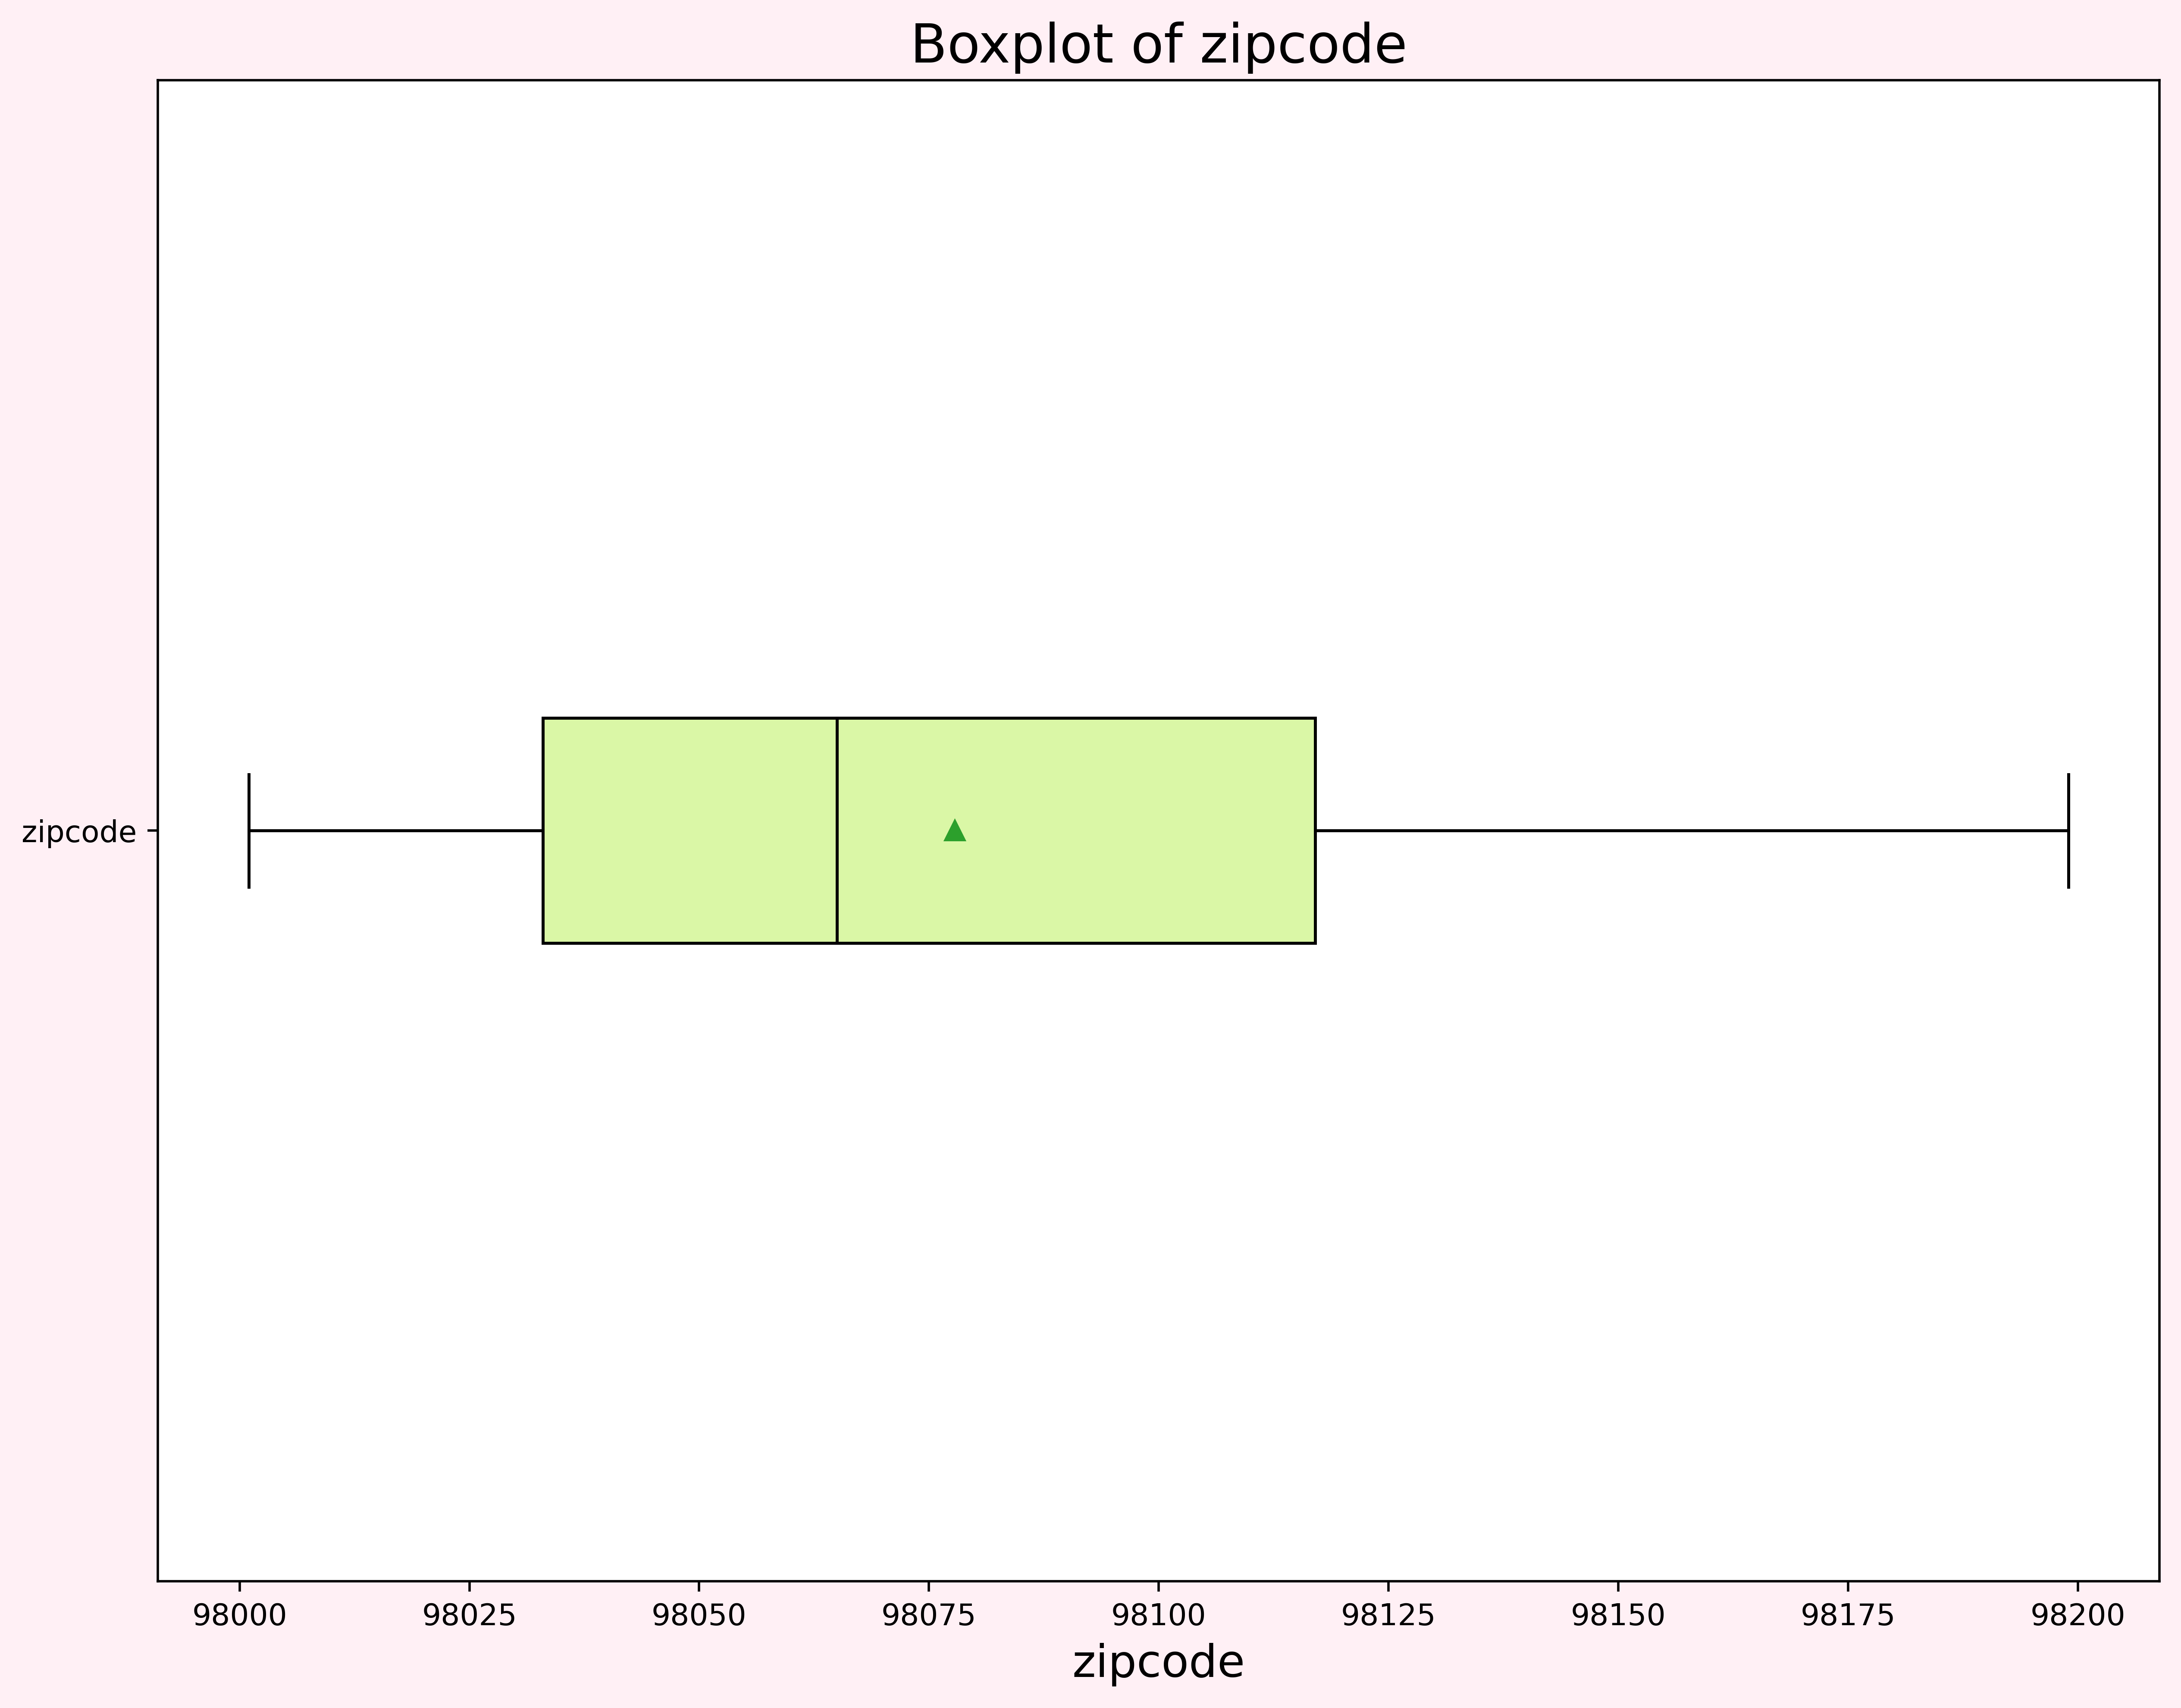

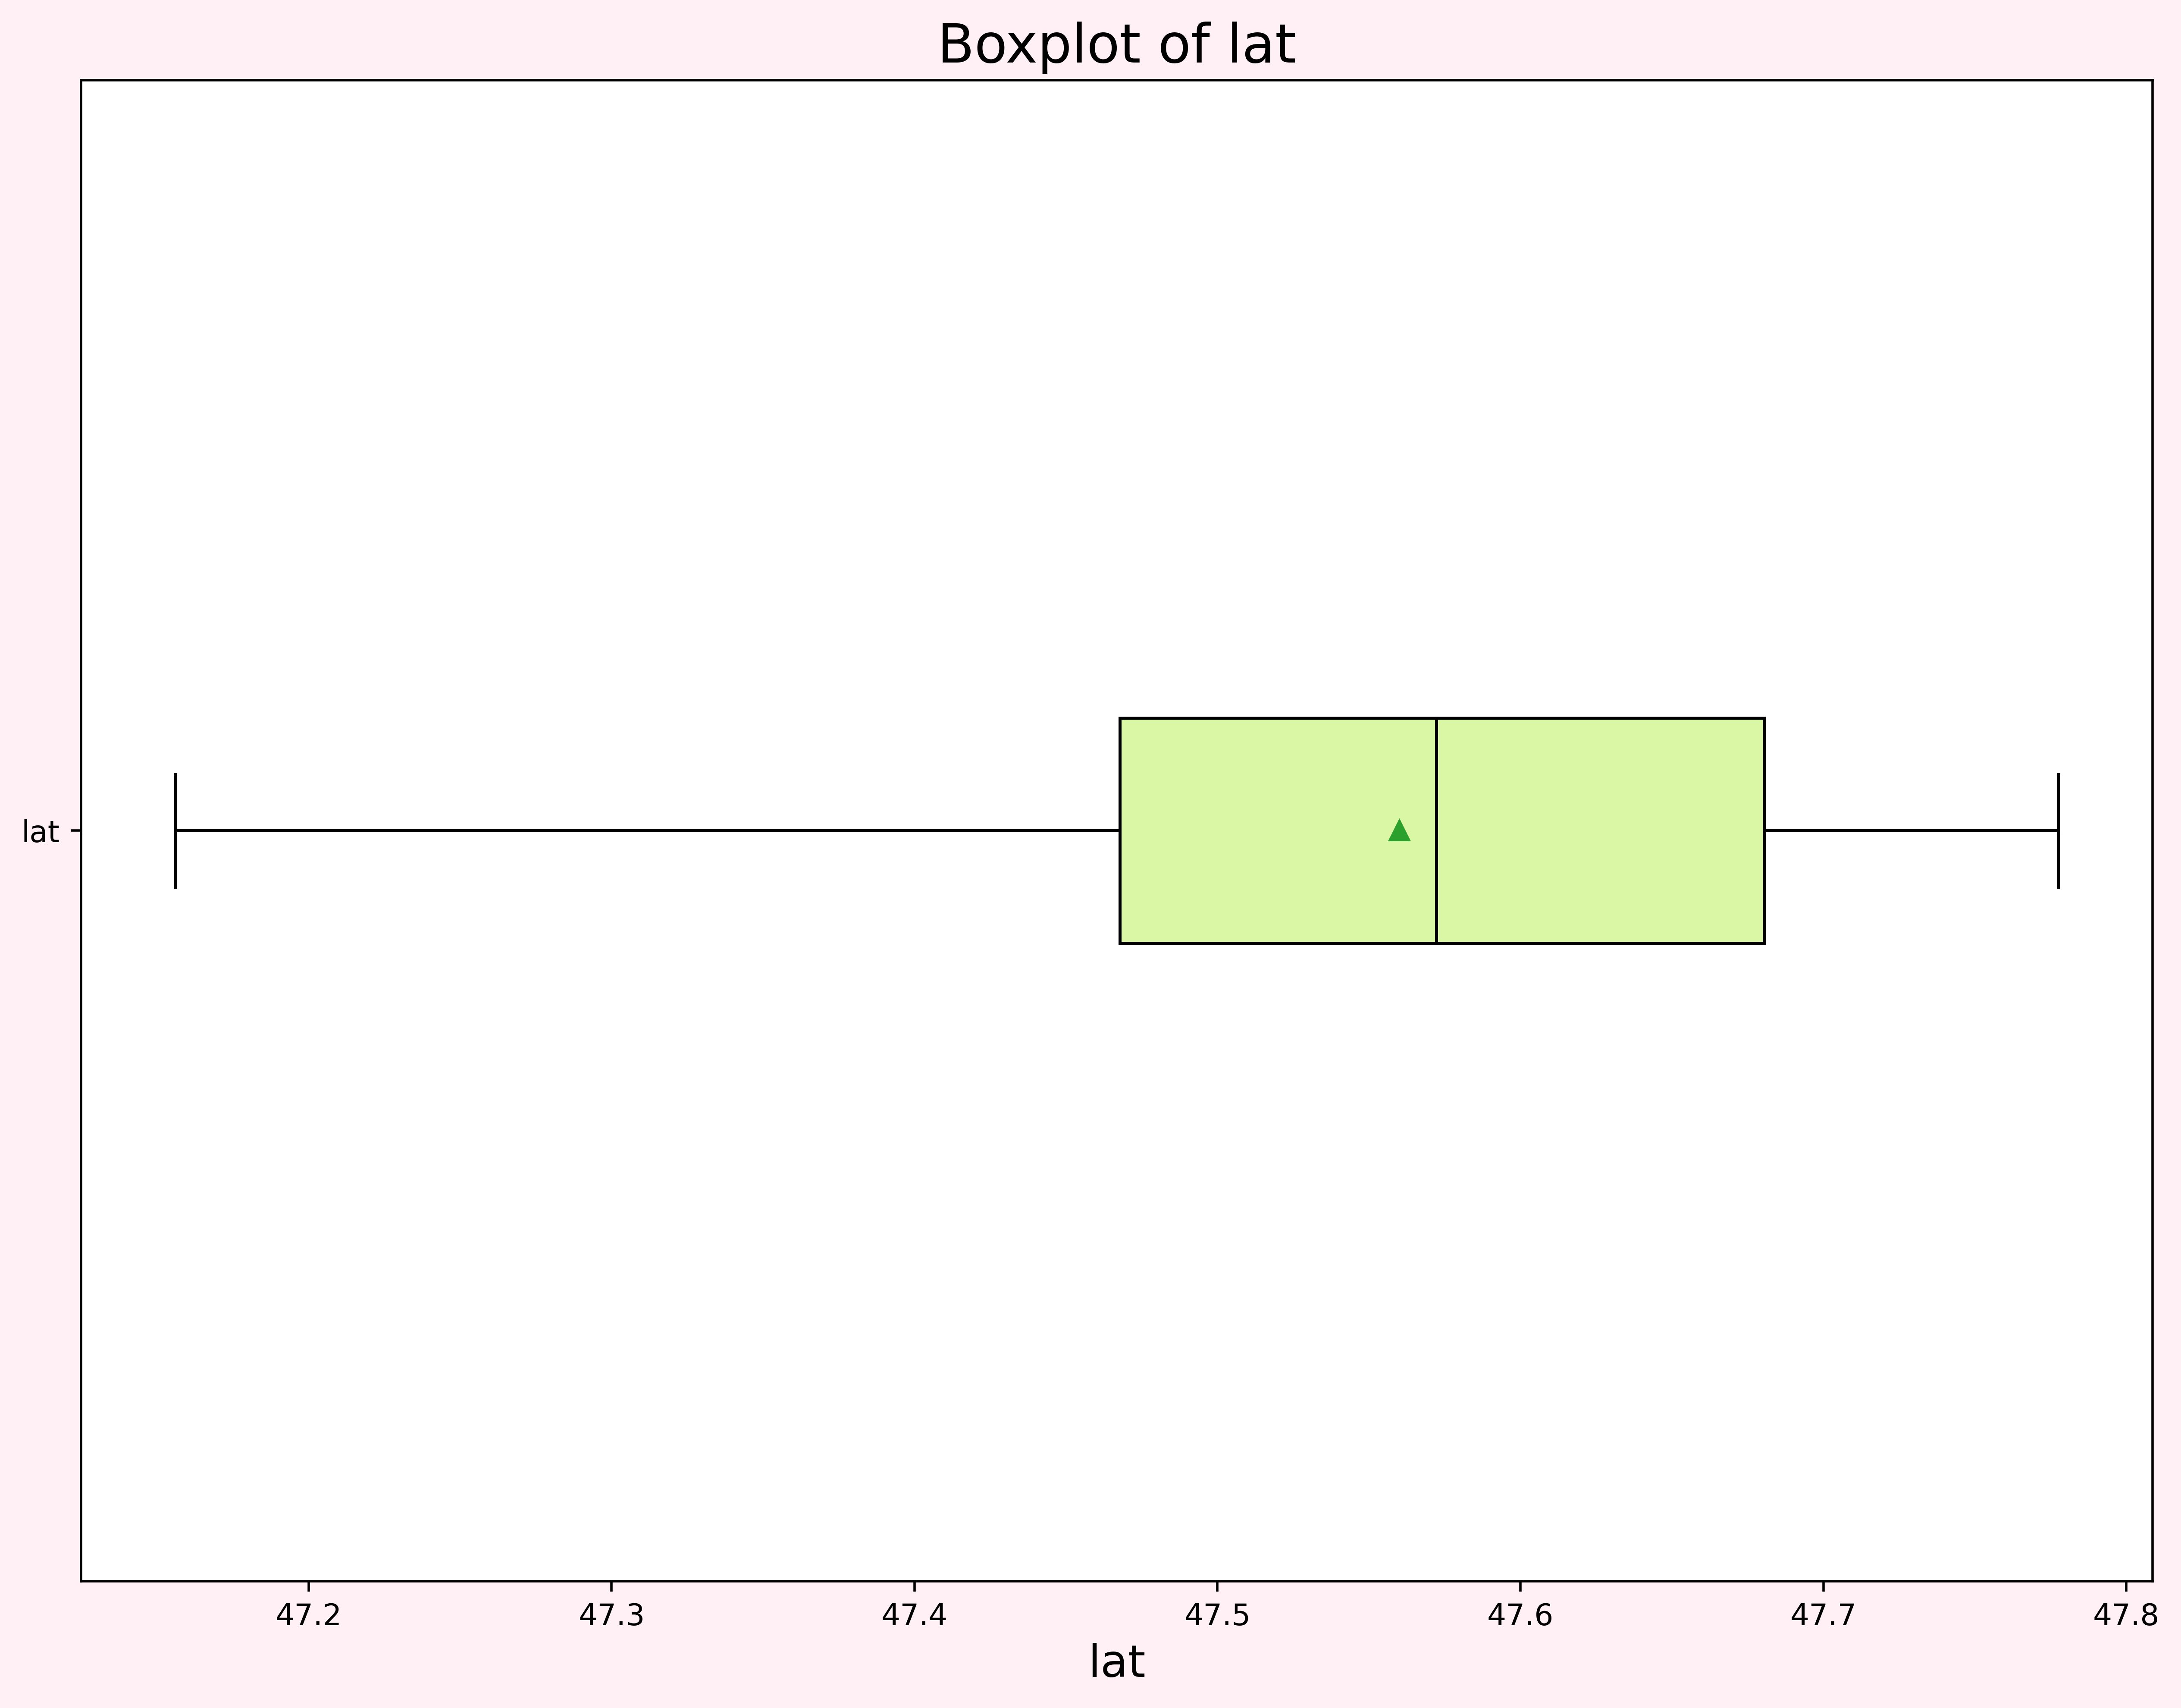

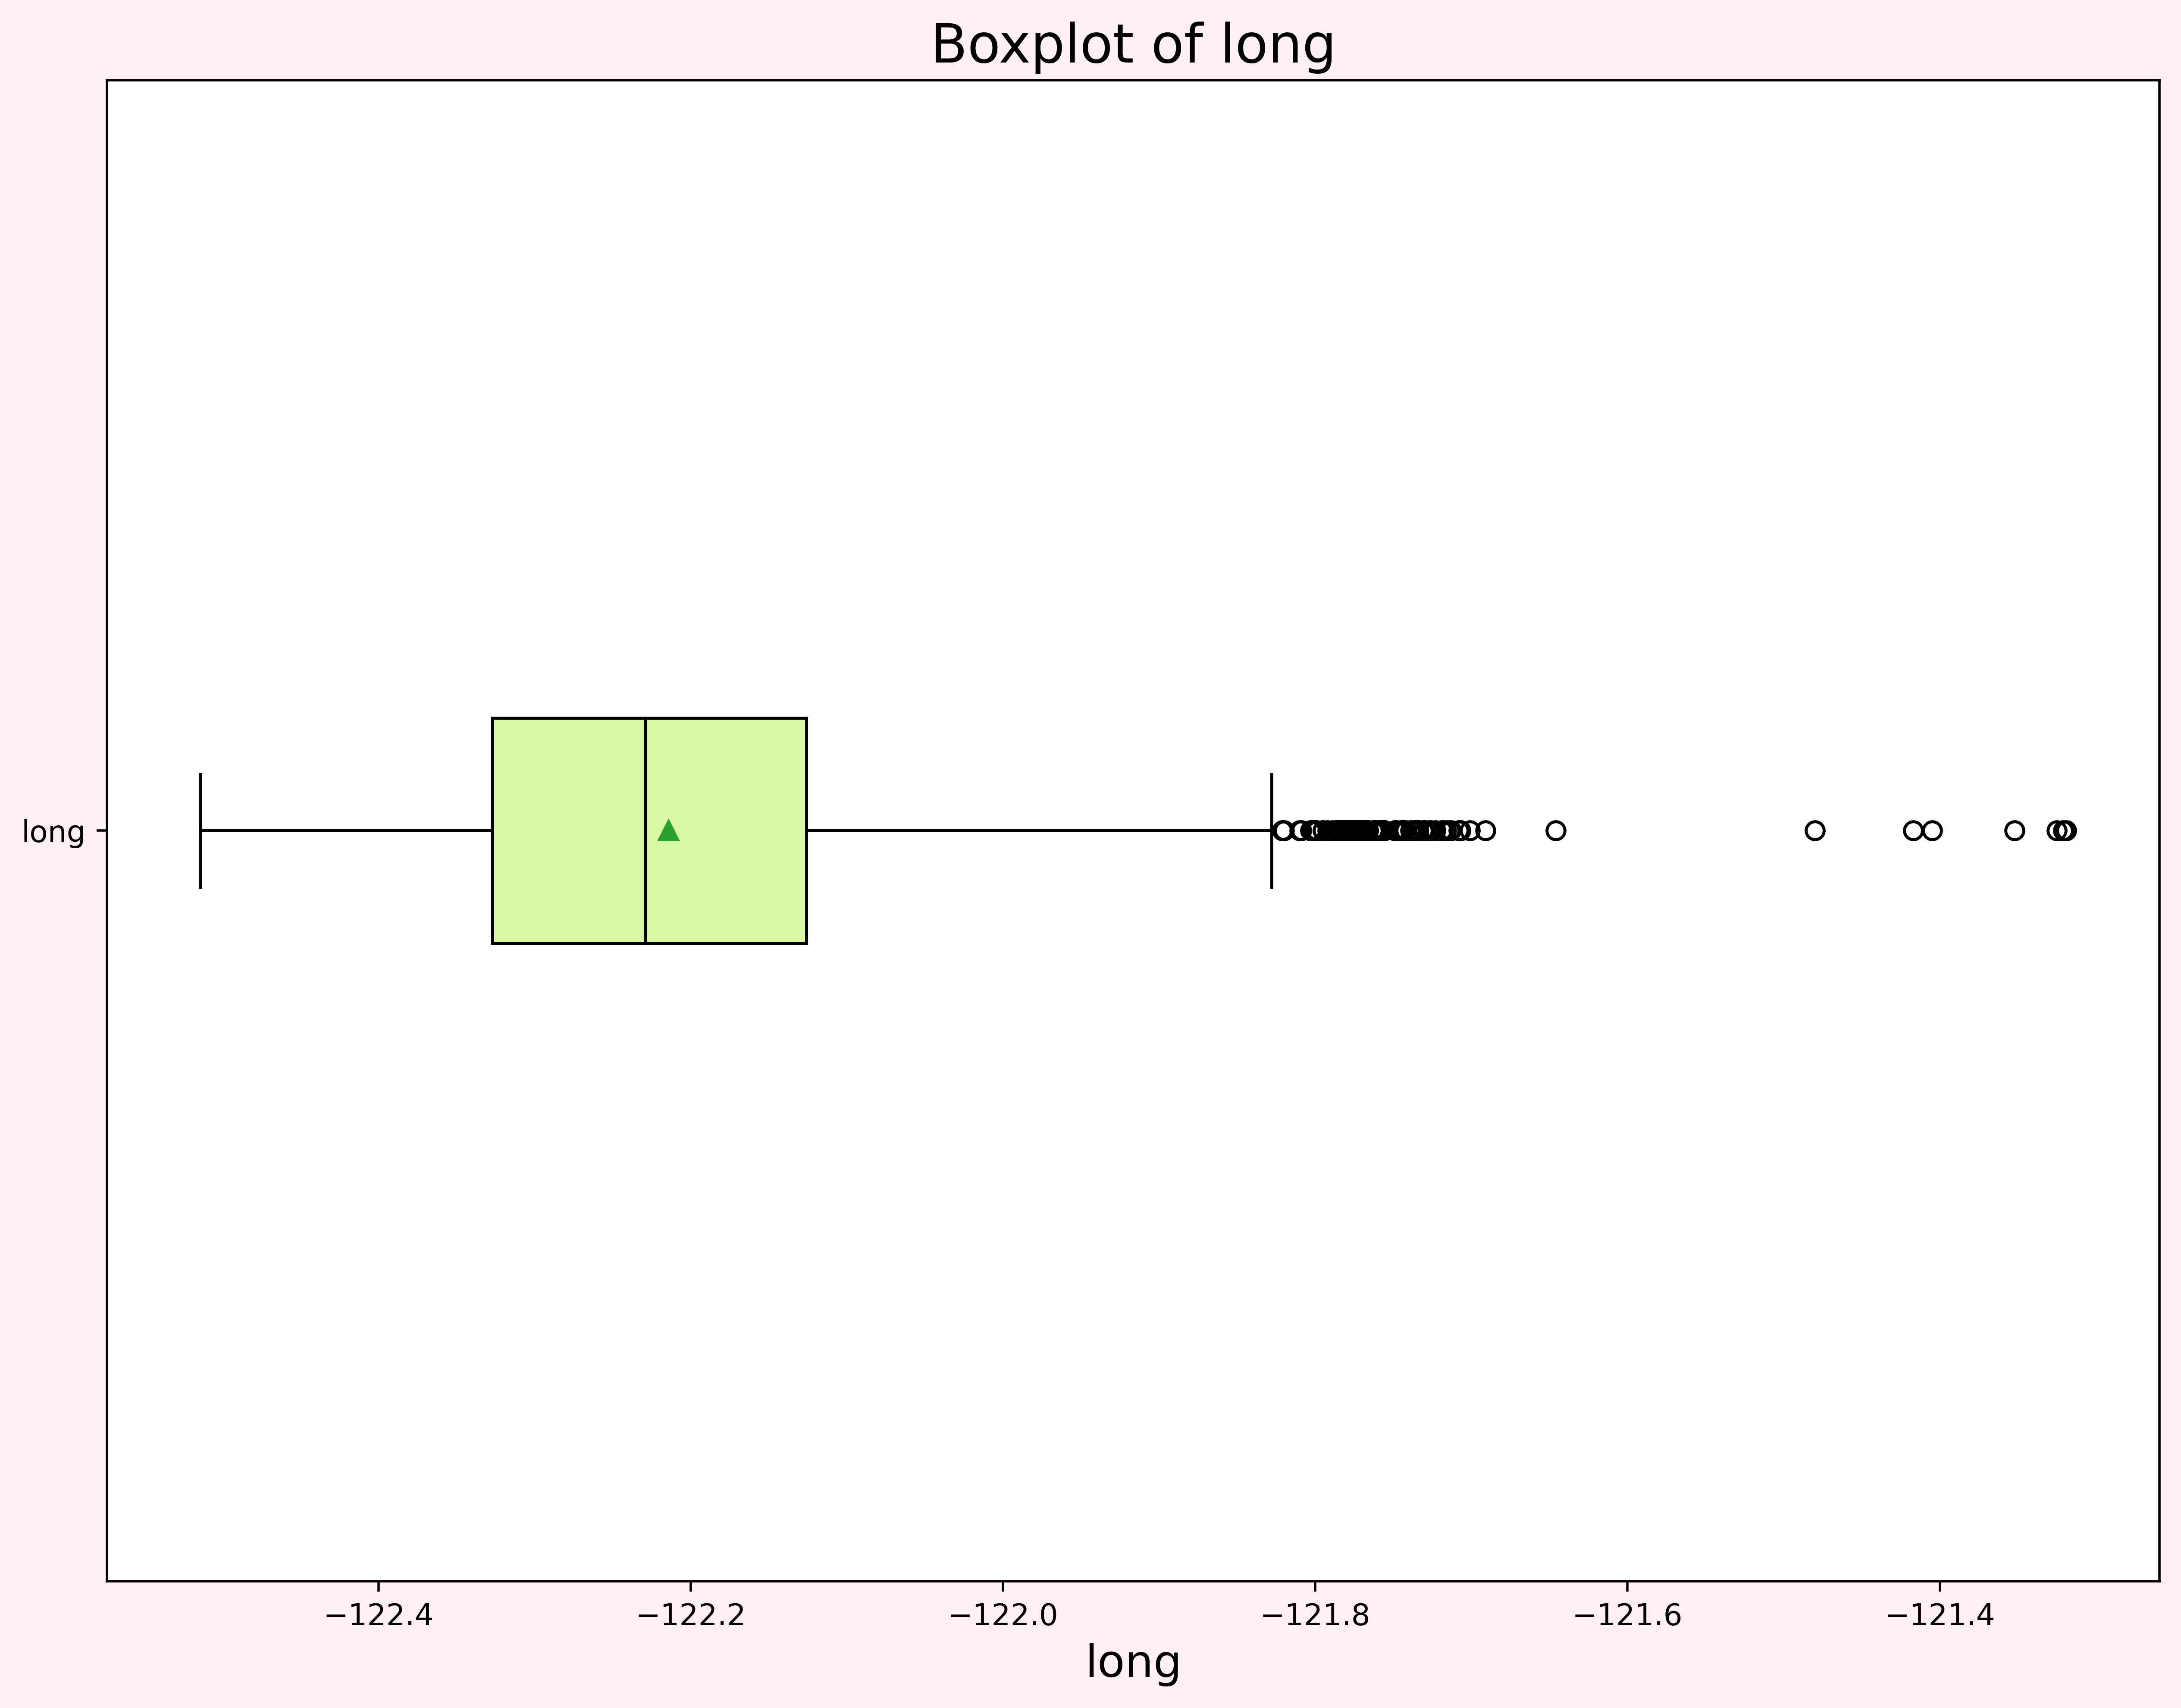

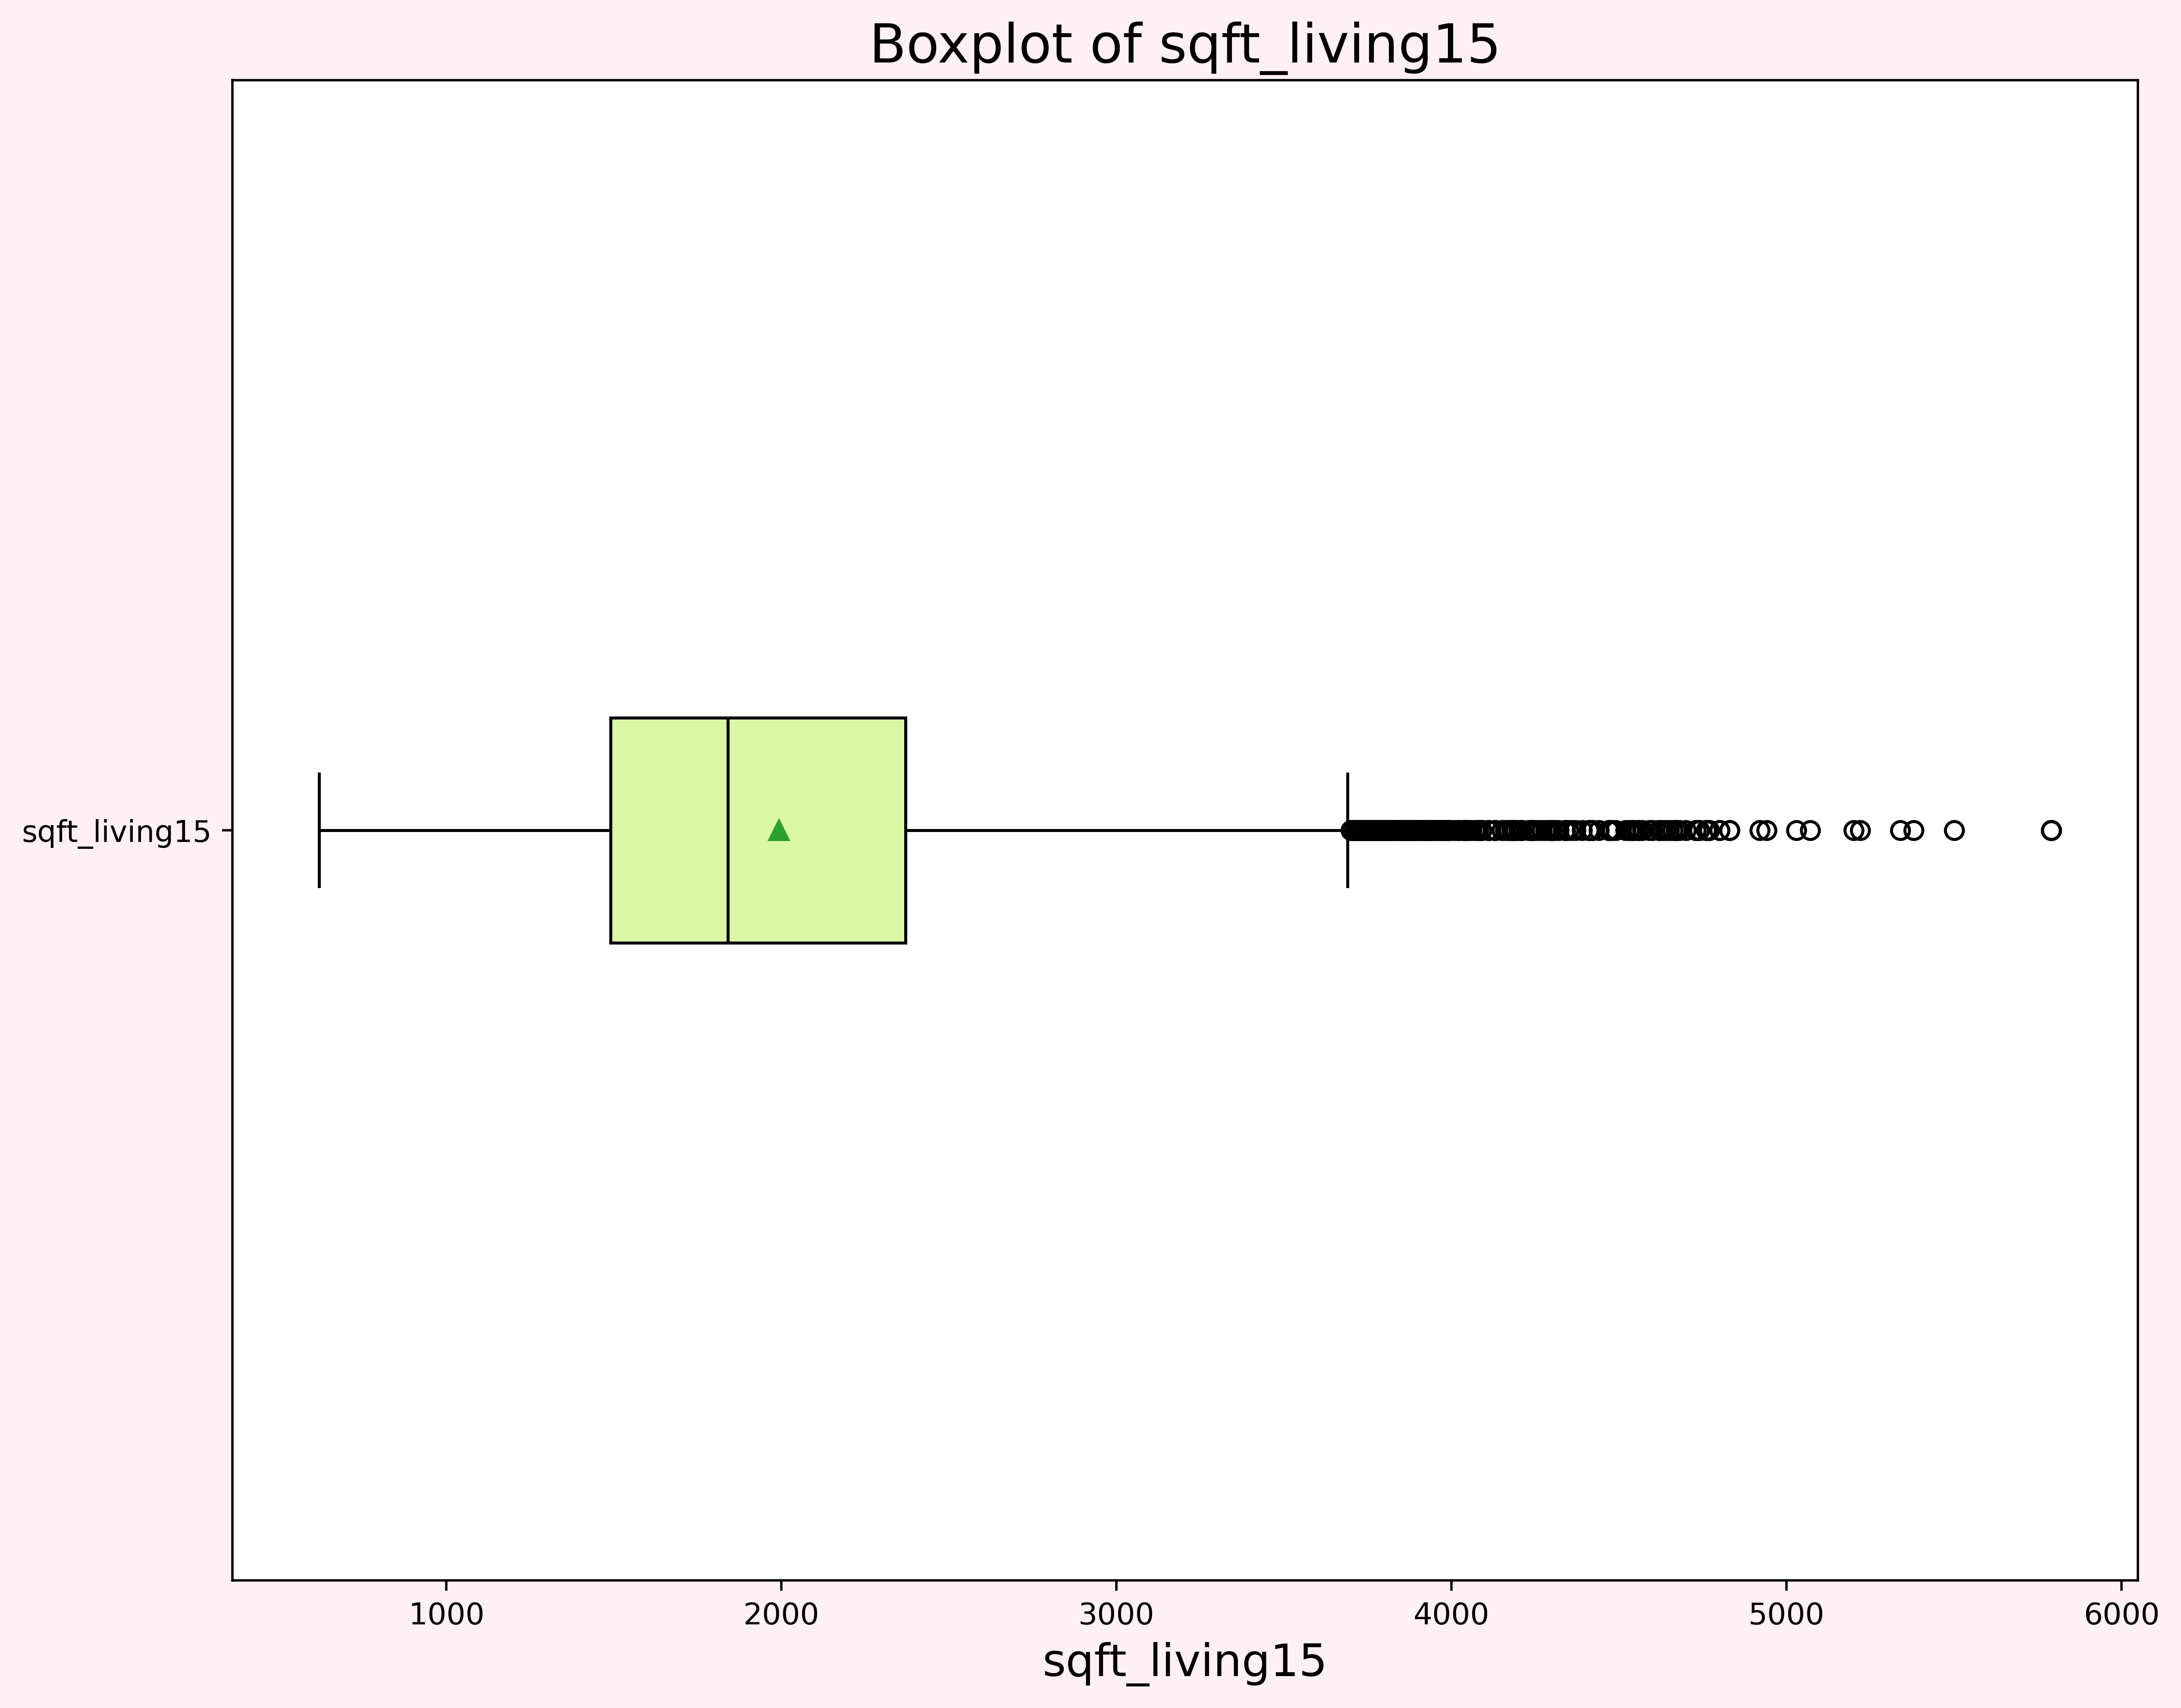

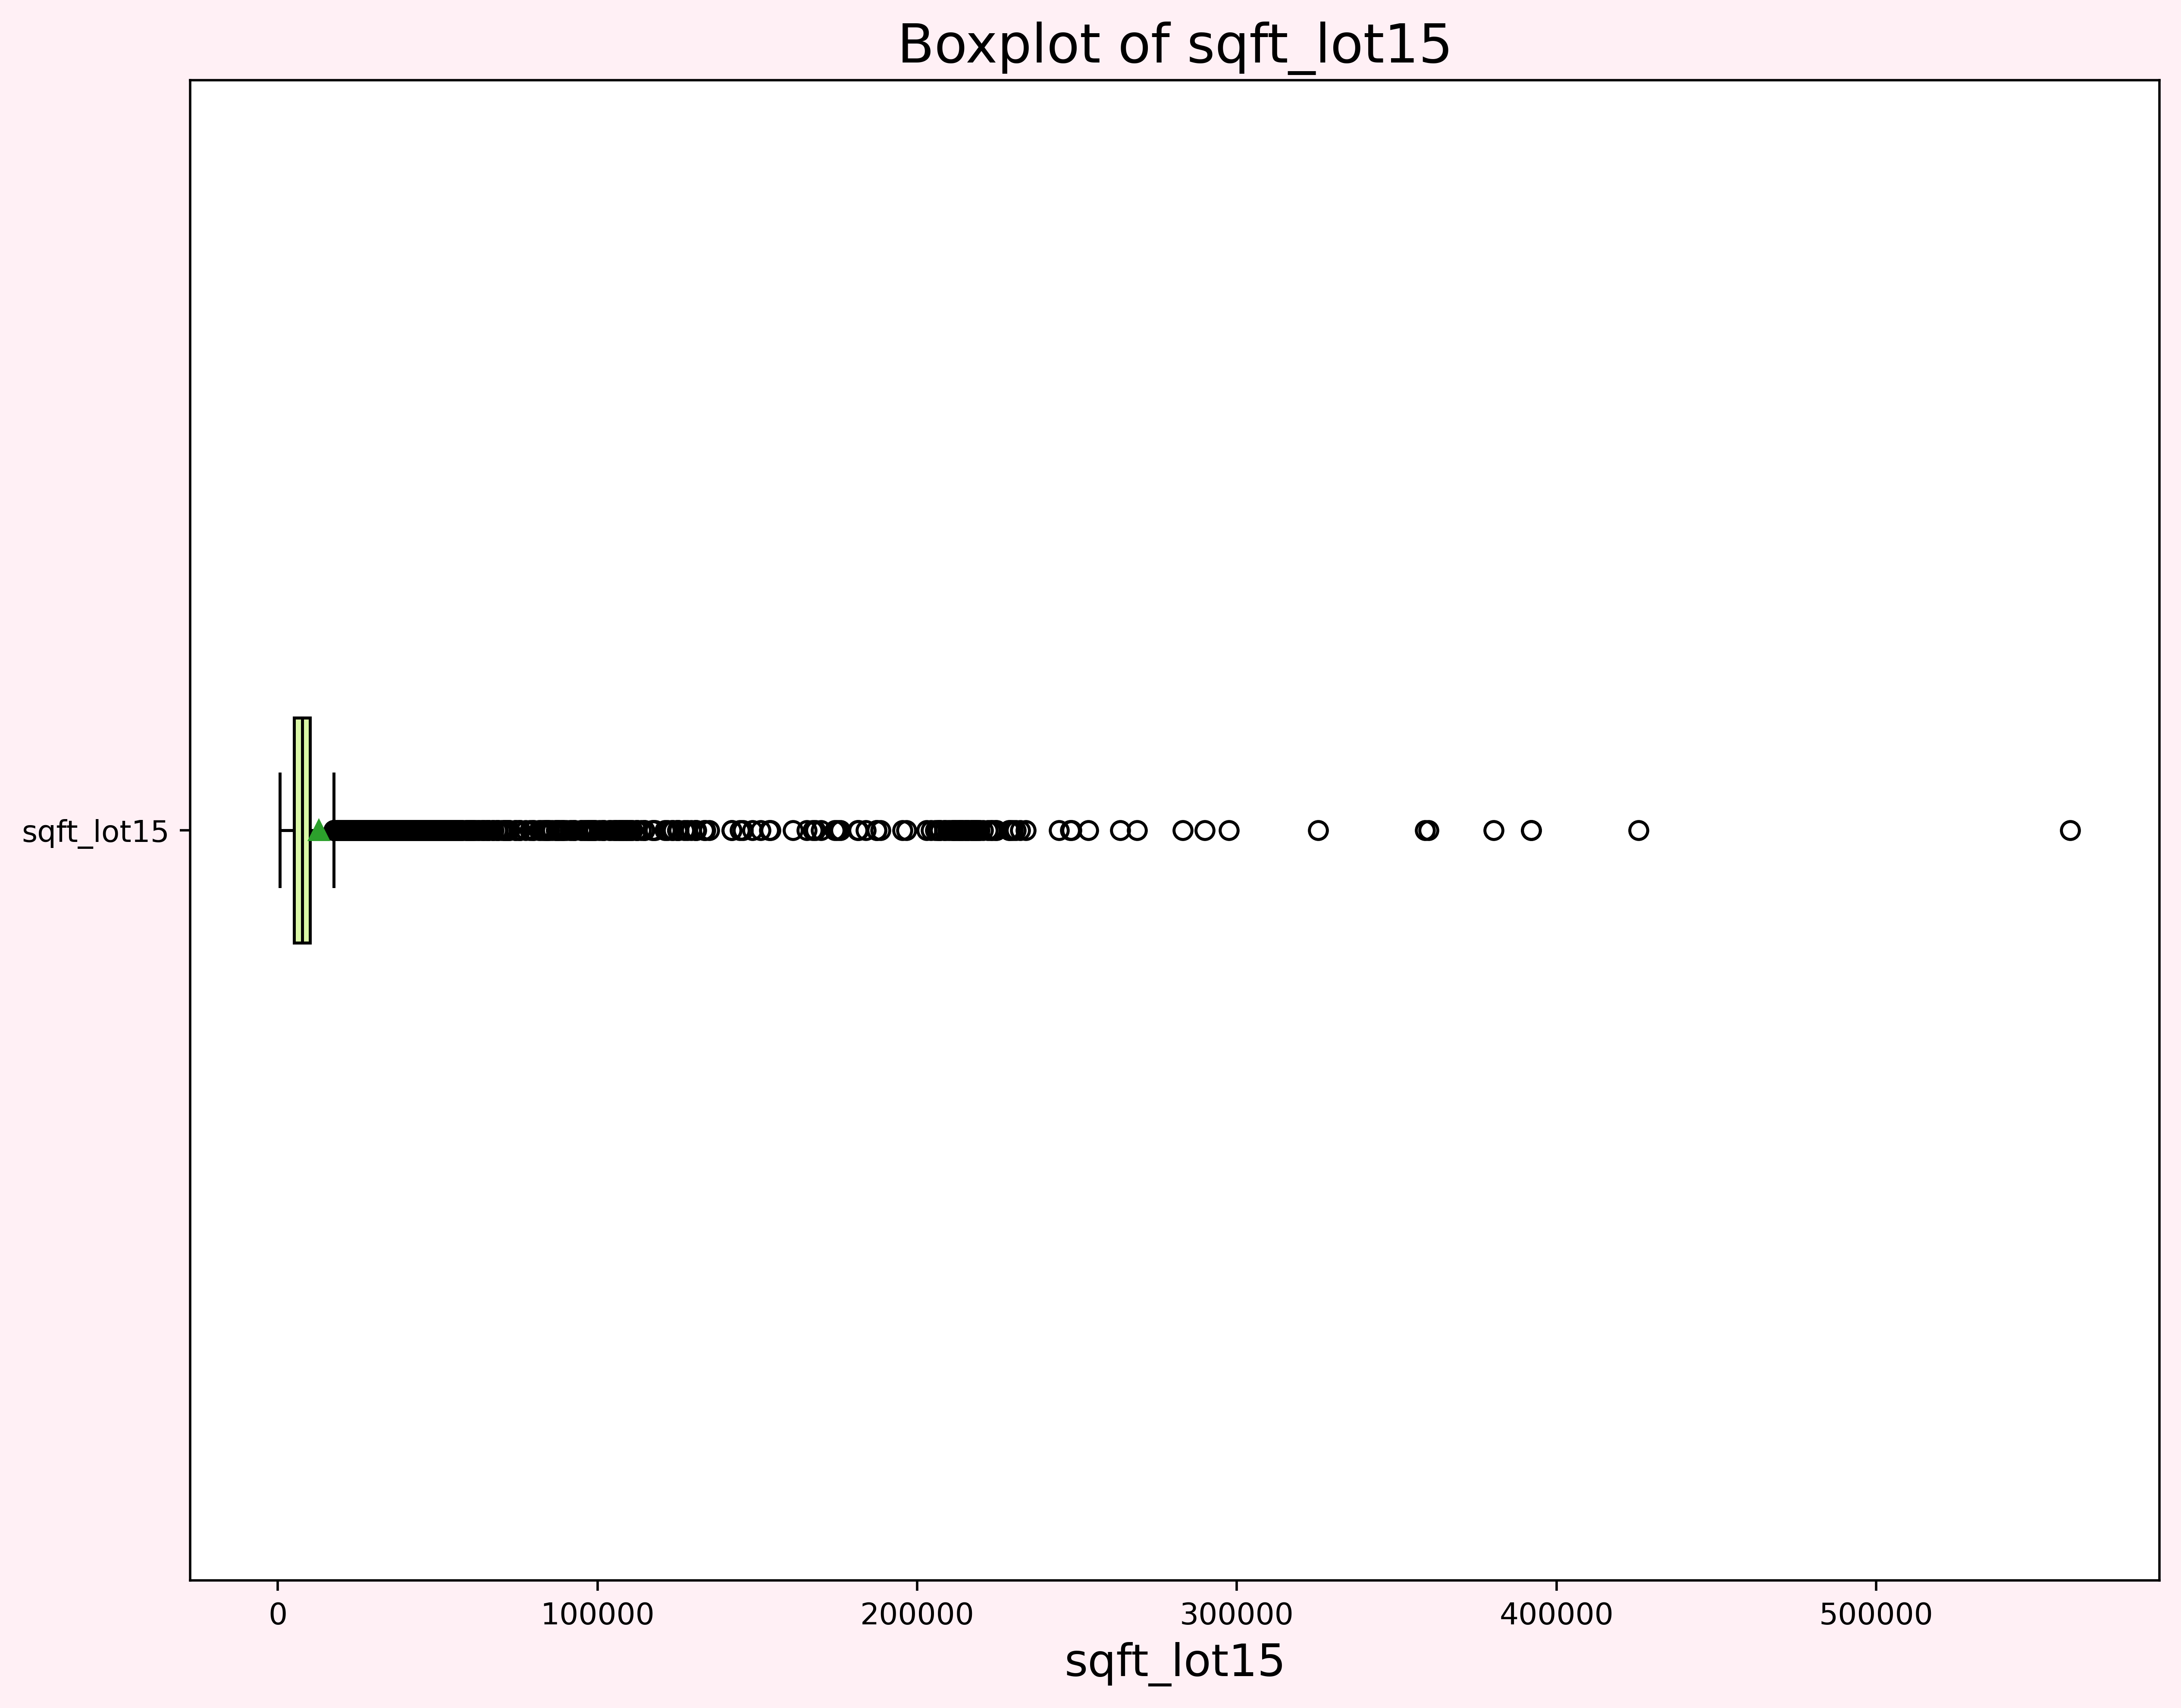

In [6]:
Graph(houses)  #function call to plot the graphss for univariate analysis

Text(0, 0.5, 'price')

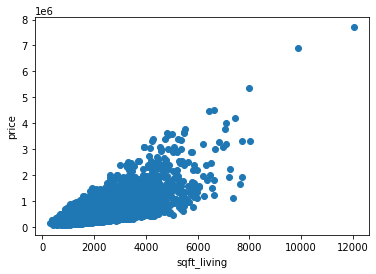

In [7]:
#Scatter plot for bivariate analysis of price and sqft living
x = houses.sqft_living
y = houses.price
plt.scatter(x,y)
plt.xlabel("sqft_living")
plt.ylabel("price")

### The above scatter matrix shows a linear trend in the spread  of  sqft living and the price

Text(0, 0.5, 'price')

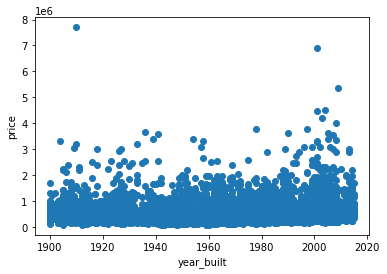

In [8]:
#scatter plot for  the bivariate analysis of year built and price
x = houses.yr_built
y = houses.price
plt.scatter(x,y)
plt.xlabel("year_built")
plt.ylabel("price")

### The above scatter plot shows that there is almost no relation with the year built and the  price

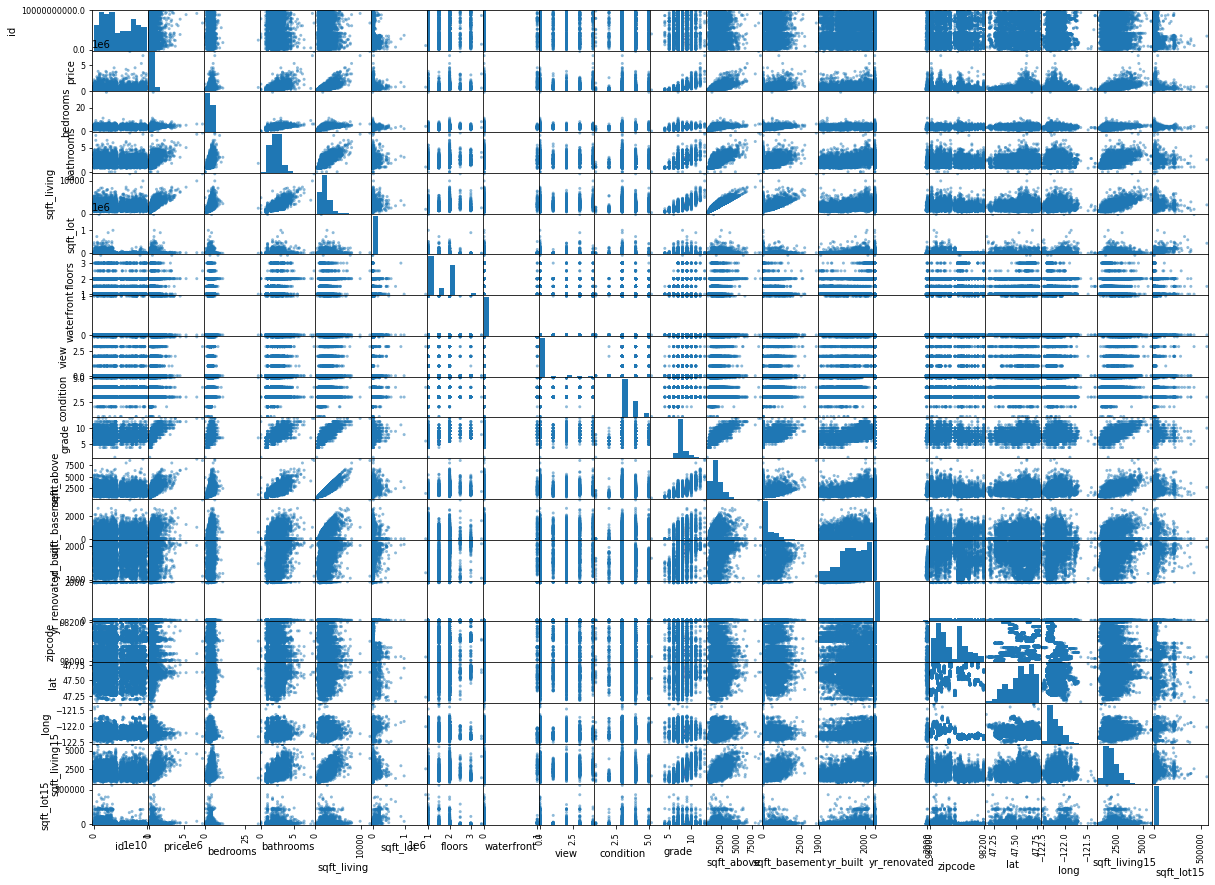

In [9]:
#plotting a scatter matrix for  all the  variables in pair
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
scatter_matrix(houses,alpha=0.5,figsize=(20,15),diagonal='hist')
plt.show()

### Based on the scatter matrix above we can see that price has a linear relation with respect to 
* bathrooms
* sqft_living
* view
* condition
* zipcode

## plotting the heat map to analysis the correlation between the variables

<AxesSubplot:>

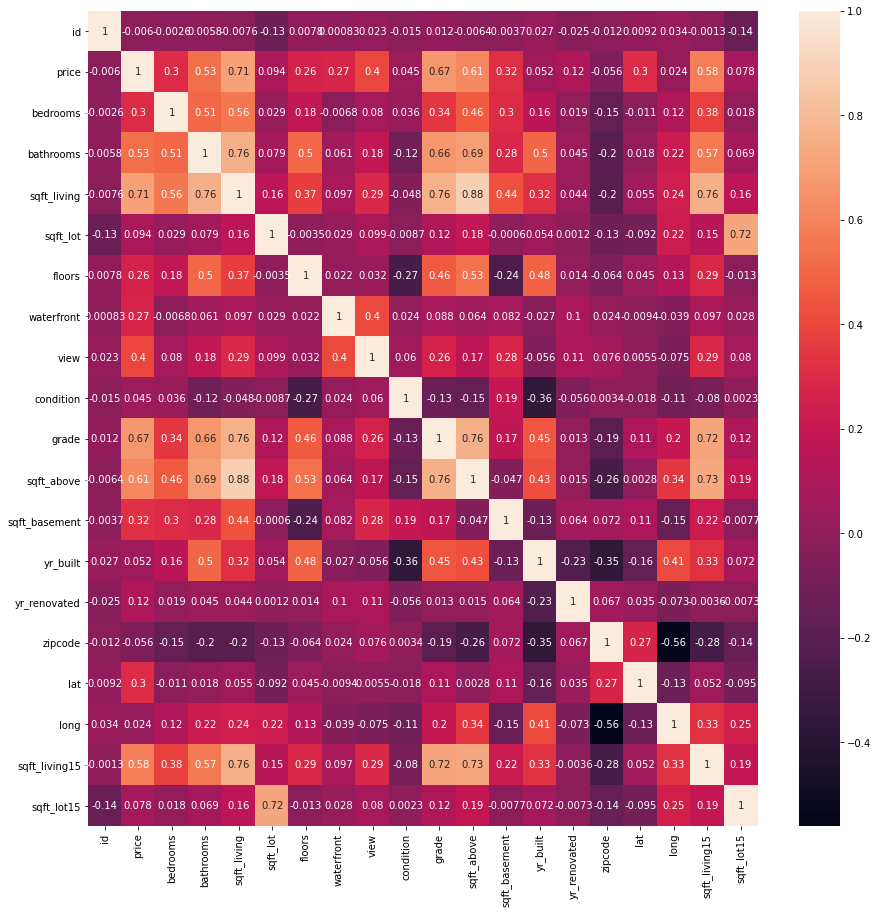

In [11]:

plt.figure(figsize=(15,15))
sns.heatmap(houses.corr(),annot=True)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

## Model1

In [13]:
x = houses[["sqft_living","grade","sqft_above"]]               #predictors
y = houses.price                                               #target varible
model1 = LinearRegression()                                    #linear regression fitting
model1.fit(x,y)                                                  
cv_score1 = cross_val_score(model1,x,y,cv=10,scoring='neg_root_mean_squared_error')   #cv score calculation
cv_score2 = cross_val_score(model1,x,y,cv=10,scoring="r2")

r1 = np.abs(cv_score1.mean())
print("RMSE",r1)         #print the rmse
r2= cv_score2.mean()
print("R2",r2)           #print r2

RMSE 256664.40747329695
R2 0.5350072220902851


sqft_living
1.425606471548795


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


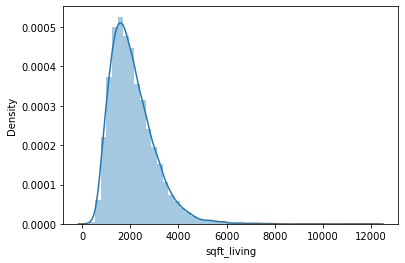

grade
0.767396421638523


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


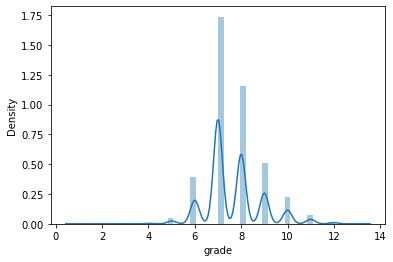

sqft_above
1.452525059541931


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


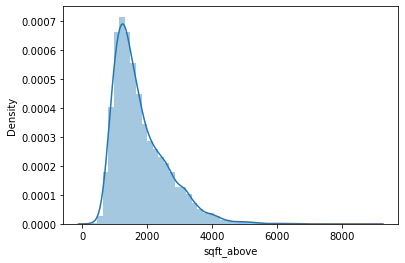

In [14]:
# checking for skewness
from scipy.stats  import skew
for i in x:
    print(i)
    print(skew(x[i]))
    
    plt.figure()
    sns.distplot(x[i])
    plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


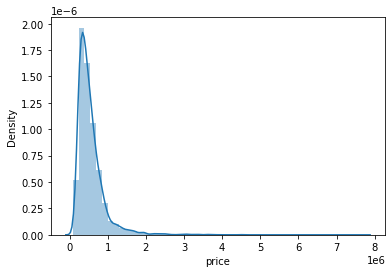

In [15]:
from scipy.stats  import skew
plt.figure()
sns.distplot(y)
plt.show()

## Model2

In [16]:
x1 = houses[["view","waterfront","sqft_basement","sqft_living15"]]     #prredictors
y1 = houses.price                                                      #target
model2 = LinearRegression()
model2.fit(x1,y1)                                                      #model fitting
cv_score11 = cross_val_score(model2,x1,y1,cv=10,scoring='neg_root_mean_squared_error')
cv_score22 = cross_val_score(model2,x1,y1,cv=10,scoring="r2")
r1 = np.abs(cv_score11.mean())

#print the values for rmse and r2
print("RMSE",r1)
r2= cv_score22.mean()
print("R2",r2)

RMSE 282841.3310450992
R2 0.4355616759777982


view
3.2850604705634927


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


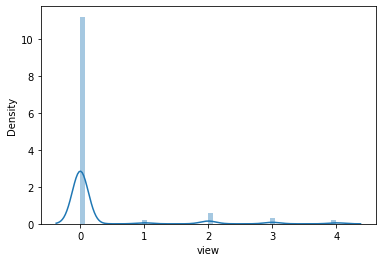

waterfront
10.772421144544763


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


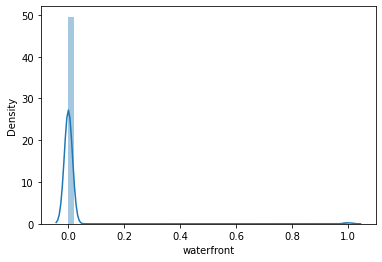

sqft_basement
1.4698571123521746


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


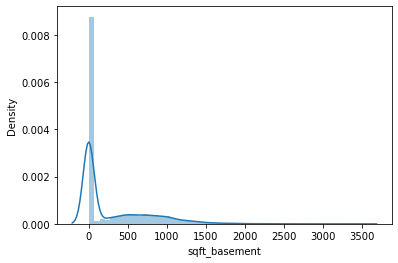

sqft_living15
1.1026639248966132


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


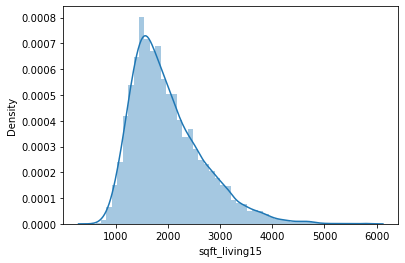

In [17]:
#check for skewness
from scipy.stats  import skew
for i in x1:
    print(i)
    print(skew(x1[i]))
    
    plt.figure()
    sns.distplot(x1[i])
    plt.show()

## Model3

In [18]:
x2 = houses[["sqft_living","sqft_lot15","grade","lat","bathrooms","long"]]     #prredictors
y2 = houses.price                                                              #traget
model3 = LinearRegression()                                                    #model fitting
model3.fit(x2,y2)
cv_score12 = cross_val_score(model3,x2,y2,cv=10,scoring='neg_root_mean_squared_error')
cv_score21 = cross_val_score(model3,x2,y2,cv=10,scoring="r2")
r1 = np.abs(cv_score12.mean())

#print the values for rmse and r2
print("RMSE",r1)
r2= cv_score21.mean()
print("R2",r2)

RMSE 236514.15003446085
R2 0.6058832440681405


sqft_living
1.425606471548795


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


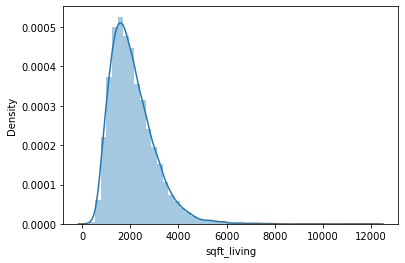

sqft_lot15
7.754311515565764


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


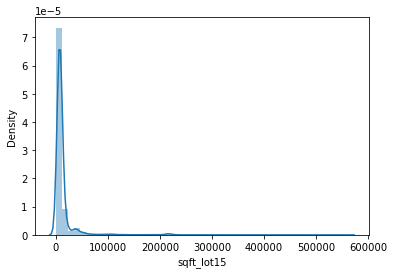

grade
0.767396421638523


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


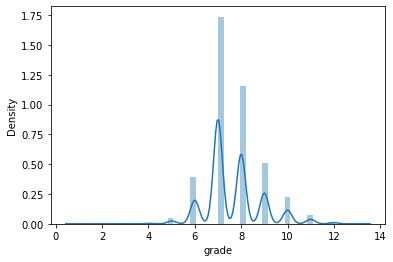

lat
-0.4787925983919769


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


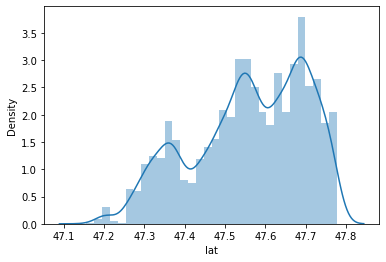

bathrooms
0.5577919339456945


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


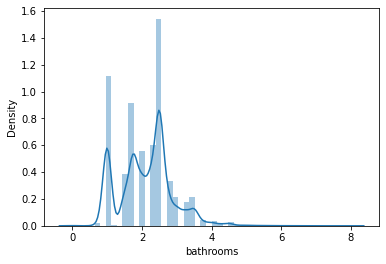

long
0.8765605719134018


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


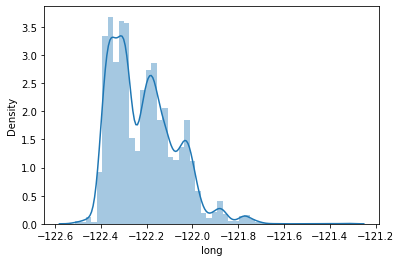

In [19]:
#check for skewness
from scipy.stats  import skew
for i in x2:
    print(i)
    print(skew(x2[i]))
    
    plt.figure()
    sns.distplot(x2[i])
    plt.show()

## Feature Transformation Log(x)

# Case1

In [20]:
x_1=np.log(houses[["sqft_lot","sqft_lot15"]])     
x_1

sqft_lot  sqft_lot15
0      8.517193    8.517193
1     11.532042   11.532042
2      8.699515    8.699515
3      9.898525    9.449121
4      9.177817    9.230927
...         ...         ...
9756   7.026427    7.114769
9757   8.703341    8.703341
9758   8.881836    8.732305
9759   7.207860    7.604396
9760   6.981006    7.213032

[9761 rows x 2 columns]

# Case2

In [23]:
x_11=np.log(houses[["sqft_lot"]]) 
x_11

sqft_lot
0      8.517193
1     11.532042
2      8.699515
3      9.898525
4      9.177817
...         ...
9756   7.026427
9757   8.703341
9758   8.881836
9759   7.207860
9760   6.981006

[9761 rows x 1 columns]

# Case3

In [25]:
x_10=np.log(houses[["sqft_basement"]]+1)     #note it important case since we have infinite valuess  we need to add log
x_10

sqft_basement
0          6.814543
1          7.333676
2          5.707110
3          0.000000
4          0.000000
...             ...
9756       0.000000
9757       0.000000
9758       6.814543
9759       0.000000
9760       0.000000

[9761 rows x 1 columns]

## Transforming an existing feature to a new feature

In [7]:
houses["date"] = pd.to_datetime(houses["date"])    

In [8]:
houses.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [9]:
houses["year"] = houses["date"].dt.year    #split the date column into year

In [10]:
houses.head()

id       date      price  bedrooms  bathrooms  sqft_living  \
0  2487200875 2014-12-09   604000.0         4       3.00         1960   
1  7237550310 2014-05-12  1225000.0         4       4.50         5420   
2  9212900260 2014-05-27   468000.0         2       1.00         1160   
3   114101516 2014-05-28   310000.0         3       1.00         1430   
4  6054650070 2014-10-07   400000.0         3       1.75         1370   

   sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
0      5000     1.0           0     0  ...        1050            910   
1    101930     1.0           0     0  ...        3890           1530   
2      6000     1.0           0     0  ...         860            300   
3     19901     1.5           0     0  ...        1430              0   
4      9680     1.0           0     0  ...        1370              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1965             0    98136  47.5208 -122.393           1360   
1      2001             0    98053  47.6561 -122.005           4760   
2      1942             0    98115  47.6900 -122.292           1330   
3      1927             0    98028  47.7558 -122.229           1780   
4      1977             0    98074  47.6127 -122.045           1370   

   sqft_lot15  year  
0        5000  2014  
1      101930  2014  
2        6000  2014  
3       12697  2014  
4       10208  2014  

[5 rows x 22 columns]

In [11]:
houses["age"]= houses['year']-houses['yr_built']               #new column age is created
houses.head()

id       date      price  bedrooms  bathrooms  sqft_living  \
0  2487200875 2014-12-09   604000.0         4       3.00         1960   
1  7237550310 2014-05-12  1225000.0         4       4.50         5420   
2  9212900260 2014-05-27   468000.0         2       1.00         1160   
3   114101516 2014-05-28   310000.0         3       1.00         1430   
4  6054650070 2014-10-07   400000.0         3       1.75         1370   

   sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
0      5000     1.0           0     0  ...            910      1965   
1    101930     1.0           0     0  ...           1530      2001   
2      6000     1.0           0     0  ...            300      1942   
3     19901     1.5           0     0  ...              0      1927   
4      9680     1.0           0     0  ...              0      1977   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  year  \
0             0    98136  47.5208 -122.393           1360        5000  2014   
1             0    98053  47.6561 -122.005           4760      101930  2014   
2             0    98115  47.6900 -122.292           1330        6000  2014   
3             0    98028  47.7558 -122.229           1780       12697  2014   
4             0    98074  47.6127 -122.045           1370       10208  2014   

   age  
0   49  
1   13  
2   72  
3   87  
4   37  

[5 rows x 23 columns]

# fitting the model with new column age

In [ ]:
x = houses[["sqft_living","grade","sqft_above","age"]]             #prredictors
y = houses.price
model1 = LinearRegression()
model1.fit(x,y)
cv_score1 = cross_val_score(model1,x,y,cv=10,scoring='neg_root_mean_squared_error')
cv_score2 = cross_val_score(model1,x,y,cv=10,scoring="r2")

r1 = np.abs(cv_score1.mean())
print("RMSE",r1)
r2= cv_score2.mean()
print("R2",r2)

In [ ]:
x1 = houses[["view","waterfront","sqft_basement","sqft_living15","age"]]    #prredictors
y1 = houses.price
model2 = LinearRegression()
model2.fit(x1,y1)
cv_score11 = cross_val_score(model2,x1,y1,cv=10,scoring='neg_root_mean_squared_error')
cv_score22 = cross_val_score(model2,x1,y1,cv=10,scoring="r2")
r1 = np.abs(cv_score11.mean())
print("RMSE",r1)
r2= cv_score22.mean()
print("R2",r2)

In [14]:
x2 = houses[["sqft_living","sqft_lot15","grade","lat","bathrooms","long","age"]]     #prredictors
y2 = houses.price                                                              #target
model3 = LinearRegression()                                                    #model fitting
model3.fit(x2,y2)
cv_score12 = cross_val_score(model3,x2,y2,cv=10,scoring='neg_root_mean_squared_error')
cv_score21 = cross_val_score(model3,x2,y2,cv=10,scoring="r2")
r1 = np.abs(cv_score12.mean())

#print the values for rmse and r2
print("RMSE",r1)
r2= cv_score21.mean()
print("R2",r2)

RMSE 226026.1058566554
R2 0.6401366434310699


## one- hot encoding

In [27]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
grade_dummies = lb.fit_transform(houses["zipcode"])
# you need to convert this back to a dataframe
grade_dum_df = pd.DataFrame(grade_dummies,columns=lb.classes_)

In [28]:
from sklearn.preprocessing import LabelBinarizer                 #****************
lb = LabelBinarizer()  
grade_dummies = lb.fit_transform(houses["grade"])
# you need to convert this back to a dataframe
grade_dum_df = pd.DataFrame(grade_dummies,columns=lb.classes_)

In [29]:
grade_dum_df.sample(10)

1   4   5   6   7   8   9   10  11  12  13
8102   0   0   0   0   0   1   0   0   0   0   0
2287   0   0   0   0   0   0   1   0   0   0   0
5931   0   0   0   0   0   1   0   0   0   0   0
4698   0   0   0   0   0   0   0   1   0   0   0
2497   0   0   0   1   0   0   0   0   0   0   0
1322   0   0   0   0   0   0   0   1   0   0   0
8794   0   0   0   0   0   0   0   1   0   0   0
7336   0   0   0   0   0   1   0   0   0   0   0
8408   0   0   0   0   0   1   0   0   0   0   0
1800   0   0   0   0   0   1   0   0   0   0   0

## Forward Selection

In [30]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

In [31]:
x8 = houses.drop(['id','price','date'], axis=1)
y8 = houses['price']

### for 6 features

In [59]:
LR = LinearRegression()
fs = sfs(LR, k_features=6, forward=True, verbose=2, scoring='neg_mean_squared_error')
fs = fs.fit(x8,y8)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.0s finished

[2021-11-08 21:53:30] Features: 1/6 -- score: -72518145908.67204[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.0s finished

[2021-11-08 21:53:30] Features: 2/6 -- score: -62704163699.02191[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished

[2021-11-08 21:53:30] Features: 3/6 -- score: -56303543775.34446[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [56]:
fs = sfs(LR, k_features=6, forward=True, verbose=2, scoring='r2')
fs = fs.fit(x8,y8)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.0s finished

[2021-11-08 21:52:15] Features: 1/6 -- score: 0.49521796577667276[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.0s finished

[2021-11-08 21:52:15] Features: 2/6 -- score: 0.5640368043018743[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished

[2021-11-08 21:52:15] Features: 3/6 -- score: 0.6080052430586352[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

In [35]:
feat_names = list(fs.k_feature_names_)
print(feat_names)
# creating a new dataframe using the above variables and adding the target variable
new_data = houses[feat_names]
new_data['price'] = houses['price']

# first five rows of the new data
new_data.head()

['sqft_living', 'waterfront', 'view', 'grade', 'yr_built', 'lat']


<ipython-input-35-d8c2fcf457e4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['price'] = houses['price']


sqft_living  waterfront  view  grade  yr_built      lat      price
0         1960           0     0      7      1965  47.5208   604000.0
1         5420           0     0     11      2001  47.6561  1225000.0
2         1160           0     0      7      1942  47.6900   468000.0
3         1430           0     0      7      1927  47.7558   310000.0
4         1370           0     0      7      1977  47.6127   400000.0

### for 8 features

In [57]:
LR = LinearRegression()
fs = sfs(LR, k_features=8, forward=True, verbose=2, scoring='neg_mean_squared_error')
fs = fs.fit(x8,y8)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.0s finished

[2021-11-08 21:52:41] Features: 1/8 -- score: -72518145908.67204[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.0s finished

[2021-11-08 21:52:41] Features: 2/8 -- score: -62704163699.02191[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished

[2021-11-08 21:52:41] Features: 3/8 -- score: -56303543775.34446[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [58]:
fs = sfs(LR, k_features=8, forward=True, verbose=2, scoring='r2')
fs = fs.fit(x8,y8)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.0s finished

[2021-11-08 21:53:02] Features: 1/8 -- score: 0.49521796577667276[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.0s finished

[2021-11-08 21:53:03] Features: 2/8 -- score: 0.5640368043018743[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished

[2021-11-08 21:53:03] Features: 3/8 -- score: 0.6080052430586352[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

In [55]:
feat_names = list(fs.k_feature_names_)
print(feat_names)
# creating a new dataframe using the above variables and adding the target variable
new_data = houses[feat_names]
new_data['price'] = houses['price']

# first five rows of the new data
new_data.head()

['bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view', 'grade', 'yr_built', 'lat']


<ipython-input-55-d8c2fcf457e4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['price'] = houses['price']


bedrooms  bathrooms  sqft_living  waterfront  view  grade  yr_built  \
0         4       3.00         1960           0     0      7      1965   
1         4       4.50         5420           0     0     11      2001   
2         2       1.00         1160           0     0      7      1942   
3         3       1.00         1430           0     0      7      1927   
4         3       1.75         1370           0     0      7      1977   

       lat      price  
0  47.5208   604000.0  
1  47.6561  1225000.0  
2  47.6900   468000.0  
3  47.7558   310000.0  
4  47.6127   400000.0

## Decision Tree

#### Model 1

In [ ]:
x = houses[["sqft_living","grade","sqft_above"]]
y = houses.price
model1 =DecisionTreeRegressor(max_depth=4,min_samples_leaf=4)
model1.fit(x,y)
cv_score1 = cross_val_score(model1,x,y,cv=10,scoring='neg_root_mean_squared_error')
cv_score2 = cross_val_score(model1,x,y,cv=10,scoring="r2")

r1 = np.abs(cv_score1.mean())
print("RMSE",r1)
r2= cv_score2.mean()
print("R2",r2)

In [ ]:
x = houses[["sqft_living","grade","sqft_above"]]
y = houses.price
model1 =DecisionTreeRegressor(max_depth=4,min_samples_leaf=3)
model1.fit(x,y)
cv_score1 = cross_val_score(model1,x,y,cv=10,scoring='neg_root_mean_squared_error')
cv_score2 = cross_val_score(model1,x,y,cv=10,scoring="r2")

r1 = np.abs(cv_score1.mean())
print("RMSE",r1)
r2= cv_score2.mean()
print("R2",r2)

#### model 2

In [ ]:
x1 = houses[["view","waterfront","sqft_basement","sqft_living15"]]    
y1 = houses.price
model2 = DecisionTreeRegressor(max_depth=4,min_samples_leaf=4)
model2.fit(x1,y1)
cv_score11 = cross_val_score(model2,x1,y1,cv=10,scoring='neg_root_mean_squared_error')
cv_score22 = cross_val_score(model2,x1,y1,cv=10,scoring="r2")
r1 = np.abs(cv_score11.mean())
print("RMSE",r1)
r2= cv_score22.mean()
print("R2",r2)

In [ ]:
x1 = houses[["view","waterfront","sqft_basement","sqft_living15"]]    
y1 = houses.price
model2 = DecisionTreeRegressor(max_depth=4,min_samples_leaf=3)
model2.fit(x1,y1)
cv_score11 = cross_val_score(model2,x1,y1,cv=10,scoring='neg_root_mean_squared_error')
cv_score22 = cross_val_score(model2,x1,y1,cv=10,scoring="r2")
r1 = np.abs(cv_score11.mean())
print("RMSE",r1)
r2= cv_score22.mean()
print("R2",r2)

#### model 3

In [ ]:
x2 = houses[["sqft_living","sqft_lot15","grade","lat","bathrooms","long"]]    
y2 = houses.price
model3 = DecisionTreeRegressor(max_depth=4,min_samples_leaf=4)
model3.fit(x2,y2)
cv_score12 = cross_val_score(model3,x2,y2,cv=10,scoring='neg_root_mean_squared_error')
cv_score21 = cross_val_score(model3,x2,y2,cv=10,scoring="r2")
r1 = np.abs(cv_score12.mean())
print("RMSE",r1)
r2= cv_score21.mean()
print("R2",r2)

# Highest

In [ ]:
x2 = houses[["sqft_living","sqft_lot15","grade","lat","bathrooms","long"]]     #******best highest
y2 = houses.price
model3 = DecisionTreeRegressor(max_depth=4,min_samples_leaf=3)
model3.fit(x2,y2)
cv_score12 = cross_val_score(model3,x2,y2,cv=10,scoring='neg_root_mean_squared_error')
cv_score21 = cross_val_score(model3,x2,y2,cv=10,scoring="r2")
r1 = np.abs(cv_score12.mean())
print("RMSE",r1)
r2= cv_score21.mean()
print("R2",r2)

In [ ]:
x2 = houses[["sqft_living","sqft_lot15","grade","lat","bathrooms","long"]]     
y2 = houses.price
model3 = DecisionTreeRegressor(max_depth=4,min_samples_leaf=2)
model3.fit(x2,y2)
cv_score12 = cross_val_score(model3,x2,y2,cv=10,scoring='neg_root_mean_squared_error')
cv_score21 = cross_val_score(model3,x2,y2,cv=10,scoring="r2")
r1 = np.abs(cv_score12.mean())
print("RMSE",r1)
r2= cv_score21.mean()
print("R2",r2)

# sqrt with DT

In [ ]:
x =np.sqrt( houses[["sqft_living","grade","sqft_above"]])
y = houses.price
model1 =DecisionTreeRegressor(max_depth=4,min_samples_leaf=4)
model1.fit(x,y)
cv_score1 = cross_val_score(model1,x,y,cv=10,scoring='neg_root_mean_squared_error')
cv_score2 = cross_val_score(model1,x,y,cv=10,scoring="r2")

r1 = np.abs(cv_score1.mean())
print("RMSE",r1)
r2= cv_score2.mean()
print("R2",r2)

In [ ]:
x1 = np.sqrt(houses[["view","waterfront","sqft_basement","sqft_living15"]] )   
y1 = houses.price
model2 = DecisionTreeRegressor(max_depth=4,min_samples_leaf=3)
model2.fit(x1,y1)
cv_score11 = cross_val_score(model2,x1,y1,cv=10,scoring='neg_root_mean_squared_error')
cv_score22 = cross_val_score(model2,x1,y1,cv=10,scoring="r2")
r1 = np.abs(cv_score11.mean())
print("RMSE",r1)
r2= cv_score22.mean()
print("R2",r2)

# transforming an existing feature to a new feature with DT

In [ ]:
x = houses[["sqft_living","grade","sqft_above","age"]]
y = houses.price
model1 =  DecisionTreeRegressor(max_depth=4,min_samples_leaf=1)
model1.fit(x,y)
cv_score1 = cross_val_score(model1,x,y,cv=10,scoring='neg_root_mean_squared_error')
cv_score2 = cross_val_score(model1,x,y,cv=10,scoring="r2")

r1 = np.abs(cv_score1.mean())
print("RMSE",r1)
r2= cv_score2.mean()
print("R2",r2)

In [ ]:
x = houses[["sqft_living","grade","sqft_above","age"]]
y = houses.price
model1 =  DecisionTreeRegressor(max_depth=4,min_samples_leaf=2)
model1.fit(x,y)
cv_score1 = cross_val_score(model1,x,y,cv=10,scoring='neg_root_mean_squared_error')
cv_score2 = cross_val_score(model1,x,y,cv=10,scoring="r2")

r1 = np.abs(cv_score1.mean())
print("RMSE",r1)
r2= cv_score2.mean()
print("R2",r2)

In [ ]:
x = houses[["sqft_living","grade","sqft_above","age"]]
y = houses.price
model1 =  DecisionTreeRegressor(max_depth=4,min_samples_leaf=3)
model1.fit(x,y)
cv_score1 = cross_val_score(model1,x,y,cv=10,scoring='neg_root_mean_squared_error')
cv_score2 = cross_val_score(model1,x,y,cv=10,scoring="r2")

r1 = np.abs(cv_score1.mean())
print("RMSE",r1)
r2= cv_score2.mean()
print("R2",r2)

In [ ]:
x1 = houses[["view","waterfront","sqft_basement","sqft_living15","age"]]    
y1 = houses.price
model2 =  DecisionTreeRegressor(max_depth=4,min_samples_leaf=1)
model2.fit(x1,y1)
cv_score11 = cross_val_score(model2,x1,y1,cv=10,scoring='neg_root_mean_squared_error')
cv_score22 = cross_val_score(model2,x1,y1,cv=10,scoring="r2")
r1 = np.abs(cv_score11.mean())
print("RMSE",r1)
r2= cv_score22.mean()
print("R2",r2)

In [ ]:
x1 = houses[["view","waterfront","sqft_basement","sqft_living15","age"]]     
y1 = houses.price
model2 =  DecisionTreeRegressor(max_depth=4,min_samples_leaf=2)
model2.fit(x1,y1)
cv_score11 = cross_val_score(model2,x1,y1,cv=10,scoring='neg_root_mean_squared_error')
cv_score22 = cross_val_score(model2,x1,y1,cv=10,scoring="r2")
r1 = np.abs(cv_score11.mean())
print("RMSE",r1)
r2= cv_score22.mean()
print("R2",r2)

In [ ]:
x1 = houses[["view","waterfront","sqft_basement","sqft_living15","age"]]     
y1 = houses.price
model2 =  DecisionTreeRegressor(max_depth=4,min_samples_leaf=3)
model2.fit(x1,y1)
cv_score11 = cross_val_score(model2,x1,y1,cv=10,scoring='neg_root_mean_squared_error')
cv_score22 = cross_val_score(model2,x1,y1,cv=10,scoring="r2")
r1 = np.abs(cv_score11.mean())
print("RMSE",r1)
r2= cv_score22.mean()
print("R2",r2)

In [ ]:
x2 = houses[["sqft_living","sqft_lot15","grade","lat","bathrooms","long","age"]]     
y2 = houses.price
model3 = DecisionTreeRegressor(max_depth=4,min_samples_leaf=1)
model3.fit(x2,y2)
cv_score12 = cross_val_score(model3,x2,y2,cv=10,scoring='neg_root_mean_squared_error')
cv_score21 = cross_val_score(model3,x2,y2,cv=10,scoring="r2")
r1 = np.abs(cv_score12.mean())
print("RMSE",r1)
r2= cv_score21.mean()
print("R2",r2)

In [ ]:
x2 = houses[["sqft_living","sqft_lot15","grade","lat","bathrooms","long","age"]]     
y2 = houses.price
model3 = DecisionTreeRegressor(max_depth=4,min_samples_leaf=2)
model3.fit(x2,y2)
cv_score12 = cross_val_score(model3,x2,y2,cv=10,scoring='neg_root_mean_squared_error')
cv_score21 = cross_val_score(model3,x2,y2,cv=10,scoring="r2")
r1 = np.abs(cv_score12.mean())
print("RMSE",r1)
r2= cv_score21.mean()
print("R2",r2)

In [ ]:
x2 = houses[["sqft_living","sqft_lot15","grade","lat","bathrooms","long","age"]]   
y2 = houses.price
model3 = DecisionTreeRegressor(max_depth=4,min_samples_leaf=3)
model3.fit(x2,y2)
cv_score12 = cross_val_score(model3,x2,y2,cv=10,scoring='neg_root_mean_squared_error')
cv_score21 = cross_val_score(model3,x2,y2,cv=10,scoring="r2")
r1 = np.abs(cv_score12.mean())
print("RMSE",r1)
r2= cv_score21.mean()
print("R2",r2)

In [16]:
#reading the data fromthe file
#path = os.chdir(r'C:/Users/Priyanka G/Downloads/')
houses_test = pd.read_csv("kc_house_test_data.csv")
houses_test.head()


id             date     price  bedrooms  bathrooms  sqft_living  \
0  3793500160  20150312T000000  323000.0         3       2.50         1890   
1  1175000570  20150312T000000  530000.0         5       2.00         1810   
2    16000397  20141205T000000  189000.0         2       1.00         1200   
3   461000390  20140624T000000  687500.0         4       1.75         2330   
4  7895500070  20150213T000000  240000.0         4       1.00         1220   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      6560     2.0           0     0  ...      7        1890              0   
1      4850     1.5           0     0  ...      7        1810              0   
2      9850     1.0           0     0  ...      7        1200              0   
3      5000     1.5           0     0  ...      7        1510            820   
4      8075     1.0           0     0  ...      7         890            330   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      2003             0    98038  47.3684 -122.031           2390   
1      1900             0    98107  47.6700 -122.394           1360   
2      1921             0    98002  47.3089 -122.210           1060   
3      1929             0    98117  47.6823 -122.368           1460   
4      1969             0    98001  47.3341 -122.282           1290   

   sqft_lot15  
0        7570  
1        4850  
2        5095  
3        5000  
4        7800  

[5 rows x 21 columns]

# Test data

# for decision tree model

In [17]:
x2 = houses_test[["sqft_living","sqft_lot15","grade","lat","bathrooms","long"]]     #******best highest
y2 = houses_test.price
model3 = DecisionTreeRegressor(max_depth=4,min_samples_leaf=3)
model3.fit(x2,y2)
cv_score12 = cross_val_score(model3,x2,y2,cv=10,scoring='neg_root_mean_squared_error')
cv_score21 = cross_val_score(model3,x2,y2,cv=10,scoring="r2")
r1 = np.abs(cv_score12.mean())
print("RMSE",r1)
r2= cv_score21.mean()
print("R2",r2)

RMSE 208432.13720424936
R2 0.6503966661021955


# for decision tree with new feature model

In [ ]:
houses_test["date"] = pd.to_datetime(houses_test["date"])
houses_test["year"] = houses_test["date"].dt.year
houses_test["age"]= houses_test['year']-houses_test['yr_built']
houses_test.head()

In [ ]:
x2 = houses_test[["sqft_living","sqft_lot15","grade","lat","bathrooms","long","age"]]     #******best
y2 = houses_test.price
model3 = DecisionTreeRegressor(max_depth=4,min_samples_leaf=1)
model3.fit(x2,y2)
cv_score12 = cross_val_score(model3,x2,y2,cv=10,scoring='neg_root_mean_squared_error')
cv_score21 = cross_val_score(model3,x2,y2,cv=10,scoring="r2")
r1 = np.abs(cv_score12.mean())
print("RMSE",r1)
r2= cv_score21.mean()
print("R2",r2)